<a href="https://colab.research.google.com/github/AhmadAlAshery/Tensorflow/blob/main/thesis_fuzzy_time_series_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries and data prepareing



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import zipfile
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error;

In [ ]:
import math
from sklearn.model_selection import train_test_split

In [ ]:
pip install -U pyFTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 5.1 MB/s 


In [ ]:
from pyFTS.models import chen, ensemble, ifts, pwfts

In [ ]:
with zipfile.ZipFile("fuzzy time series comp.zip","r") as zip_ref:
    zip_ref.extractall()

In [ ]:
# load datasets into dataframs
genting_1 = pd.read_csv('1 Singapore Genting G13.SI.csv', parse_dates=['Date'])
airline_2 = pd.read_csv('2 Singapore Airlines C6L.SI.csv', parse_dates=['Date'])
jardine_3 = pd.read_csv('3 Jardine Cycle _ Carriage Limited  C07.SI.csv', parse_dates=['Date'])
fux_4 = pd.read_csv('4 Fuxing China Group Limited AWK.SI.csv', parse_dates=['Date'])
mem_5 = pd.read_csv('5 Memories Group Limited 1H4.SI.csv', parse_dates=['Date'])

In [ ]:
data = {0:genting_1,
        1:airline_2,
        2:jardine_3,
        3:fux_4,
        4:mem_5}

data_names = {0:'Singapore Genting G13.SI',
        1:'Singapore Airlines C6L.SI',
        2:'Jardine Cycle & Carriage Limited  C07.SI',
        3:'Fuxing China Group Limited AWK.SI',
        4:'Memories Group Limited 1H4.SI'}

In [ ]:
for i in range(len(data)):
    data[i].dropna(inplace=True)

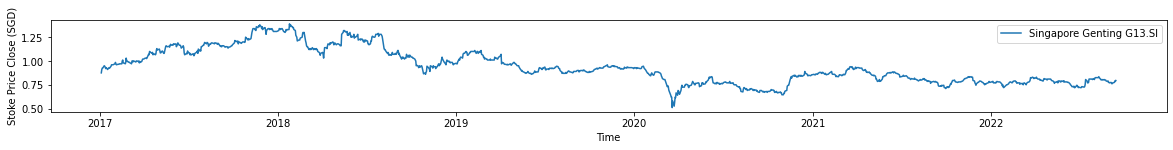

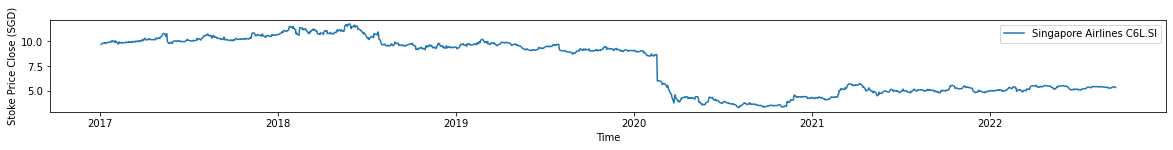

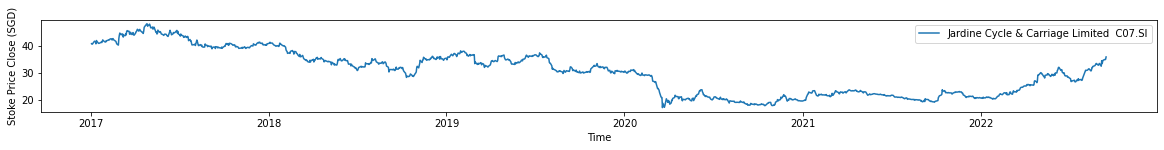

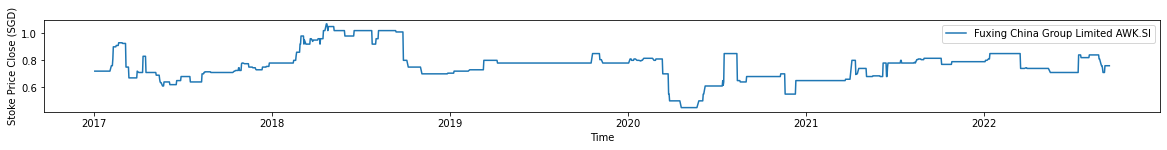

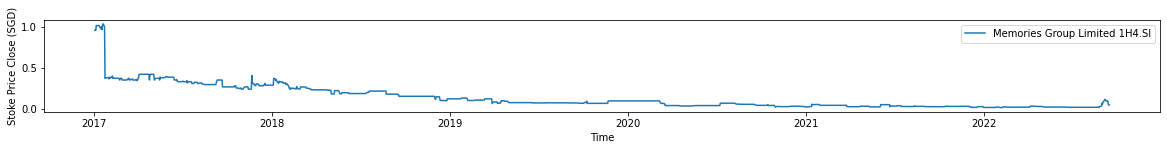

In [ ]:
for i in range(len(data)):
    plt.figure(figsize=(20,20))
    plt.subplot(10,1,i+1)
    plt.plot(data[i]["Date"], data[i]['Close'], label=data_names[i])
    plt.xlabel('Time')
    plt.ylabel("Stoke Price Close (SGD)")
    plt.legend()
    plt.show()

In [ ]:
data_len = len(data[0])
train_len = int(np.ceil(data_len*0.8)) 
test_len = data_len - train_len
data_len, train_len, test_len

(1435, 1148, 287)

In [ ]:
d = []
for i in range(len(data)):
    d.append(data[i]["Close"].values.reshape(-1,1))

In [ ]:
train= []
test = []

In [ ]:
for i in range(len(data)):
    train.append(d[i][:train_len])
    test.append(d[i][-test_len:])

In [ ]:
train[0].shape, test[0].shape

((1148, 1), (287, 1))

In [ ]:
train = np.array(train)
test = np.array(test)

In [ ]:
train.shape, test.shape

((5, 1148, 1), (5, 287, 1))

In [ ]:
def plot_fig(d, x, label, y_metrics):    
    plt.figure(figsize=(20,8))
    plt.plot(data[0]["Date"], d,color='b', label='original')
    plt.plot(data[0]["Date"], x, color='r', label='prediction')
    plt.title(label ,fontsize=20)
    plt.legend()
    plt.show()
    t = np.count_nonzero(~np.isnan(x))
    mae = mean_absolute_error(d[-t:,], x[-t:,])
    mse = mean_squared_error(d[-t:,], x[-t:,])
    rmse = np.sqrt(mean_squared_error(d[-t:,], x[-t:,]))
    mape = mean_absolute_percentage_error(d[-t:,], x[-t:,])
    y_metrics.append(mae)
    y_metrics.append(mse)
    y_metrics.append(rmse)
    y_metrics.append(mape)
    print("Mean Absolute Error : {}".format(mae))
    print("Mean Squared Error : {}".format(mse))
    print("Root Mean Squared Error : {}".format(rmse))
    print("Mean Absolute Percentage Error : {}".format(mape))

In [ ]:
def forecast_extender(forecast,c):
    x = []
    arr=np.full((c,1),np.nan)
    x.append(np.concatenate((arr, forecast), axis=0).reshape(-1,1))
    x = np.array(x).reshape(-1,1)
    return x

In [ ]:
def plot_all(r, _chen, _ifts, _pwfts, n, nn):
    plt.figure(figsize=(20,8))
    plt.plot(r[n]["Date"][-nn:], d[n][-nn:],color='b', label='original')
    plt.plot(r[n]["Date"][-nn:], _chen[-nn:], '--r', label='Chen_prediction')
    plt.plot(r[n]["Date"][-nn:], _ifts[-nn:], ':k', label='IFTS_prediction')
    plt.plot(r[n]["Date"][-nn:], _pwfts[-nn:], color='g', label='PWFTS_prediction')
    plt.title(data_names[n] ,fontsize=20)
    plt.legend()    
    plt.show()

# The first company

In [ ]:
from pyFTS.partitioners import Grid, Entropy, Util as pUtil
fs = Grid.GridPartitioner(data=train[0], npart=20)
print(fs)

Grid:
A0: trimf([0.4055, 0.459, 0.5125])
A1: trimf([0.45899999999999996, 0.5125, 0.566])
A2: trimf([0.5124999999999998, 0.5659999999999998, 0.6194999999999998])
A3: trimf([0.5659999999999998, 0.6194999999999998, 0.6729999999999998])
A4: trimf([0.6194999999999998, 0.6729999999999998, 0.7264999999999998])
A5: trimf([0.6729999999999997, 0.7264999999999997, 0.7799999999999997])
A6: trimf([0.7264999999999996, 0.7799999999999996, 0.8334999999999996])
A7: trimf([0.7799999999999996, 0.8334999999999996, 0.8869999999999996])
A8: trimf([0.8334999999999996, 0.8869999999999996, 0.9404999999999996])
A9: trimf([0.8869999999999995, 0.9404999999999994, 0.9939999999999994])
A10: trimf([0.9404999999999993, 0.9939999999999993, 1.0474999999999994])
A11: trimf([0.9939999999999994, 1.0474999999999994, 1.1009999999999995])
A12: trimf([1.0474999999999994, 1.1009999999999993, 1.1544999999999992])
A13: trimf([1.100999999999999, 1.1544999999999992, 1.2079999999999993])
A14: trimf([1.1544999999999992, 1.2079999999

In [ ]:
from pyFTS.models import chen
model_chen = chen.ConventionalFTS(partitioner=fs)
model_chen.fit(train[0])
print(model_chen)

Conventional FTS:
A1 -> A2
A2 -> A1,A3
A3 -> A1,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7
A7 -> A6,A7,A8
A8 -> A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A11,A9
A11 -> A10,A11,A12
A12 -> A11,A12,A13
A13 -> A12,A13,A14,A15
A14 -> A13,A14,A15
A15 -> A14,A15,A16
A16 -> A14,A15,A16,A17
A17 -> A16,A17



In [ ]:
data[4]["Close"].values[:train_len].mean()

0.1592787543554007

In [ ]:
data[4]["Close"].values[train_len:].mean()

0.02424738675958188

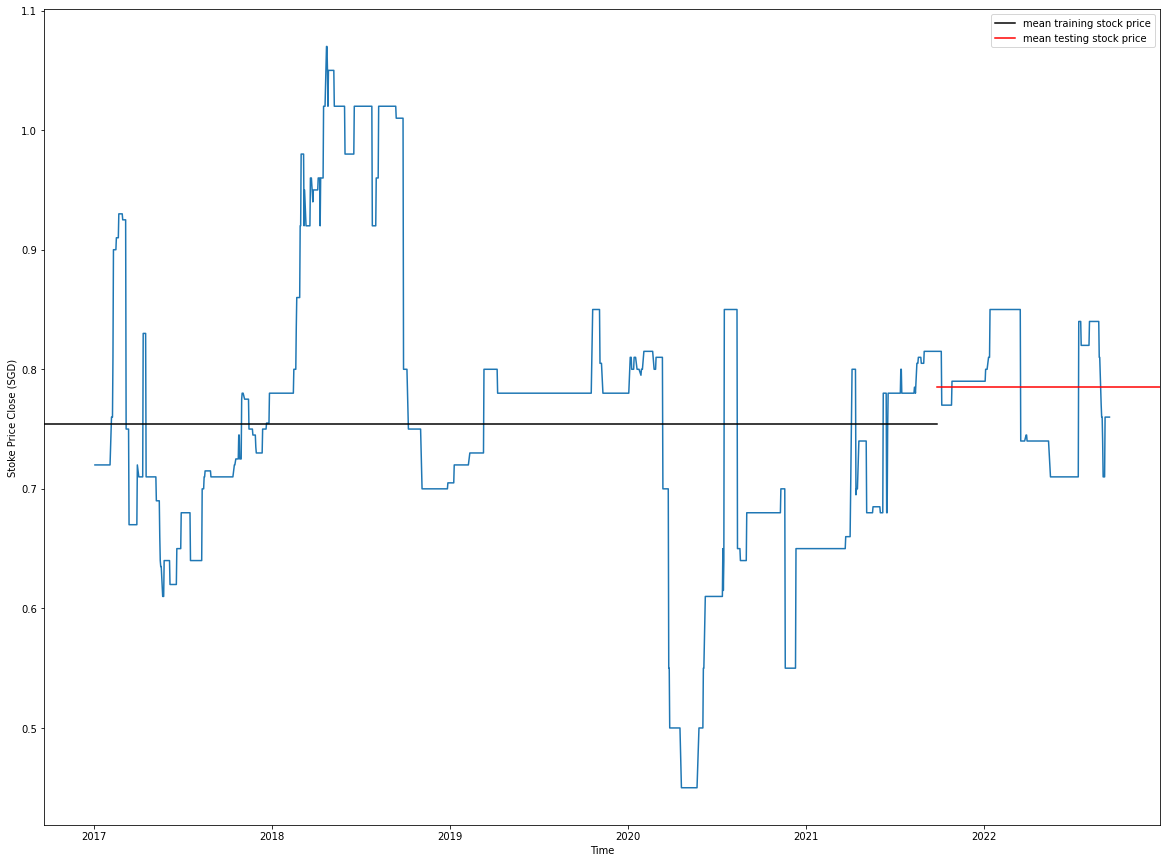

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(data[0]['Date'], data[3]["Close"])
plt.axhline(data[3]["Close"].values[:train_len].mean(), xmin=0, xmax=0.8, label='mean training stock price', color='black')
plt.axhline(data[3]["Close"].values[train_len:].mean(), xmin=0.8, xmax=1, label='mean testing stock price', color='r')
plt.xlabel('Time')
plt.ylabel("Stoke Price Close (SGD)")
plt.legend()
plt.show()

In [ ]:
def plot_metrics(y, y_names, ii):
    plt.figure(figsize=(20,8))
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.title(y_names[i] +'npart_' +str(ii), fontsize=17)
        plt.bar(["Chen", "IFTS", "PWFTS"], [y[i],y[i+4],y[i+8]], color=['blue', 'red', 'green']);


In [ ]:
y_metrics_names = ["Mean Absolute Error : ",
                   "Mean Squared Error : ",
                   "Root Mean Squared Error : ",
                   "Mean Absolute Percentage Error : "]


# 1

## 20

Grid:
A0: trimf([0.4055, 0.459, 0.5125])
A1: trimf([0.45899999999999996, 0.5125, 0.566])
A2: trimf([0.5124999999999998, 0.5659999999999998, 0.6194999999999998])
A3: trimf([0.5659999999999998, 0.6194999999999998, 0.6729999999999998])
A4: trimf([0.6194999999999998, 0.6729999999999998, 0.7264999999999998])
A5: trimf([0.6729999999999997, 0.7264999999999997, 0.7799999999999997])
A6: trimf([0.7264999999999996, 0.7799999999999996, 0.8334999999999996])
A7: trimf([0.7799999999999996, 0.8334999999999996, 0.8869999999999996])
A8: trimf([0.8334999999999996, 0.8869999999999996, 0.9404999999999996])
A9: trimf([0.8869999999999995, 0.9404999999999994, 0.9939999999999994])
A10: trimf([0.9404999999999993, 0.9939999999999993, 1.0474999999999994])
A11: trimf([0.9939999999999994, 1.0474999999999994, 1.1009999999999995])
A12: trimf([1.0474999999999994, 1.1009999999999993, 1.1544999999999992])
A13: trimf([1.100999999999999, 1.1544999999999992, 1.2079999999999993])
A14: trimf([1.1544999999999992, 1.2079999999

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


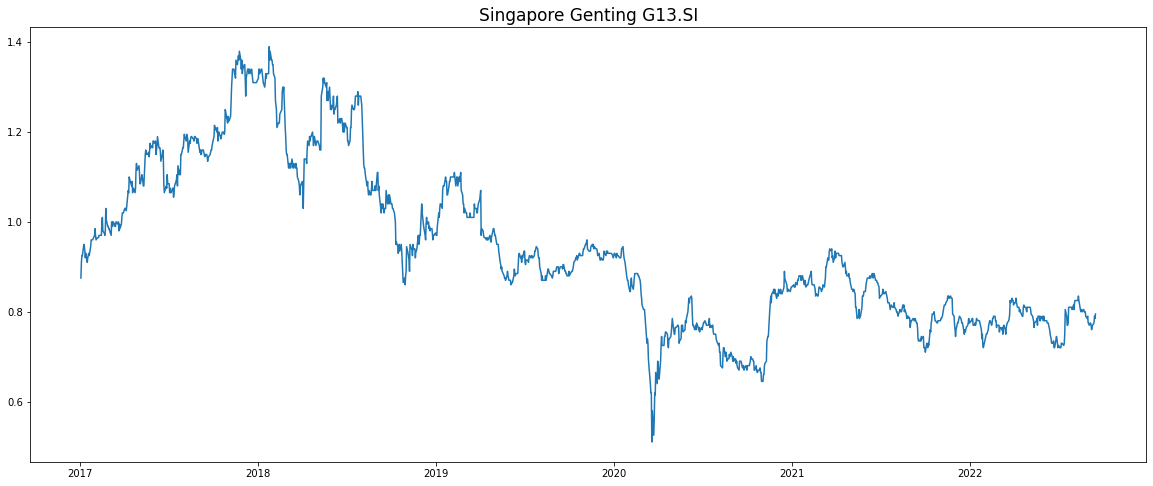

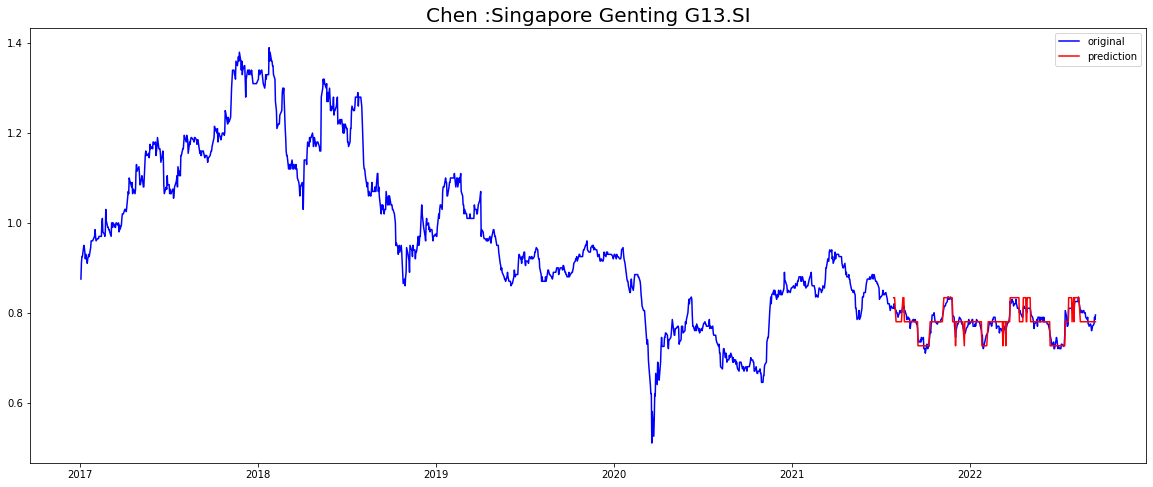

Mean Absolute Error : 0.0109808362369338
Mean Squared Error : 0.00018413501742160204
Root Mean Squared Error : 0.013569635861790915
Mean Absolute Percentage Error : 0.014024811508323272


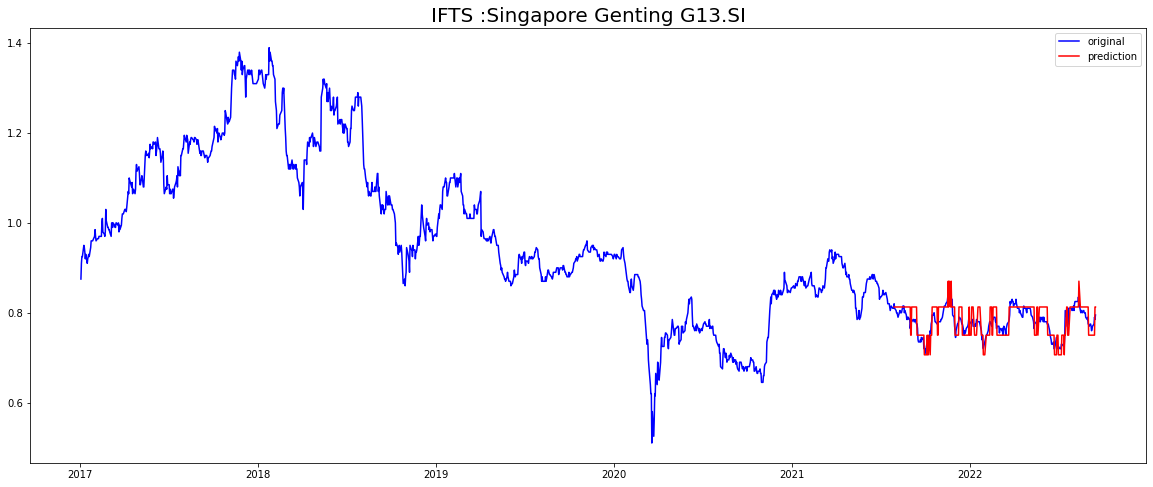

Mean Absolute Error : 0.01999715988843737
Mean Squared Error : 0.000542695993414839
Root Mean Squared Error : 0.02329583639655033
Mean Absolute Percentage Error : 0.02571481120199209


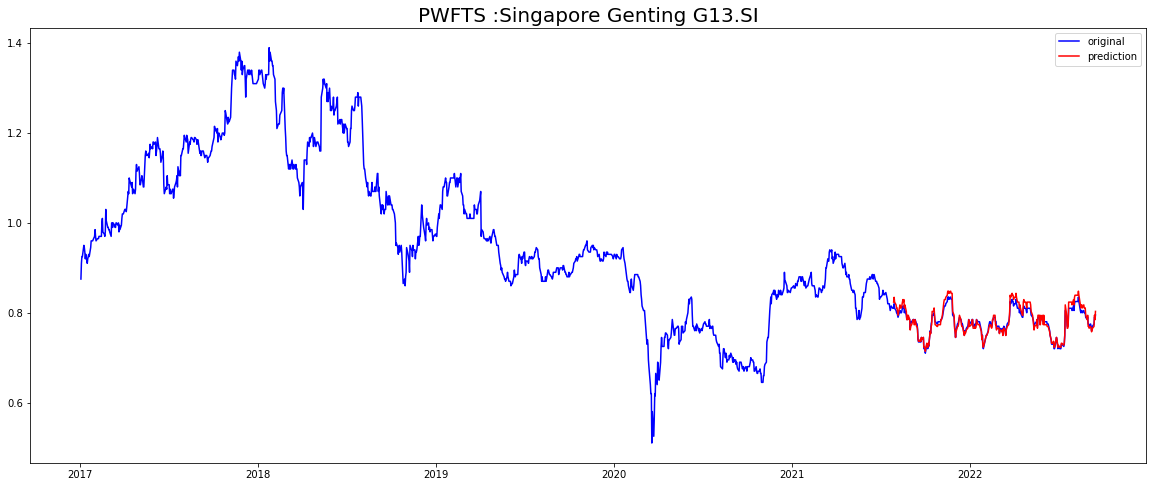

Mean Absolute Error : 0.006394639761324519
Mean Squared Error : 6.243356108237233e-05
Root Mean Squared Error : 0.007901491067031103
Mean Absolute Percentage Error : 0.008036475434379197


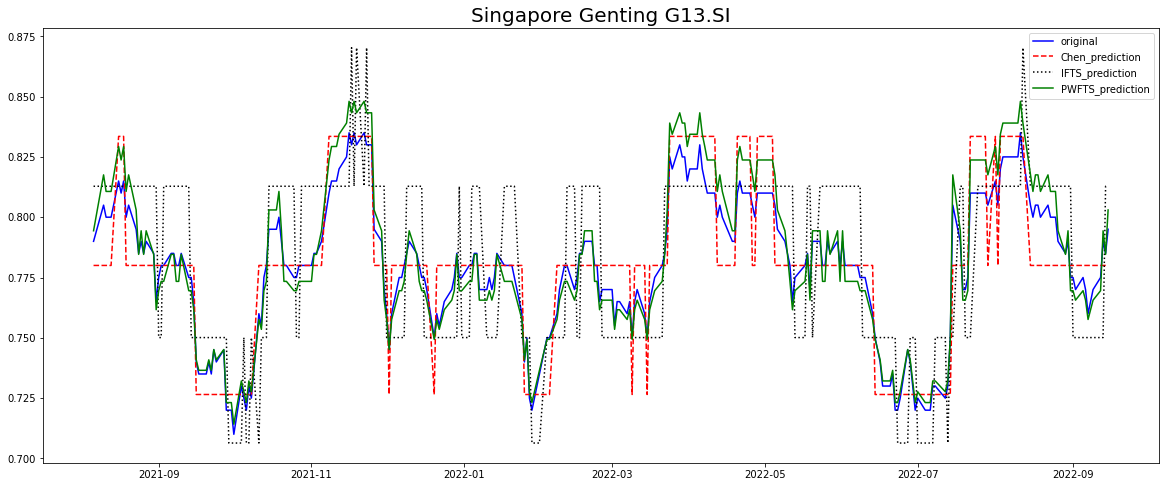

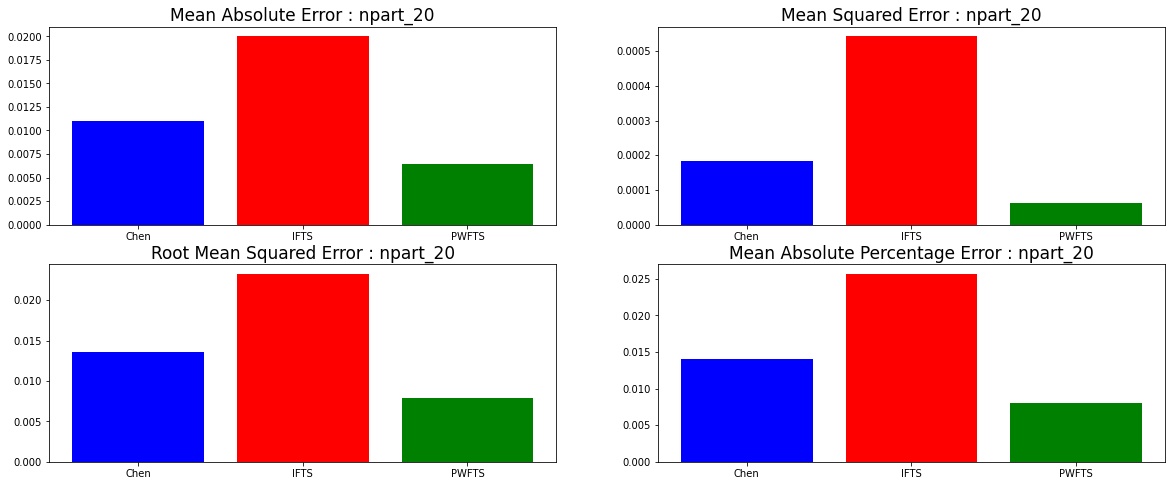

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[0]["Date"], d[0])
plt.title(data_names[0], fontsize=17);
fs_0 = Grid.GridPartitioner(data=train[0], npart=20)
print(fs_0)
model_chen_0 = chen.ConventionalFTS(partitioner=fs_0)
model_chen_0.fit(train[0])
print(model_chen_0)
forecasts_chen_0 = model_chen_0.predict(test[0])
forecasts_chen_0 = np.array(forecasts_chen_0).reshape(-1,1)
forecasts_chen_0 = forecast_extender(forecasts_chen_0,data_len - len(forecasts_chen_0))
y_metrics_0 = []
plot_fig(d[0], forecasts_chen_0, 'Chen :'+data_names[0], y_metrics_0)
model_ifts_0 = ifts.IntervalFTS(partitioner=fs_0)
model_ifts_0.fit(np.array(train[0]).reshape(-1))
forecasts_ifts_0 = model_ifts_0.predict(np.array(test[0]).reshape(-1))
forecasts_ifts_0 = np.array(forecasts_ifts_0).reshape(-1,1)
forecasts_ifts_0 = forecast_extender(forecasts_ifts_0, data_len-len(forecasts_ifts_0))
plot_fig(d[0], forecasts_ifts_0, 'IFTS :'+ data_names[0], y_metrics_0)
model_pwfts_0 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_0)
model_pwfts_0.fit(np.array(train[0]).reshape(-2))
forecasts_pwfts_0 = model_pwfts_0.predict(np.array(test[0]).reshape(-1))
forecasts_pwfts_0 = np.array(forecasts_pwfts_0).reshape(-1,1)
forecasts_pwfts_0 = forecast_extender(forecasts_pwfts_0, data_len-len(forecasts_pwfts_0))
plot_fig(d[0], forecasts_pwfts_0, 'PWFTS :'+ data_names[0], y_metrics_0)
plot_all(data, forecasts_chen_0, forecasts_ifts_0, forecasts_pwfts_0, 0, 280)
plot_metrics(y_metrics_0, y_metrics_names, 20 )

## 40

Grid:
A0: trimf([0.43225, 0.459, 0.48575])
A1: trimf([0.459, 0.48575, 0.5125])
A2: trimf([0.48574999999999996, 0.5125, 0.53925])
A3: trimf([0.5125, 0.53925, 0.5660000000000001])
A4: trimf([0.53925, 0.5660000000000001, 0.5927500000000001])
A5: trimf([0.5660000000000001, 0.59275, 0.6194999999999999])
A6: trimf([0.5927499999999999, 0.6194999999999999, 0.64625])
A7: trimf([0.6194999999999999, 0.64625, 0.673])
A8: trimf([0.64625, 0.673, 0.6997500000000001])
A9: trimf([0.673, 0.69975, 0.7264999999999999])
A10: trimf([0.6997499999999999, 0.7264999999999999, 0.75325])
A11: trimf([0.7264999999999999, 0.75325, 0.78])
A12: trimf([0.75325, 0.78, 0.8067500000000001])
A13: trimf([0.78, 0.80675, 0.8334999999999999])
A14: trimf([0.8067499999999999, 0.8334999999999999, 0.86025])
A15: trimf([0.8334999999999999, 0.86025, 0.887])
A16: trimf([0.86025, 0.887, 0.9137500000000001])
A17: trimf([0.887, 0.91375, 0.9404999999999999])
A18: trimf([0.9137499999999998, 0.9404999999999999, 0.9672499999999999])
A19: tr

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


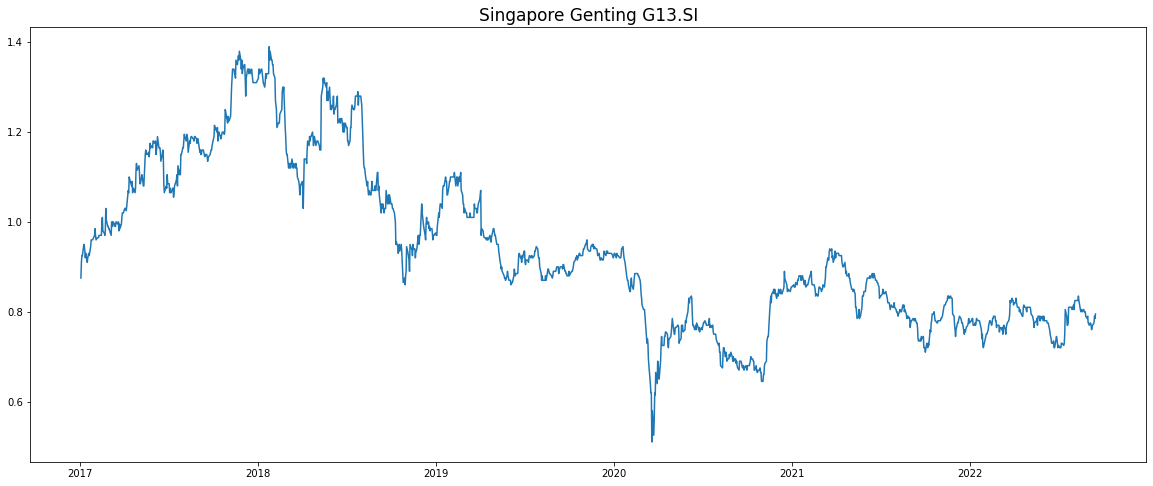

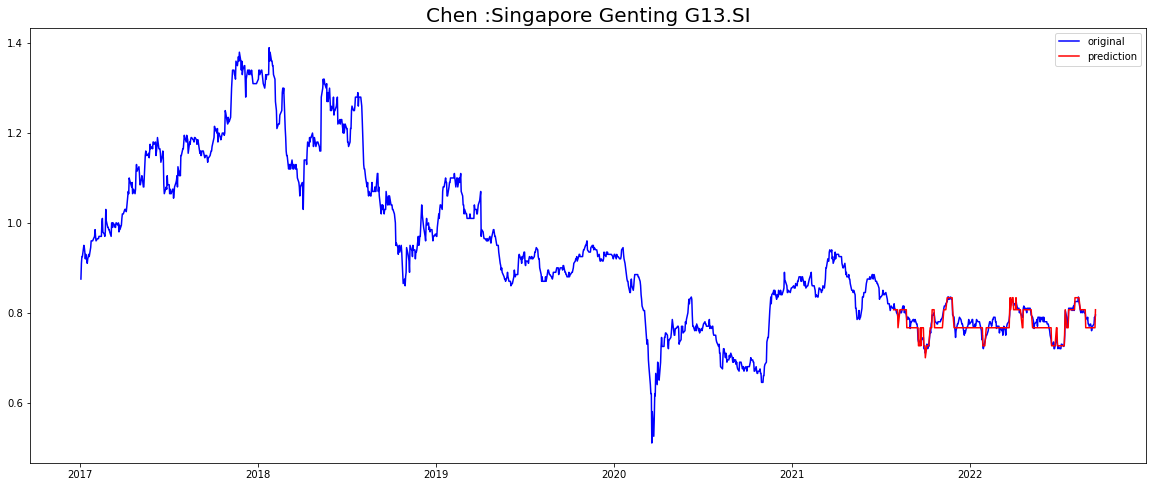

Mean Absolute Error : 0.010000435540069722
Mean Squared Error : 0.00014753435322299756
Root Mean Squared Error : 0.012146372018960952
Mean Absolute Percentage Error : 0.012854002971877857


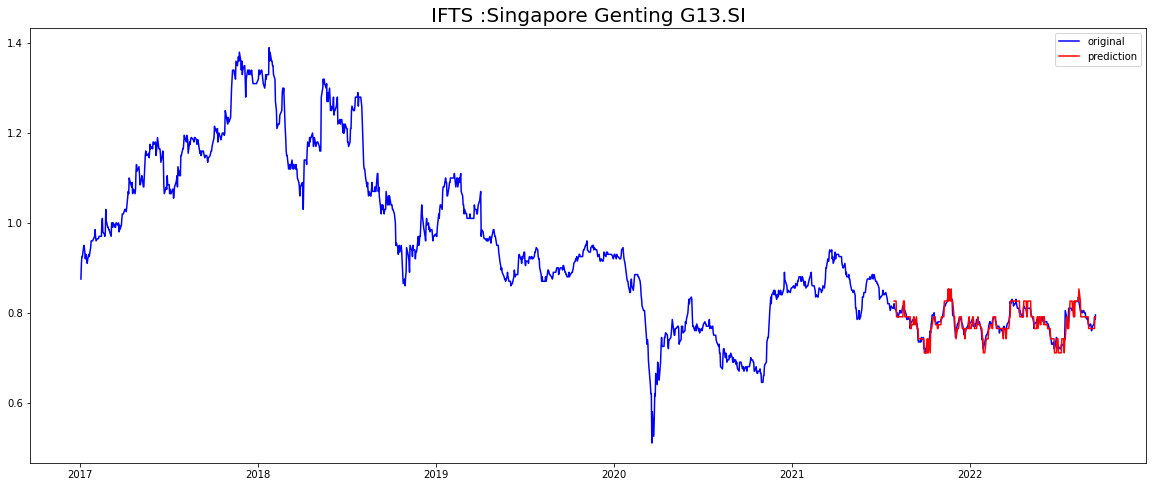

Mean Absolute Error : 0.0110087947700686
Mean Squared Error : 0.00019036410659397935
Root Mean Squared Error : 0.013797249964901679
Mean Absolute Percentage Error : 0.014128047643233478


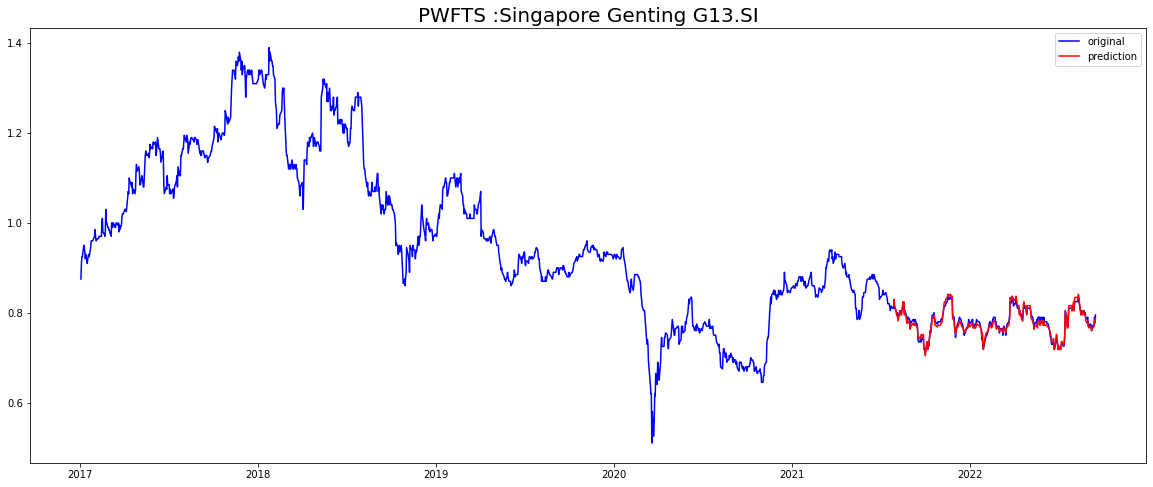

Mean Absolute Error : 0.00589734802777261
Mean Squared Error : 4.1517293431957717e-05
Root Mean Squared Error : 0.0064433914541922495
Mean Absolute Percentage Error : 0.007522422150928837


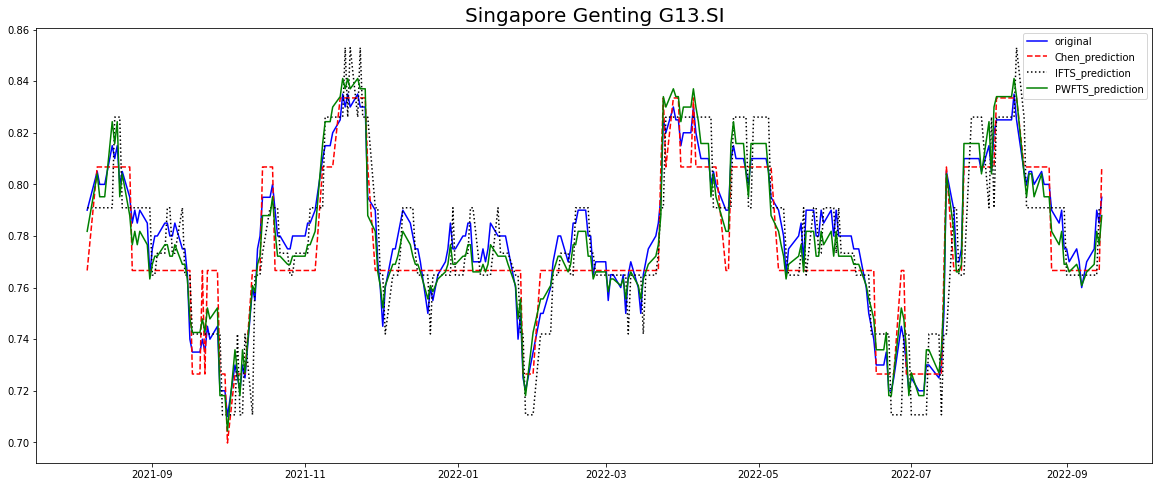

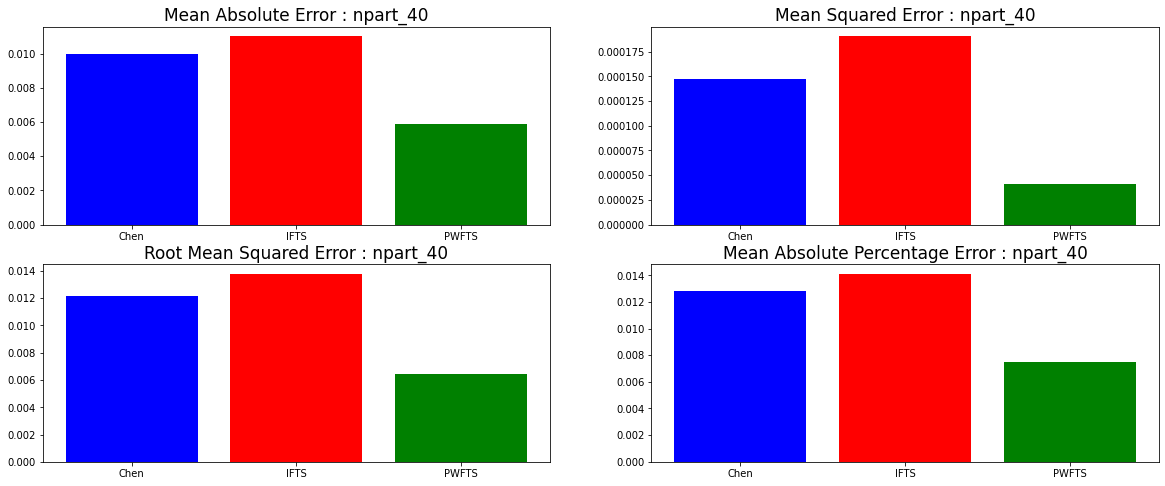

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[0]["Date"], d[0])
plt.title(data_names[0], fontsize=17);
fs_0 = Grid.GridPartitioner(data=train[0], npart=40)
print(fs_0)
model_chen_0 = chen.ConventionalFTS(partitioner=fs_0)
model_chen_0.fit(train[0])
print(model_chen_0)
forecasts_chen_0 = model_chen_0.predict(test[0])
forecasts_chen_0 = np.array(forecasts_chen_0).reshape(-1,1)
forecasts_chen_0 = forecast_extender(forecasts_chen_0,data_len - len(forecasts_chen_0))
y_metrics_040 = []
plot_fig(d[0], forecasts_chen_0, 'Chen :'+data_names[0], y_metrics_040)
model_ifts_0 = ifts.IntervalFTS(partitioner=fs_0)
model_ifts_0.fit(np.array(train[0]).reshape(-1))
forecasts_ifts_0 = model_ifts_0.predict(np.array(test[0]).reshape(-1))
forecasts_ifts_0 = np.array(forecasts_ifts_0).reshape(-1,1)
forecasts_ifts_0 = forecast_extender(forecasts_ifts_0, data_len-len(forecasts_ifts_0))
plot_fig(d[0], forecasts_ifts_0, 'IFTS :'+ data_names[0], y_metrics_040)
model_pwfts_0 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_0)
model_pwfts_0.fit(np.array(train[0]).reshape(-2))
forecasts_pwfts_0 = model_pwfts_0.predict(np.array(test[0]).reshape(-1))
forecasts_pwfts_0 = np.array(forecasts_pwfts_0).reshape(-1,1)
forecasts_pwfts_0 = forecast_extender(forecasts_pwfts_0, data_len-len(forecasts_pwfts_0))
plot_fig(d[0], forecasts_pwfts_0, 'PWFTS :'+ data_names[0], y_metrics_040)
plot_all(data, forecasts_chen_0, forecasts_ifts_0, forecasts_pwfts_0, 0, 280)
plot_metrics(y_metrics_040, y_metrics_names, 40)

## 60

Grid:
A0: trimf([0.4411666666666667, 0.459, 0.47683333333333333])
A1: trimf([0.459, 0.47683333333333333, 0.49466666666666664])
A2: trimf([0.47683333333333333, 0.49466666666666664, 0.5125])
A3: trimf([0.49466666666666664, 0.5125, 0.5303333333333333])
A4: trimf([0.5125, 0.5303333333333333, 0.5481666666666667])
A5: trimf([0.5303333333333332, 0.5481666666666666, 0.566])
A6: trimf([0.5481666666666665, 0.5659999999999998, 0.5838333333333332])
A7: trimf([0.5659999999999998, 0.5838333333333332, 0.6016666666666666])
A8: trimf([0.5838333333333332, 0.6016666666666666, 0.6194999999999999])
A9: trimf([0.6016666666666665, 0.6194999999999998, 0.6373333333333332])
A10: trimf([0.6194999999999997, 0.6373333333333331, 0.6551666666666665])
A11: trimf([0.6373333333333331, 0.6551666666666665, 0.6729999999999998])
A12: trimf([0.6551666666666665, 0.6729999999999998, 0.6908333333333332])
A13: trimf([0.6729999999999997, 0.6908333333333331, 0.7086666666666664])
A14: trimf([0.690833333333333, 0.7086666666666663, 

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


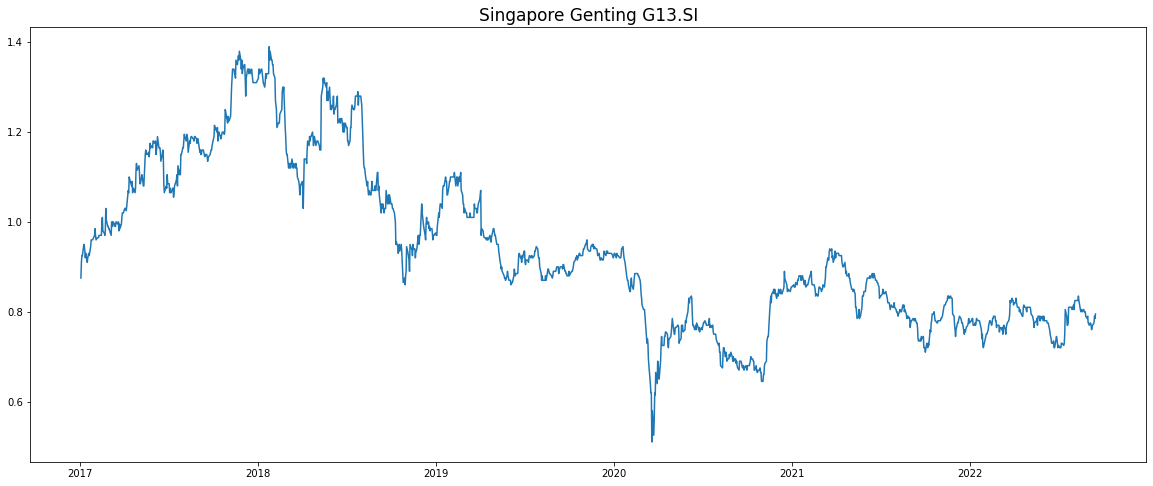

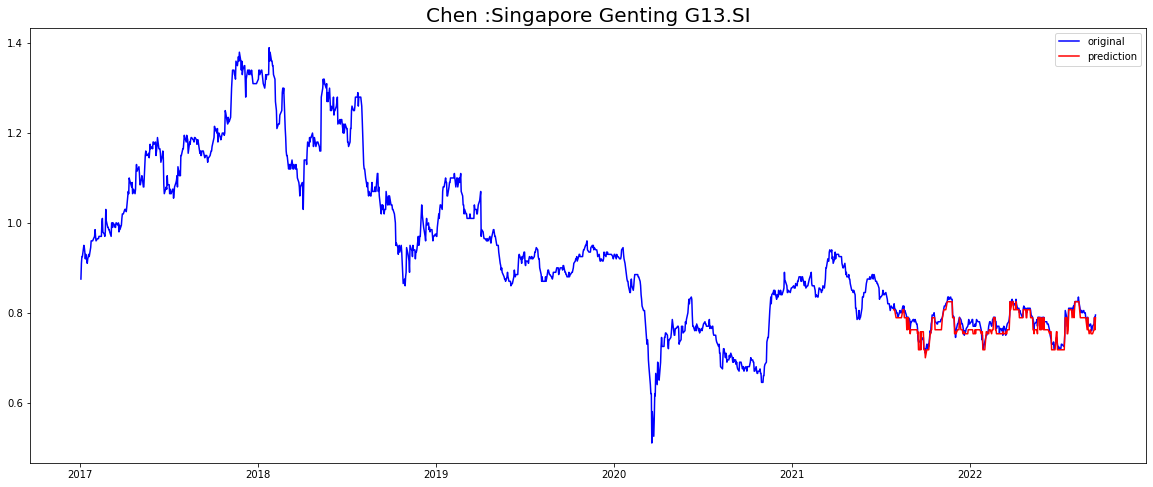

Mean Absolute Error : 0.011249854819977124
Mean Squared Error : 0.00016912179999032937
Root Mean Squared Error : 0.01300468377125447
Mean Absolute Percentage Error : 0.014472018536464076


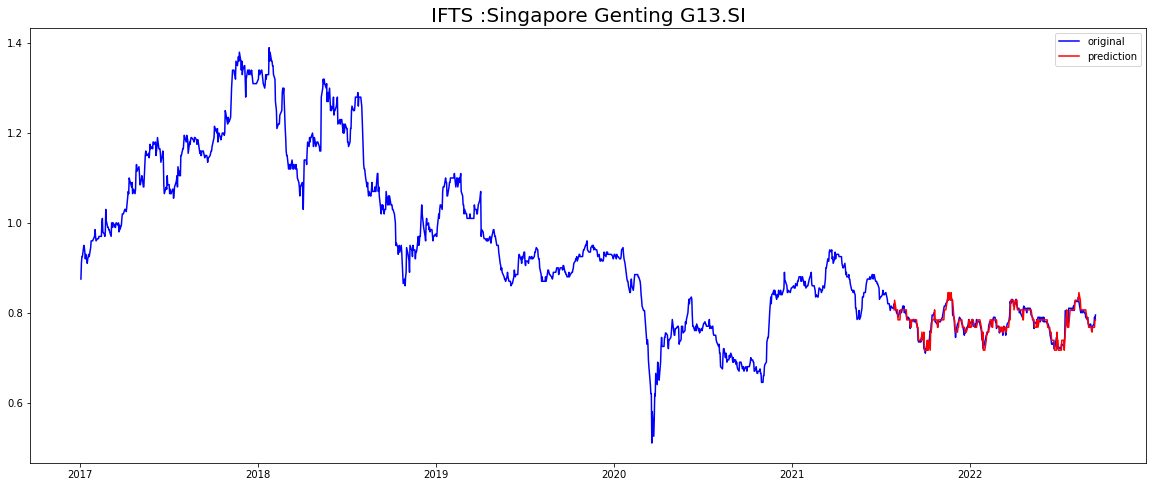

Mean Absolute Error : 0.008488805582708122
Mean Squared Error : 0.00012811167810642326
Root Mean Squared Error : 0.011318642944559355
Mean Absolute Percentage Error : 0.010930629006905708


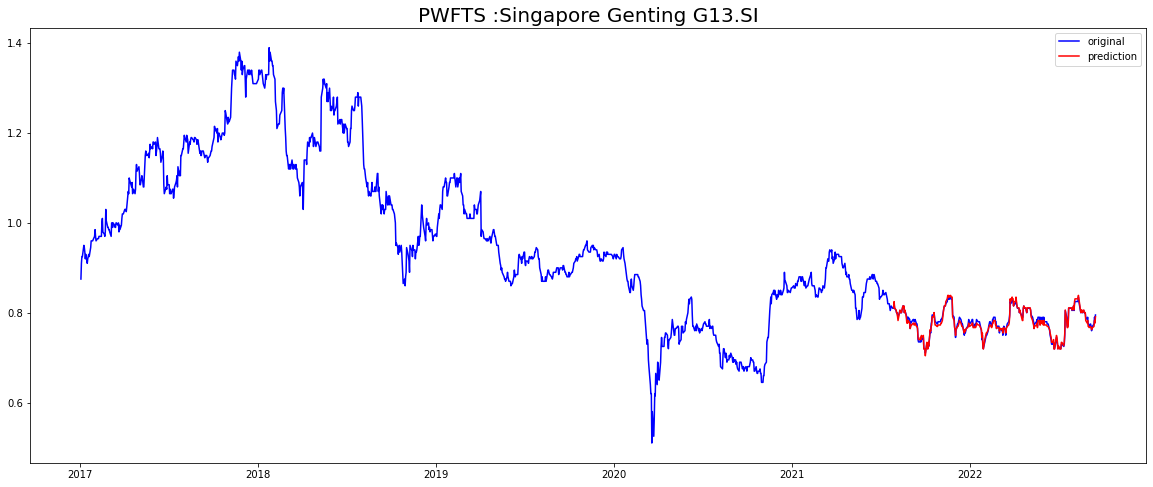

Mean Absolute Error : 0.004204814067414778
Mean Squared Error : 2.4701839652189143e-05
Root Mean Squared Error : 0.00497009453151438
Mean Absolute Percentage Error : 0.005393682426917248


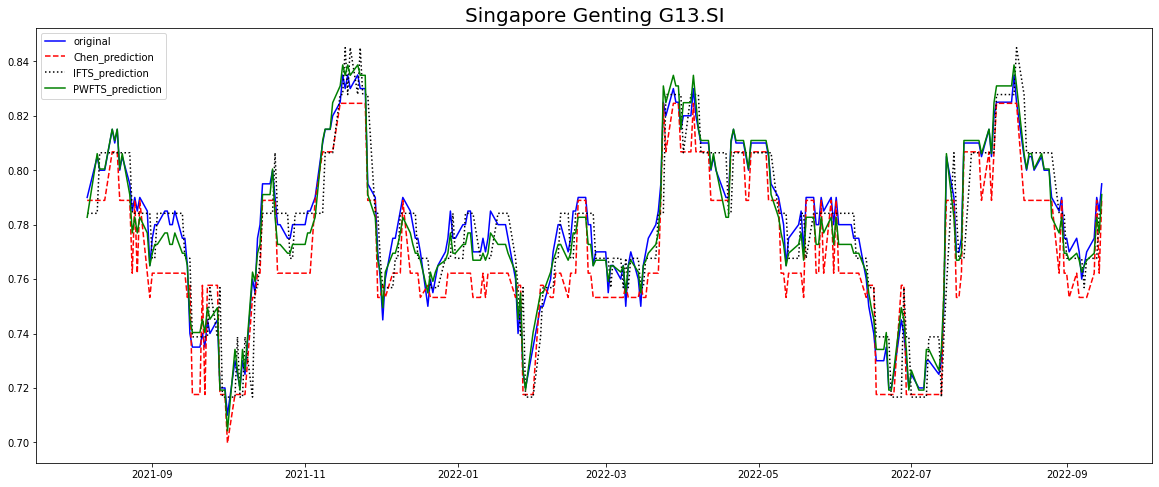

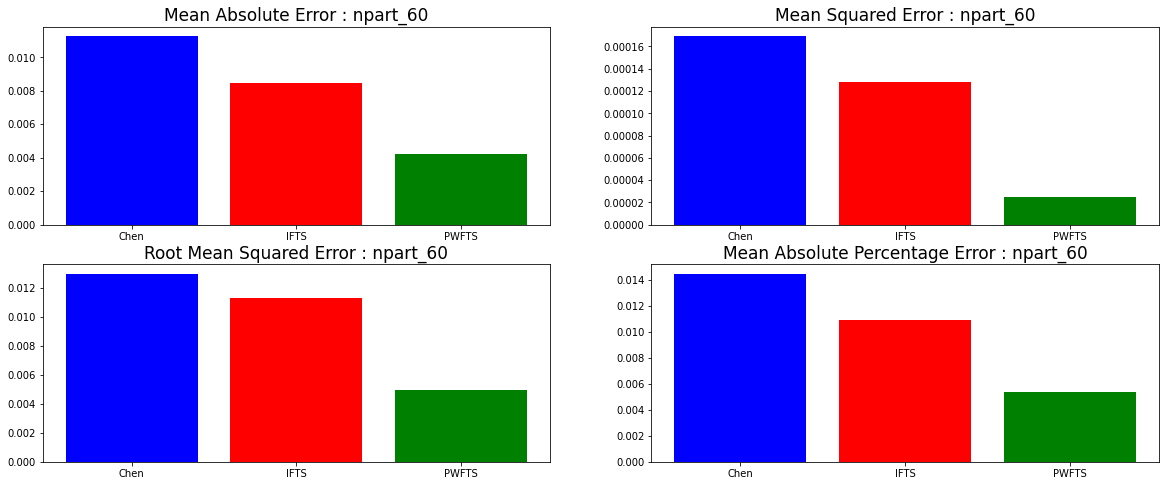

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[0]["Date"], d[0])
plt.title(data_names[0], fontsize=17);
fs_0 = Grid.GridPartitioner(data=train[0], npart=60)
print(fs_0)
model_chen_0 = chen.ConventionalFTS(partitioner=fs_0)
model_chen_0.fit(train[0])
print(model_chen_0)
forecasts_chen_0 = model_chen_0.predict(test[0])
forecasts_chen_0 = np.array(forecasts_chen_0).reshape(-1,1)
forecasts_chen_0 = forecast_extender(forecasts_chen_0,data_len - len(forecasts_chen_0))
y_metrics_060 = []
plot_fig(d[0], forecasts_chen_0, 'Chen :'+data_names[0], y_metrics_060)
model_ifts_0 = ifts.IntervalFTS(partitioner=fs_0)
model_ifts_0.fit(np.array(train[0]).reshape(-1))
forecasts_ifts_0 = model_ifts_0.predict(np.array(test[0]).reshape(-1))
forecasts_ifts_0 = np.array(forecasts_ifts_0).reshape(-1,1)
forecasts_ifts_0 = forecast_extender(forecasts_ifts_0, data_len-len(forecasts_ifts_0))
plot_fig(d[0], forecasts_ifts_0, 'IFTS :'+ data_names[0], y_metrics_060)
model_pwfts_0 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_0)
model_pwfts_0.fit(np.array(train[0]).reshape(-2))
forecasts_pwfts_0 = model_pwfts_0.predict(np.array(test[0]).reshape(-1))
forecasts_pwfts_0 = np.array(forecasts_pwfts_0).reshape(-1,1)
forecasts_pwfts_0 = forecast_extender(forecasts_pwfts_0, data_len-len(forecasts_pwfts_0))
plot_fig(d[0], forecasts_pwfts_0, 'PWFTS :'+ data_names[0], y_metrics_060)
plot_all(data, forecasts_chen_0, forecasts_ifts_0, forecasts_pwfts_0, 0, 280)
plot_metrics(y_metrics_060, y_metrics_names,60)

## 80

Grid:
A0: trimf([0.44562500000000005, 0.459, 0.472375])
A1: trimf([0.45899999999999996, 0.472375, 0.48575])
A2: trimf([0.472375, 0.48574999999999996, 0.49912499999999993])
A3: trimf([0.4857499999999999, 0.49912499999999993, 0.5125])
A4: trimf([0.49912499999999993, 0.5125, 0.525875])
A5: trimf([0.5124999999999998, 0.5258749999999999, 0.5392499999999999])
A6: trimf([0.5258749999999998, 0.5392499999999998, 0.5526249999999998])
A7: trimf([0.5392499999999998, 0.5526249999999998, 0.5659999999999998])
A8: trimf([0.5526249999999998, 0.5659999999999998, 0.5793749999999999])
A9: trimf([0.5659999999999997, 0.5793749999999998, 0.5927499999999998])
A10: trimf([0.5793749999999996, 0.5927499999999997, 0.6061249999999997])
A11: trimf([0.5927499999999997, 0.6061249999999997, 0.6194999999999997])
A12: trimf([0.6061249999999997, 0.6194999999999997, 0.6328749999999997])
A13: trimf([0.6194999999999996, 0.6328749999999996, 0.6462499999999997])
A14: trimf([0.6328749999999995, 0.6462499999999995, 0.6596249999

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


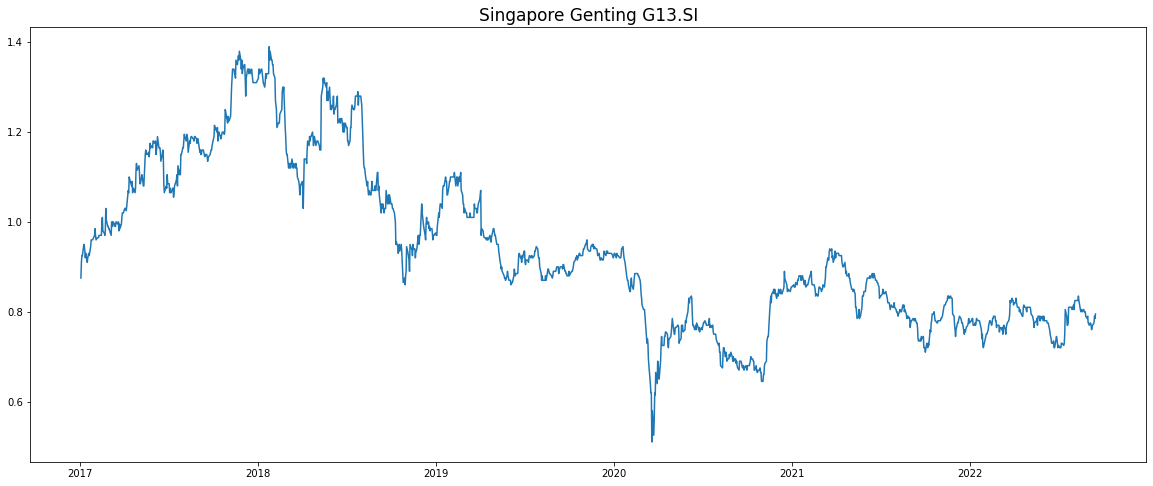

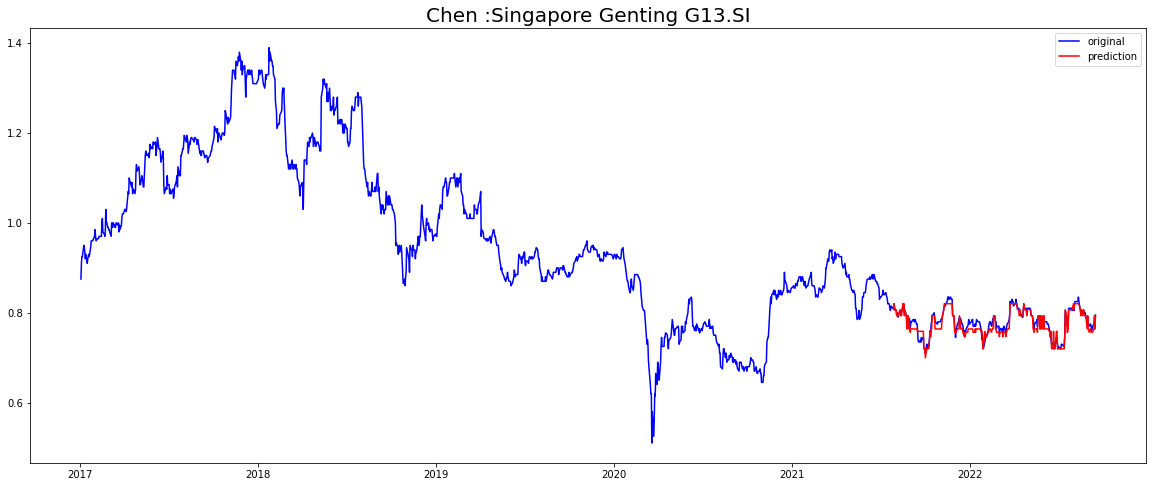

Mean Absolute Error : 0.009208732578397587
Mean Squared Error : 0.0001266012403364637
Root Mean Squared Error : 0.011251721660993206
Mean Absolute Percentage Error : 0.011867666304333169


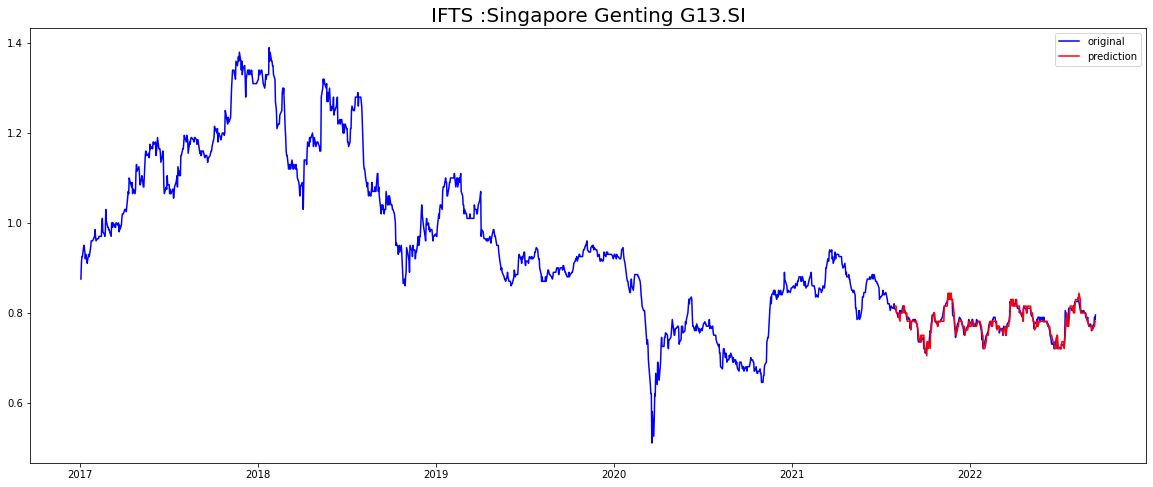

Mean Absolute Error : 0.007960319068208141
Mean Squared Error : 0.00011906813405432904
Root Mean Squared Error : 0.01091183458701281
Mean Absolute Percentage Error : 0.010236688554153401


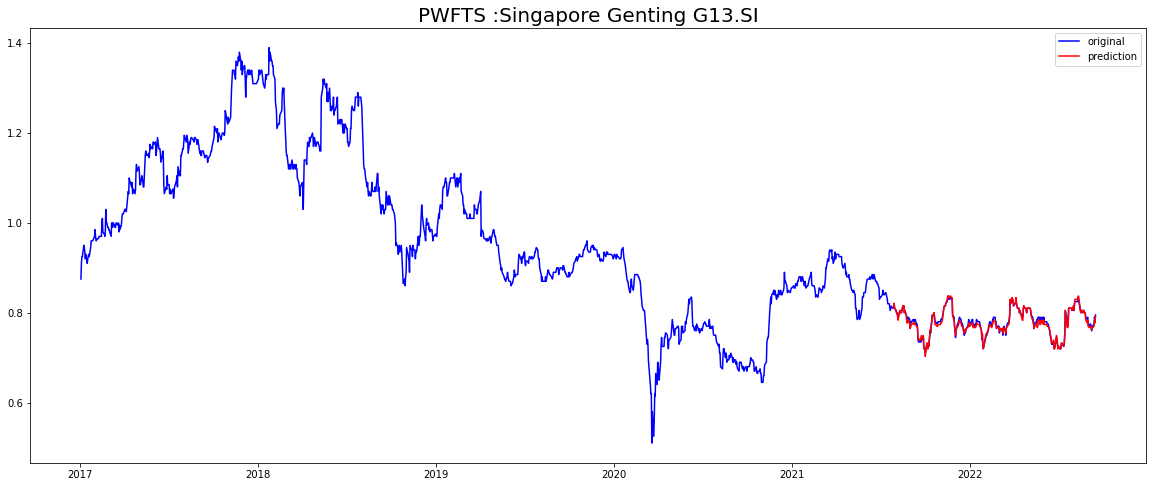

Mean Absolute Error : 0.003577290164491318
Mean Squared Error : 1.9087067066371257e-05
Root Mean Squared Error : 0.004368874805527306
Mean Absolute Percentage Error : 0.004593962587620249


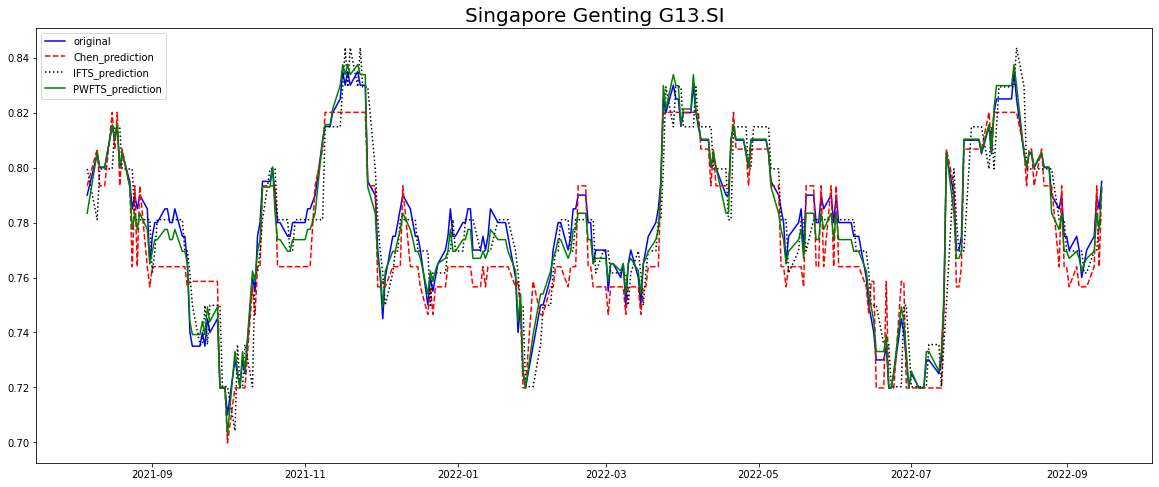

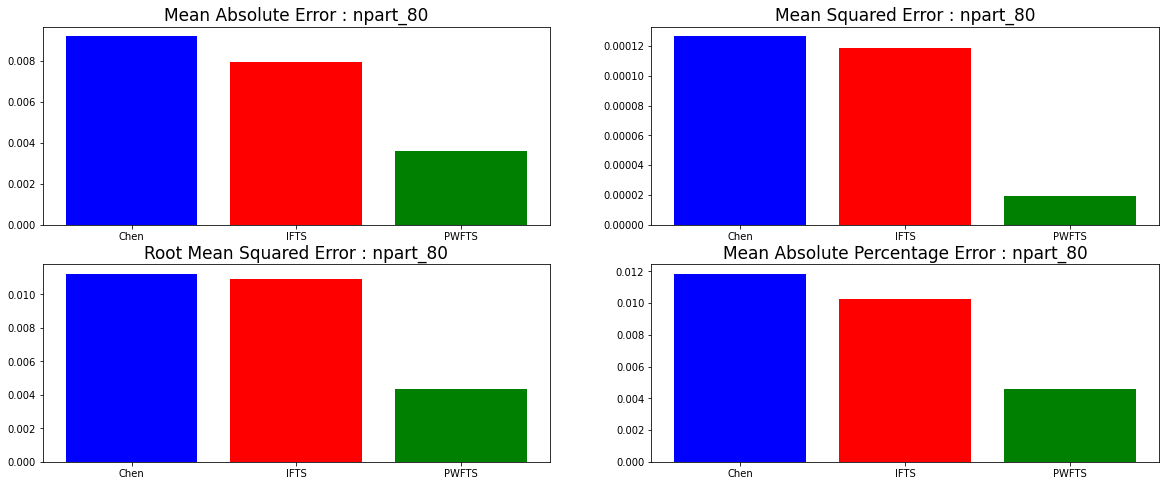

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[0]["Date"], d[0])
plt.title(data_names[0], fontsize=17);
fs_0 = Grid.GridPartitioner(data=train[0], npart=80)
print(fs_0)
model_chen_0 = chen.ConventionalFTS(partitioner=fs_0)
model_chen_0.fit(train[0])
print(model_chen_0)
forecasts_chen_0 = model_chen_0.predict(test[0])
forecasts_chen_0 = np.array(forecasts_chen_0).reshape(-1,1)
forecasts_chen_0 = forecast_extender(forecasts_chen_0,data_len - len(forecasts_chen_0))
y_metrics_080 = []
plot_fig(d[0], forecasts_chen_0, 'Chen :'+data_names[0], y_metrics_080)
model_ifts_0 = ifts.IntervalFTS(partitioner=fs_0)
model_ifts_0.fit(np.array(train[0]).reshape(-1))
forecasts_ifts_0 = model_ifts_0.predict(np.array(test[0]).reshape(-1))
forecasts_ifts_0 = np.array(forecasts_ifts_0).reshape(-1,1)
forecasts_ifts_0 = forecast_extender(forecasts_ifts_0, data_len-len(forecasts_ifts_0))
plot_fig(d[0], forecasts_ifts_0, 'IFTS :'+ data_names[0], y_metrics_080)
model_pwfts_0 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_0)
model_pwfts_0.fit(np.array(train[0]).reshape(-2))
forecasts_pwfts_0 = model_pwfts_0.predict(np.array(test[0]).reshape(-1))
forecasts_pwfts_0 = np.array(forecasts_pwfts_0).reshape(-1,1)
forecasts_pwfts_0 = forecast_extender(forecasts_pwfts_0, data_len-len(forecasts_pwfts_0))
plot_fig(d[0], forecasts_pwfts_0, 'PWFTS :'+ data_names[0], y_metrics_080)
plot_all(data, forecasts_chen_0, forecasts_ifts_0, forecasts_pwfts_0, 0, 280)
plot_metrics(y_metrics_080, y_metrics_names, 80)

# 2 

## 20

Grid:
A0: trimf([2.48115, 2.979, 3.47685])
A1: trimf([2.979, 3.47685, 3.9747000000000003])
A2: trimf([3.47685, 3.9747000000000003, 4.47255])
A3: trimf([3.9747, 4.47255, 4.9704])
A4: trimf([4.472550000000001, 4.970400000000001, 5.46825])
A5: trimf([4.9704000000000015, 5.468250000000001, 5.966100000000001])
A6: trimf([5.468250000000001, 5.966100000000001, 6.4639500000000005])
A7: trimf([5.966100000000001, 6.4639500000000005, 6.9618])
A8: trimf([6.463950000000001, 6.961800000000001, 7.459650000000001])
A9: trimf([6.961800000000001, 7.459650000000001, 7.9575000000000005])
A10: trimf([7.459650000000002, 7.957500000000001, 8.455350000000001])
A11: trimf([7.957500000000003, 8.455350000000003, 8.953200000000002])
A12: trimf([8.455350000000003, 8.953200000000002, 9.451050000000002])
A13: trimf([8.953200000000002, 9.451050000000002, 9.948900000000002])
A14: trimf([9.451050000000002, 9.948900000000002, 10.446750000000002])
A15: trimf([9.948900000000002, 10.446750000000002, 10.944600000000001])
A1

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


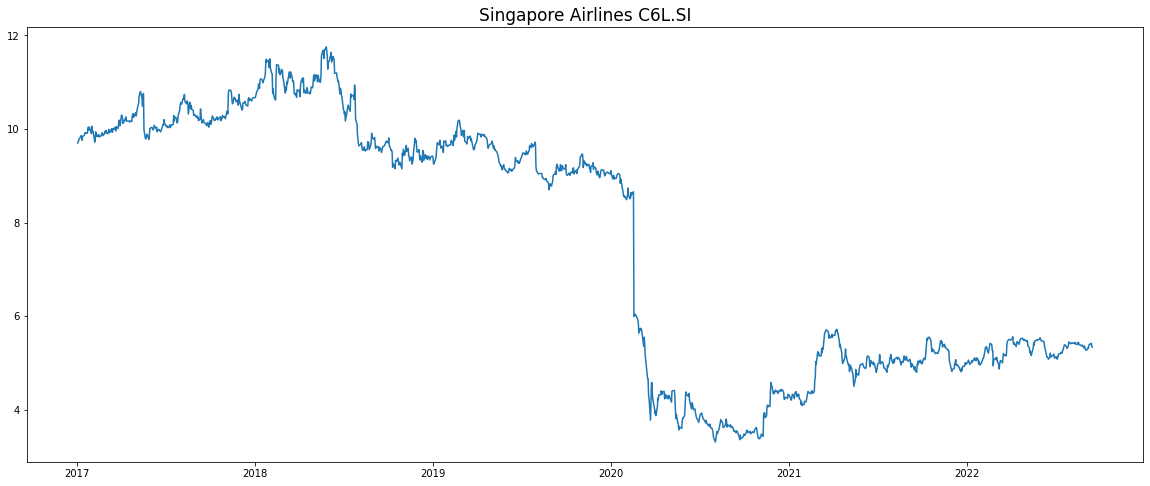

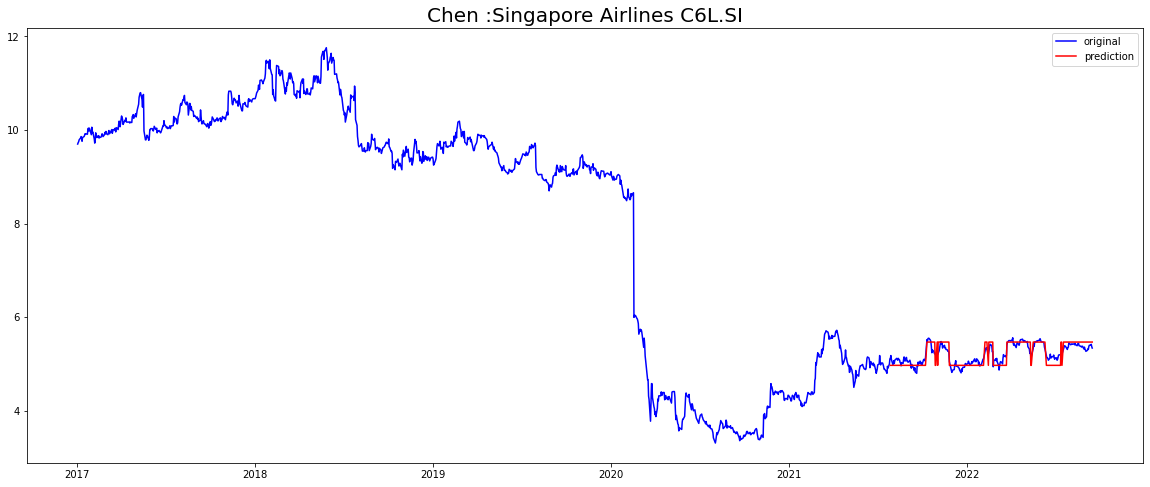

Mean Absolute Error : 0.09706620209059245
Mean Squared Error : 0.013828269912892025
Root Mean Squared Error : 0.11759366442496817
Mean Absolute Percentage Error : 0.018691758449471806


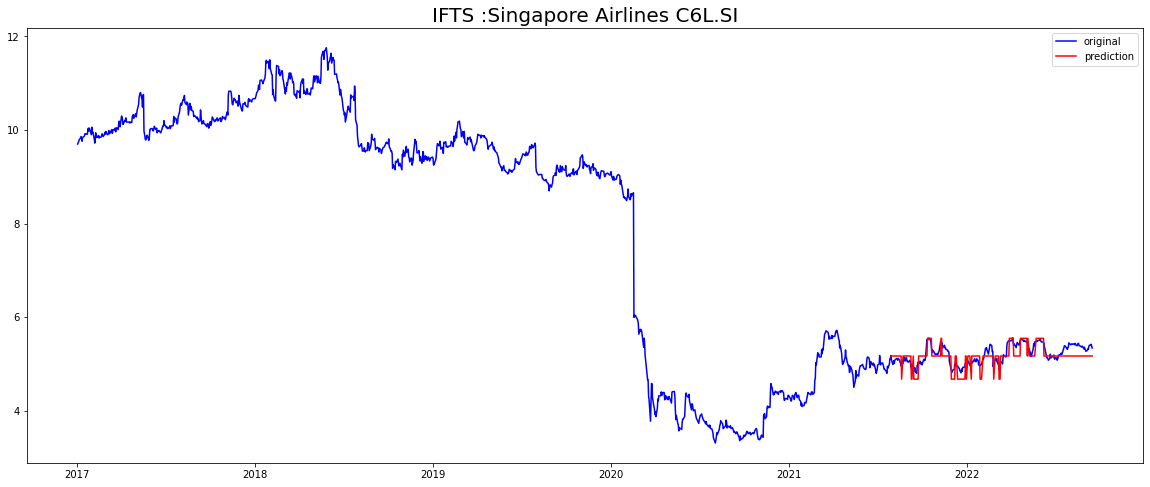

Mean Absolute Error : 0.14400907494858597
Mean Squared Error : 0.028933338682026122
Root Mean Squared Error : 0.1700980266846918
Mean Absolute Percentage Error : 0.02774209397993068


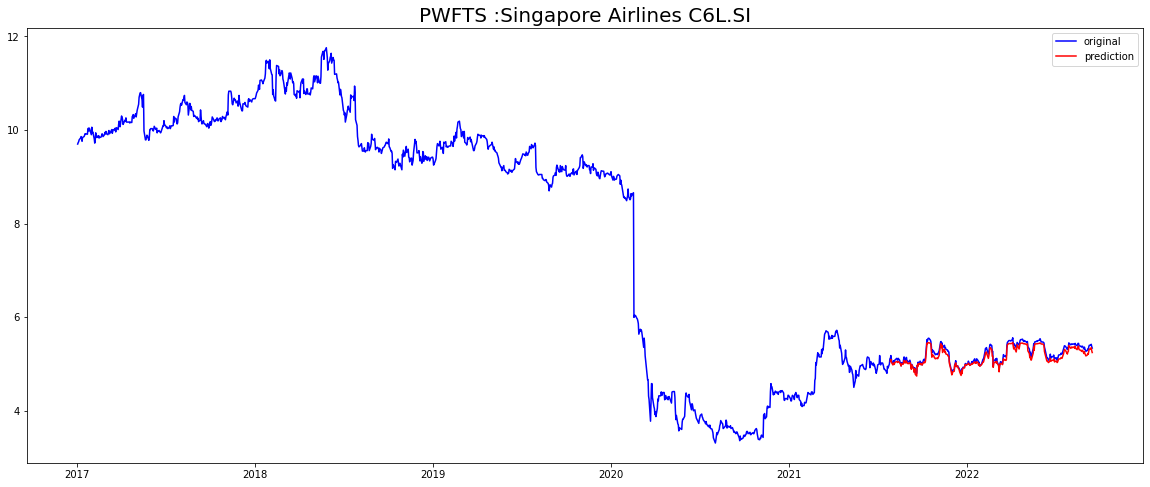

Mean Absolute Error : 0.06081766313101285
Mean Squared Error : 0.004502454440603243
Root Mean Squared Error : 0.06710033115121894
Mean Absolute Percentage Error : 0.011550542214383617


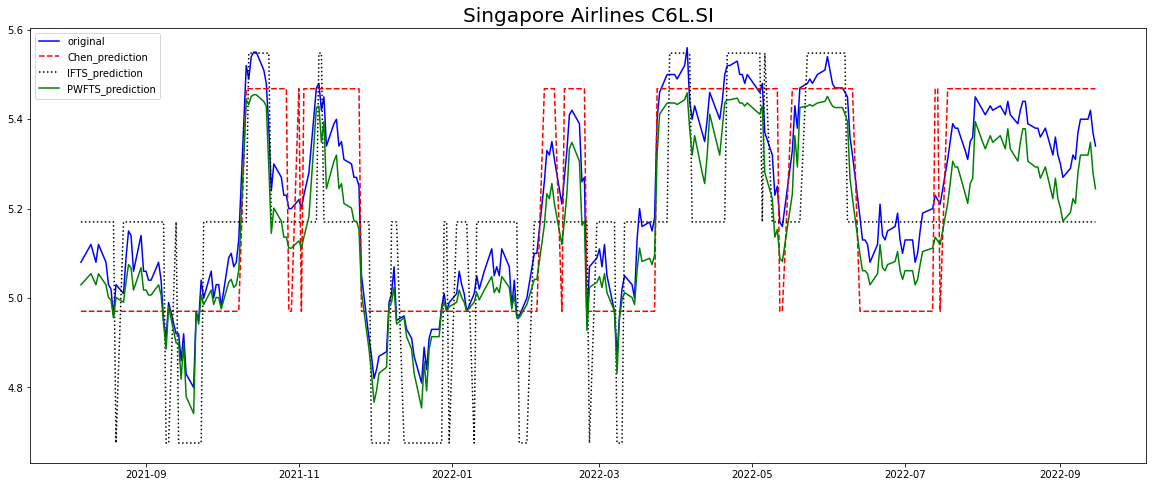

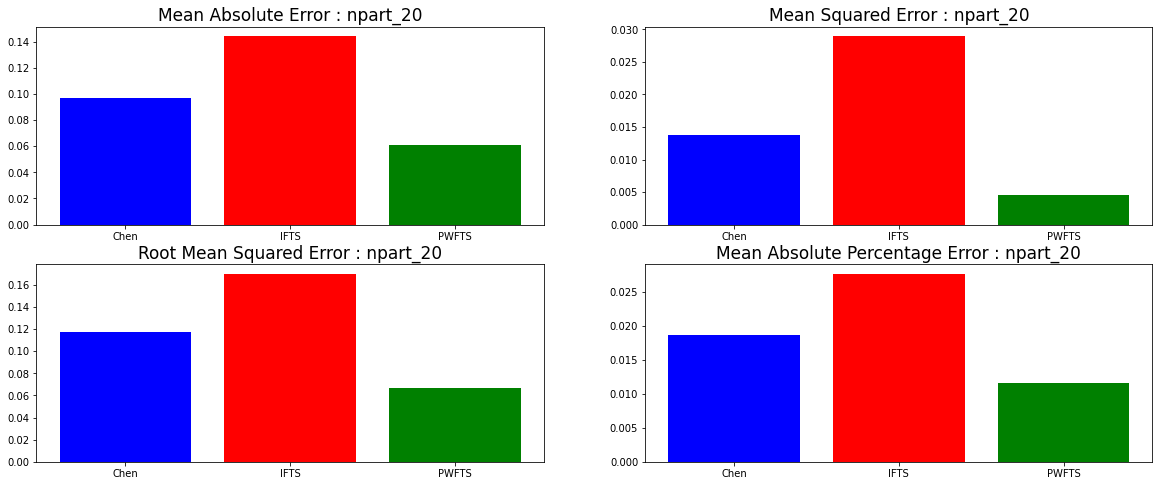

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[1]["Date"], d[1])
plt.title(data_names[1], fontsize=17);
fs_1 = Grid.GridPartitioner(data=train[1], npart=20)
print(fs_1)
model_chen_1 = chen.ConventionalFTS(partitioner=fs_1)
model_chen_1.fit(train[1])
print(model_chen_1)
forecasts_chen_1 = model_chen_1.predict(test[1])
forecasts_chen_1 = np.array(forecasts_chen_1).reshape(-1,1)
forecasts_chen_1 = forecast_extender(forecasts_chen_1,data_len - len(forecasts_chen_1))
y_metrics_1 = []
plot_fig(d[1], forecasts_chen_1, 'Chen :'+data_names[1], y_metrics_1)
model_ifts_1 = ifts.IntervalFTS(partitioner=fs_1)
model_ifts_1.fit(np.array(train[1]).reshape(-1))
forecasts_ifts_1 = model_ifts_1.predict(np.array(test[1]).reshape(-1))
forecasts_ifts_1 = np.array(forecasts_ifts_1).reshape(-1,1)
forecasts_ifts_1 = forecast_extender(forecasts_ifts_1, data_len-len(forecasts_ifts_1))
plot_fig(d[1], forecasts_ifts_1, 'IFTS :'+ data_names[1], y_metrics_1)
model_pwfts_1 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_1)
model_pwfts_1.fit(np.array(train[1]).reshape(-2))
forecasts_pwfts_1 = model_pwfts_1.predict(np.array(test[1]).reshape(-1))
forecasts_pwfts_1 = np.array(forecasts_pwfts_1).reshape(-1,1)
forecasts_pwfts_1 = forecast_extender(forecasts_pwfts_1, data_len-len(forecasts_pwfts_1))
plot_fig(d[1], forecasts_pwfts_1, 'PWFTS :'+ data_names[1], y_metrics_1)
plot_all(data, forecasts_chen_1, forecasts_ifts_1, forecasts_pwfts_1, 1, 280)
plot_metrics(y_metrics_1, y_metrics_names, 20)

## 40

Grid:
A0: trimf([2.7300750000000003, 2.979, 3.227925])
A1: trimf([2.979, 3.227925, 3.4768499999999998])
A2: trimf([3.227925, 3.4768499999999998, 3.7257749999999996])
A3: trimf([3.4768499999999998, 3.7257749999999996, 3.9746999999999995])
A4: trimf([3.7257749999999996, 3.9746999999999995, 4.223624999999999])
A5: trimf([3.9746999999999995, 4.223624999999999, 4.472549999999999])
A6: trimf([4.223624999999999, 4.472549999999999, 4.721474999999999])
A7: trimf([4.472549999999999, 4.721474999999999, 4.970399999999999])
A8: trimf([4.721474999999999, 4.970399999999999, 5.219324999999999])
A9: trimf([4.970399999999999, 5.219324999999999, 5.4682499999999985])
A10: trimf([5.219324999999999, 5.4682499999999985, 5.717174999999998])
A11: trimf([5.4682499999999985, 5.717174999999998, 5.966099999999998])
A12: trimf([5.717174999999998, 5.966099999999998, 6.215024999999998])
A13: trimf([5.966099999999998, 6.215024999999998, 6.463949999999998])
A14: trimf([6.215024999999998, 6.463949999999998, 6.7128749999

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


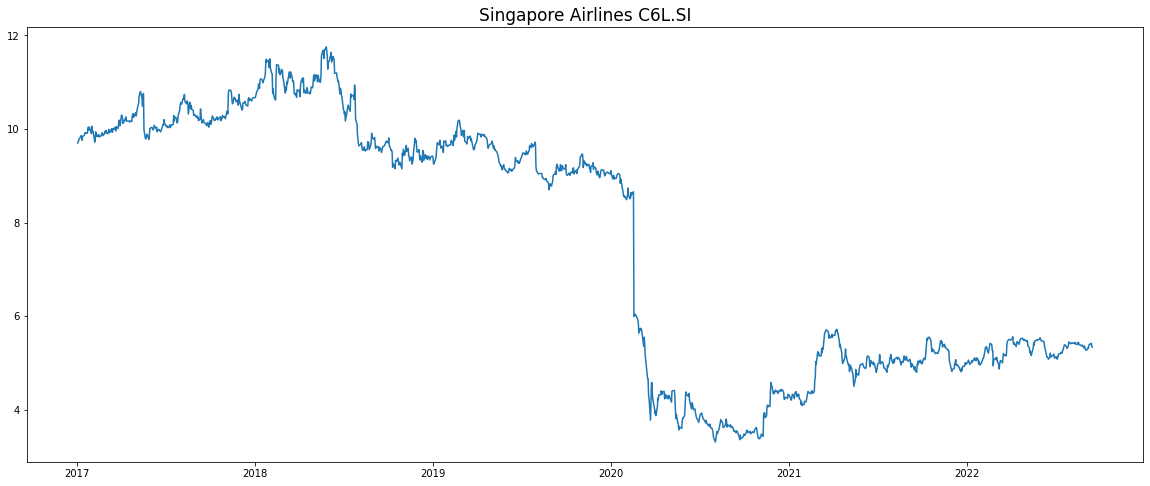

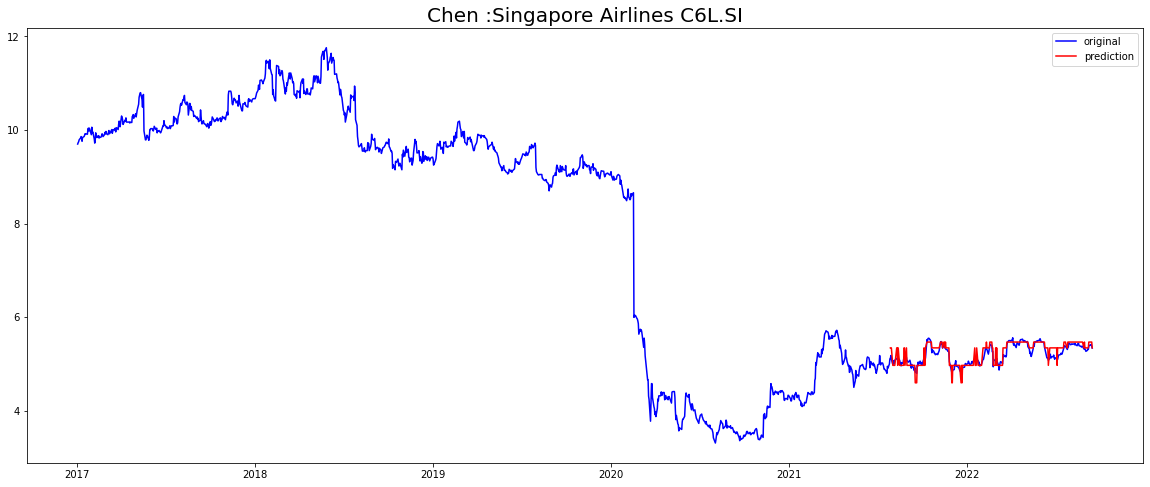

Mean Absolute Error : 0.08454965156794385
Mean Squared Error : 0.011546573057491172
Root Mean Squared Error : 0.10745498153874102
Mean Absolute Percentage Error : 0.016388267939573764


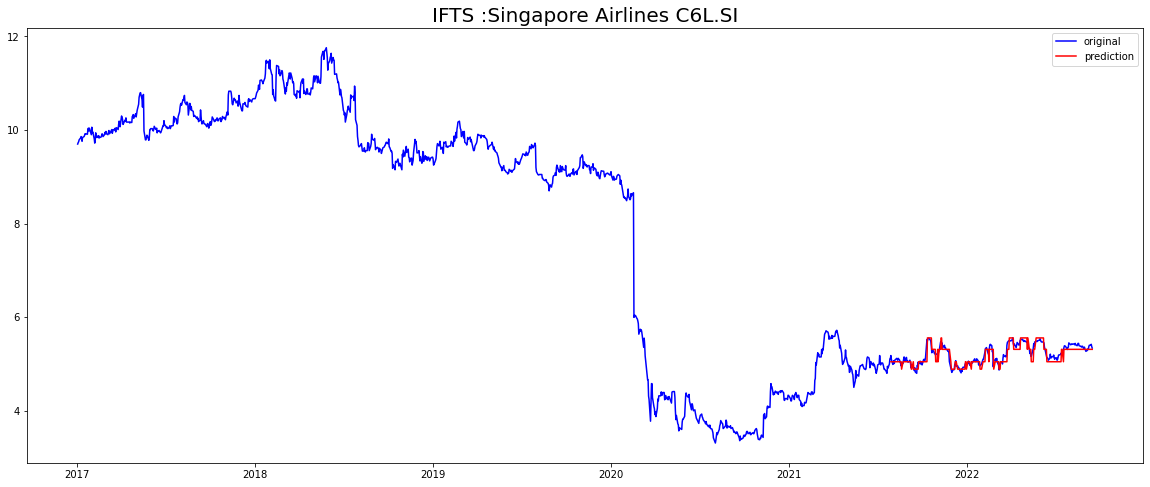

Mean Absolute Error : 0.07413466682843015
Mean Squared Error : 0.009195065001933104
Root Mean Squared Error : 0.09589090155970535
Mean Absolute Percentage Error : 0.014157241908052145


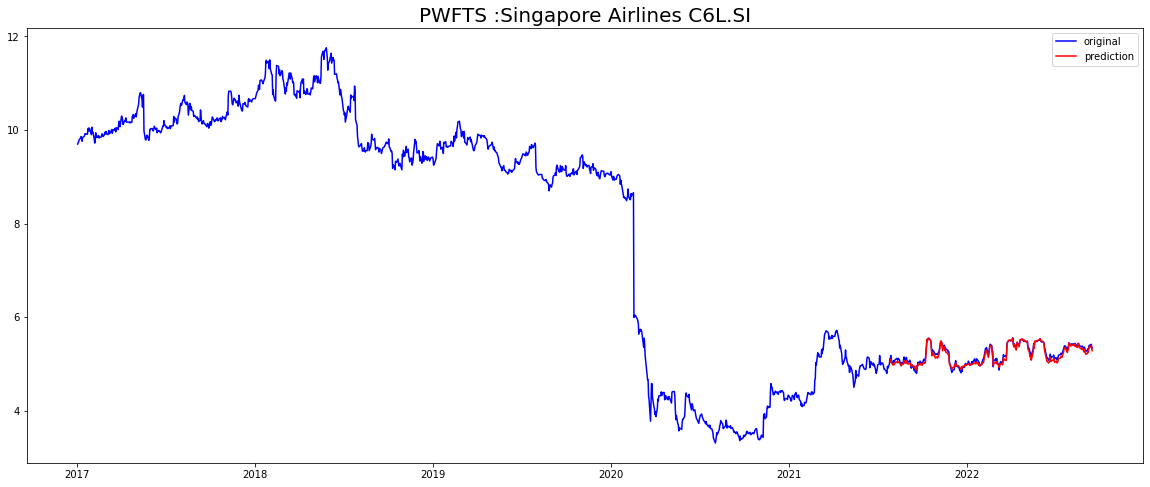

Mean Absolute Error : 0.04207431831471399
Mean Squared Error : 0.0023759367839005013
Root Mean Squared Error : 0.048743581976507445
Mean Absolute Percentage Error : 0.008136235727311635


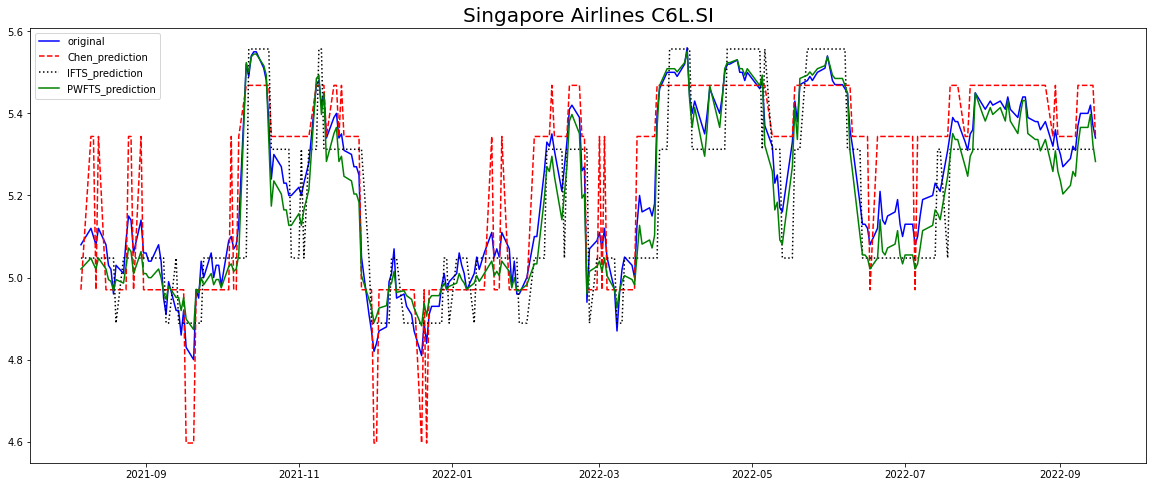

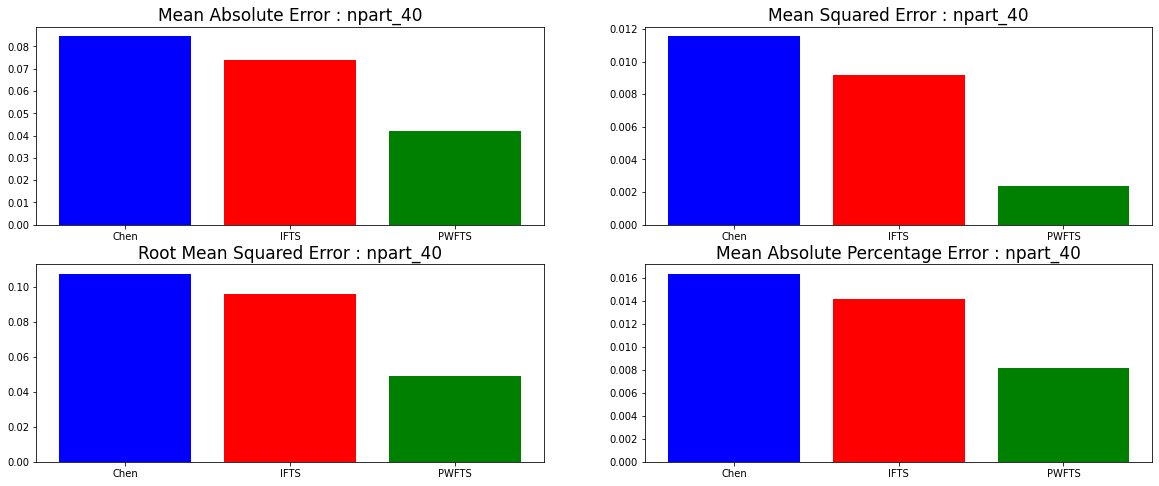

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[1]["Date"], d[1])
plt.title(data_names[1], fontsize=17);
fs_1 = Grid.GridPartitioner(data=train[1], npart=40)
print(fs_1)
model_chen_1 = chen.ConventionalFTS(partitioner=fs_1)
model_chen_1.fit(train[1])
print(model_chen_1)
forecasts_chen_1 = model_chen_1.predict(test[1])
forecasts_chen_1 = np.array(forecasts_chen_1).reshape(-1,1)
forecasts_chen_1 = forecast_extender(forecasts_chen_1,data_len - len(forecasts_chen_1))
y_metrics_140 = []
plot_fig(d[1], forecasts_chen_1, 'Chen :'+data_names[1], y_metrics_140)
model_ifts_1 = ifts.IntervalFTS(partitioner=fs_1)
model_ifts_1.fit(np.array(train[1]).reshape(-1))
forecasts_ifts_1 = model_ifts_1.predict(np.array(test[1]).reshape(-1))
forecasts_ifts_1 = np.array(forecasts_ifts_1).reshape(-1,1)
forecasts_ifts_1 = forecast_extender(forecasts_ifts_1, data_len-len(forecasts_ifts_1))
plot_fig(d[1], forecasts_ifts_1, 'IFTS :'+ data_names[1], y_metrics_140)
model_pwfts_1 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_1)
model_pwfts_1.fit(np.array(train[1]).reshape(-2))
forecasts_pwfts_1 = model_pwfts_1.predict(np.array(test[1]).reshape(-1))
forecasts_pwfts_1 = np.array(forecasts_pwfts_1).reshape(-1,1)
forecasts_pwfts_1 = forecast_extender(forecasts_pwfts_1, data_len-len(forecasts_pwfts_1))
plot_fig(d[1], forecasts_pwfts_1, 'PWFTS :'+ data_names[1], y_metrics_140)
plot_all(data, forecasts_chen_1, forecasts_ifts_1, forecasts_pwfts_1, 1, 280)
plot_metrics(y_metrics_140, y_metrics_names, 40)

## 60

Grid:
A0: trimf([2.81305, 2.979, 3.14495])
A1: trimf([2.979, 3.14495, 3.3109])
A2: trimf([3.14495, 3.3109, 3.47685])
A3: trimf([3.3109, 3.47685, 3.6428000000000003])
A4: trimf([3.47685, 3.6428000000000003, 3.8087500000000003])
A5: trimf([3.6428000000000003, 3.8087500000000003, 3.9747000000000003])
A6: trimf([3.8087500000000003, 3.9747000000000003, 4.14065])
A7: trimf([3.974700000000001, 4.140650000000001, 4.3066])
A8: trimf([4.140650000000001, 4.3066, 4.47255])
A9: trimf([4.3066, 4.47255, 4.6385])
A10: trimf([4.472550000000001, 4.6385000000000005, 4.80445])
A11: trimf([4.638500000000001, 4.804450000000001, 4.970400000000001])
A12: trimf([4.804450000000001, 4.970400000000001, 5.13635])
A13: trimf([4.970400000000001, 5.13635, 5.3023])
A14: trimf([5.136350000000001, 5.302300000000001, 5.46825])
A15: trimf([5.302300000000002, 5.468250000000001, 5.634200000000001])
A16: trimf([5.468250000000001, 5.634200000000001, 5.80015])
A17: trimf([5.634200000000001, 5.80015, 5.9661])
A18: trimf([5.8001

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


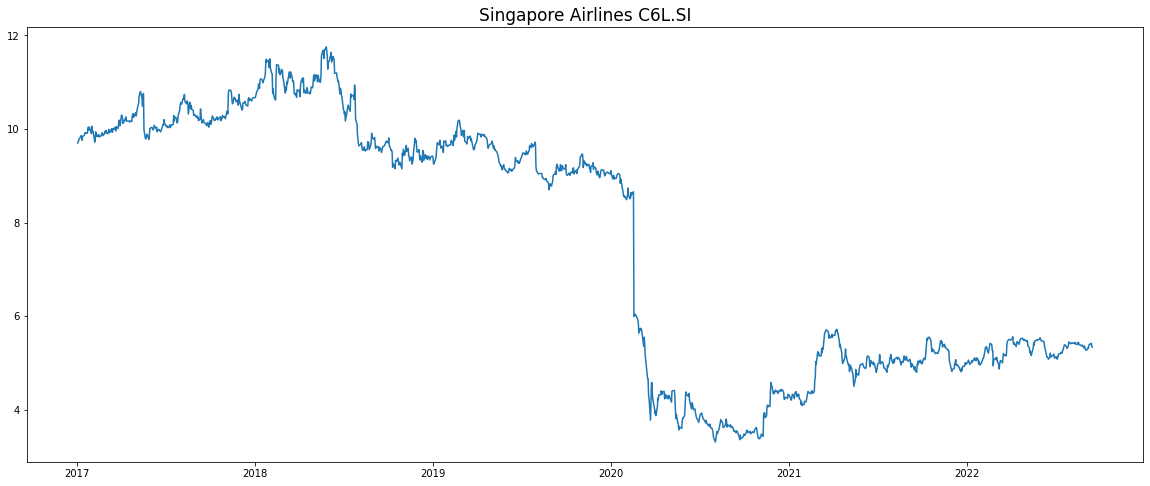

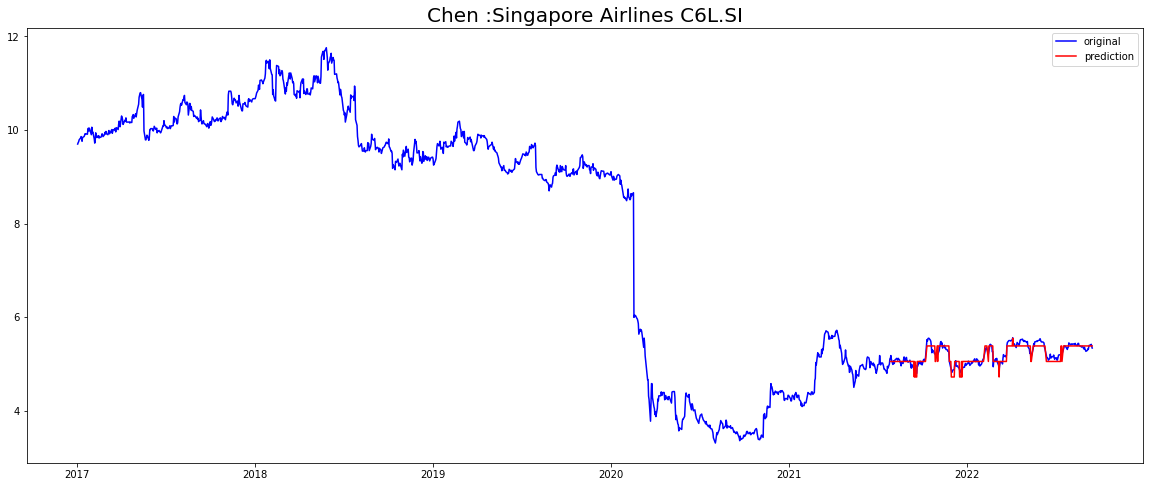

Mean Absolute Error : 0.07240026132404179
Mean Squared Error : 0.007449378865418108
Root Mean Squared Error : 0.08630978429713579
Mean Absolute Percentage Error : 0.013926323174667046


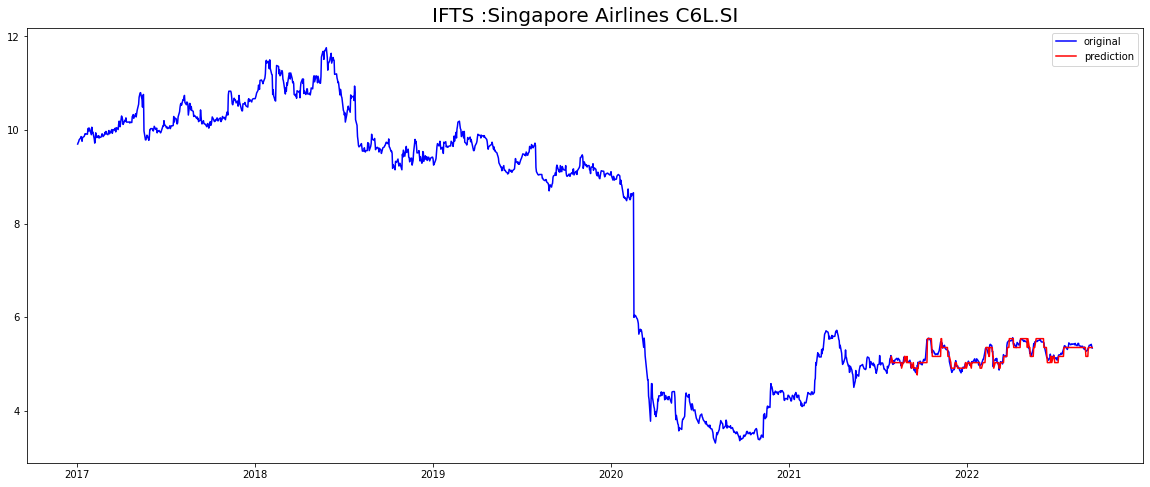

Mean Absolute Error : 0.06278779646979195
Mean Squared Error : 0.006883003353440029
Root Mean Squared Error : 0.08296386775844065
Mean Absolute Percentage Error : 0.012022438016387478


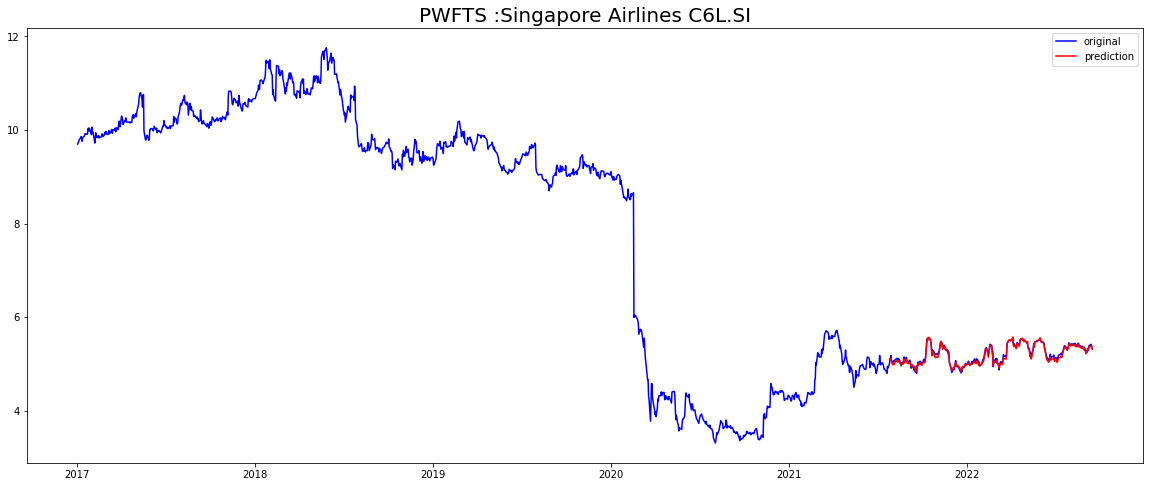

Mean Absolute Error : 0.030991467456593112
Mean Squared Error : 0.0012267296077999748
Root Mean Squared Error : 0.03502469996730843
Mean Absolute Percentage Error : 0.005985581048093522


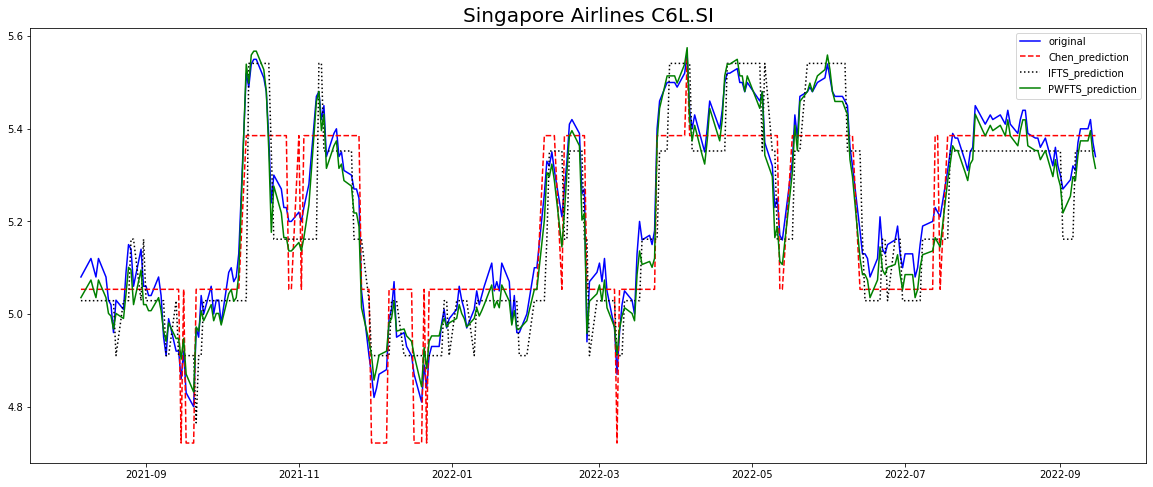

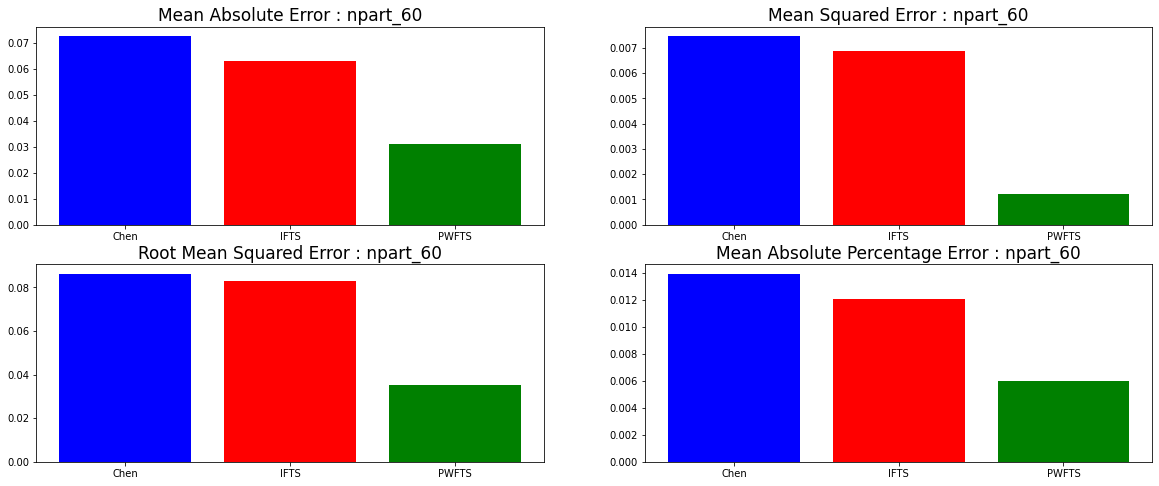

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[1]["Date"], d[1])
plt.title(data_names[1], fontsize=17);
fs_1 = Grid.GridPartitioner(data=train[1], npart=60)
print(fs_1)
model_chen_1 = chen.ConventionalFTS(partitioner=fs_1)
model_chen_1.fit(train[1])
print(model_chen_1)
forecasts_chen_1 = model_chen_1.predict(test[1])
forecasts_chen_1 = np.array(forecasts_chen_1).reshape(-1,1)
forecasts_chen_1 = forecast_extender(forecasts_chen_1,data_len - len(forecasts_chen_1))
y_metrics_160 = []
plot_fig(d[1], forecasts_chen_1, 'Chen :'+data_names[1], y_metrics_160)
model_ifts_1 = ifts.IntervalFTS(partitioner=fs_1)
model_ifts_1.fit(np.array(train[1]).reshape(-1))
forecasts_ifts_1 = model_ifts_1.predict(np.array(test[1]).reshape(-1))
forecasts_ifts_1 = np.array(forecasts_ifts_1).reshape(-1,1)
forecasts_ifts_1 = forecast_extender(forecasts_ifts_1, data_len-len(forecasts_ifts_1))
plot_fig(d[1], forecasts_ifts_1, 'IFTS :'+ data_names[1], y_metrics_160)
model_pwfts_1 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_1)
model_pwfts_1.fit(np.array(train[1]).reshape(-2))
forecasts_pwfts_1 = model_pwfts_1.predict(np.array(test[1]).reshape(-1))
forecasts_pwfts_1 = np.array(forecasts_pwfts_1).reshape(-1,1)
forecasts_pwfts_1 = forecast_extender(forecasts_pwfts_1, data_len-len(forecasts_pwfts_1))
plot_fig(d[1], forecasts_pwfts_1, 'PWFTS :'+ data_names[1], y_metrics_160)
plot_all(data, forecasts_chen_1, forecasts_ifts_1, forecasts_pwfts_1, 1, 280)
plot_metrics(y_metrics_160, y_metrics_names, 60)

## 80

Grid:
A0: trimf([2.8545375, 2.979, 3.1034625])
A1: trimf([2.979, 3.1034625, 3.227925])
A2: trimf([3.1034625, 3.227925, 3.3523875])
A3: trimf([3.227925, 3.3523875, 3.4768499999999998])
A4: trimf([3.3523875, 3.4768499999999998, 3.6013124999999997])
A5: trimf([3.4768499999999998, 3.6013124999999997, 3.7257749999999996])
A6: trimf([3.6013124999999997, 3.7257749999999996, 3.8502374999999995])
A7: trimf([3.7257749999999996, 3.8502374999999995, 3.9746999999999995])
A8: trimf([3.8502374999999995, 3.9746999999999995, 4.099162499999999])
A9: trimf([3.9746999999999995, 4.099162499999999, 4.223624999999999])
A10: trimf([4.099162499999999, 4.223624999999999, 4.348087499999999])
A11: trimf([4.223624999999999, 4.348087499999999, 4.472549999999999])
A12: trimf([4.348087499999999, 4.472549999999999, 4.597012499999999])
A13: trimf([4.472549999999999, 4.597012499999999, 4.721474999999999])
A14: trimf([4.597012499999999, 4.721474999999999, 4.845937499999999])
A15: trimf([4.721474999999999, 4.8459374999999

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


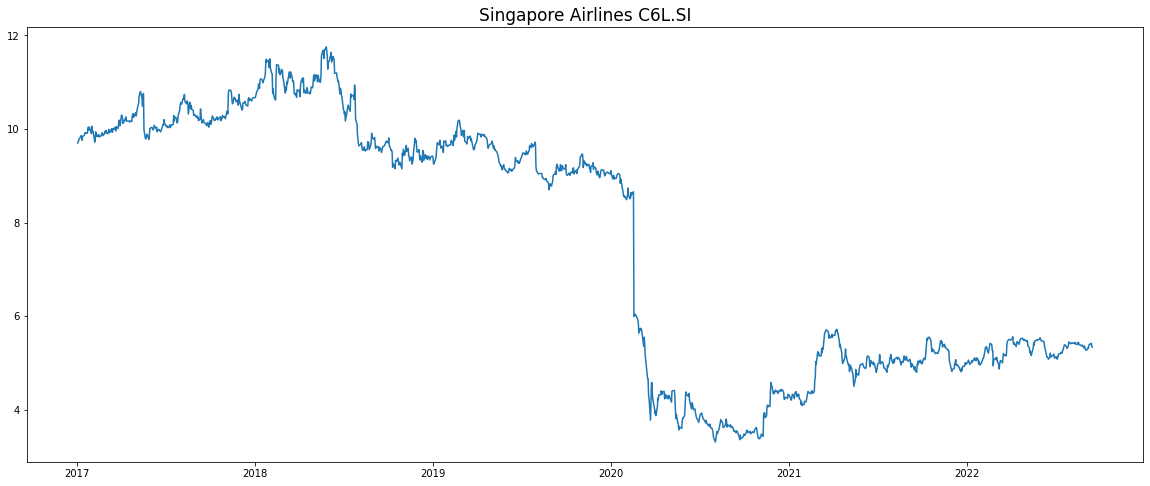

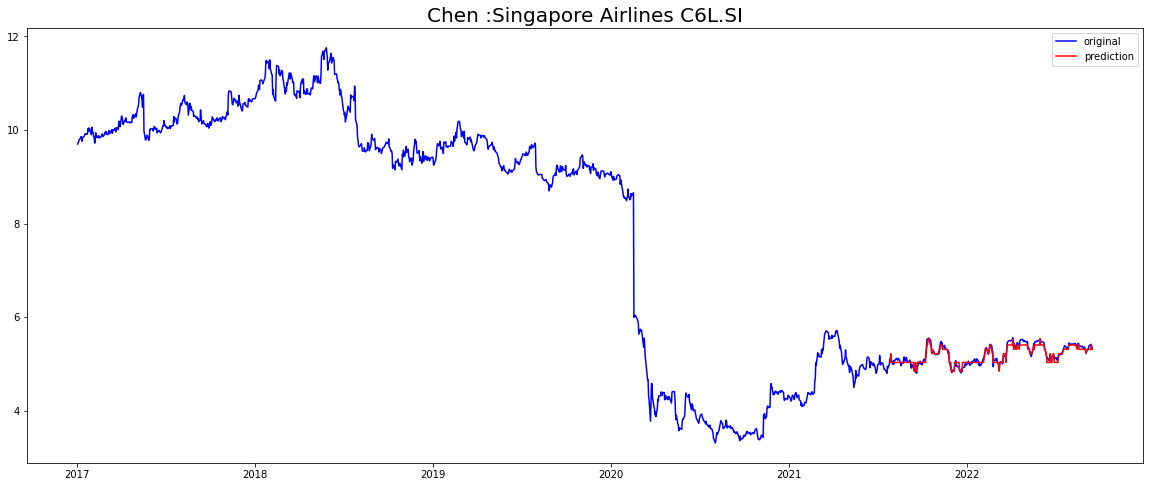

Mean Absolute Error : 0.04993563806620267
Mean Squared Error : 0.0036376218580888636
Root Mean Squared Error : 0.0603127006366724
Mean Absolute Percentage Error : 0.00957804855161141


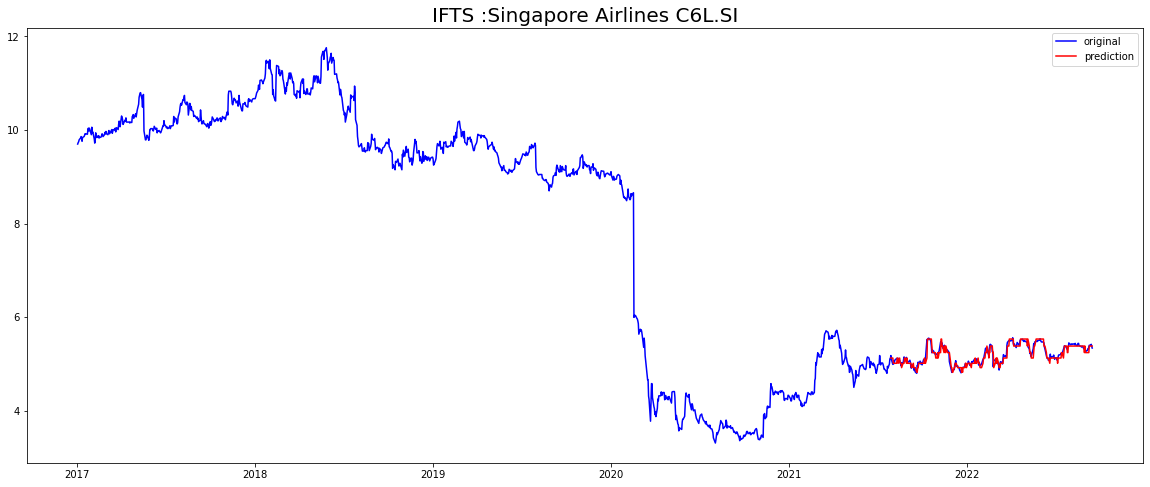

Mean Absolute Error : 0.056363984930921734
Mean Squared Error : 0.005679009301817309
Root Mean Squared Error : 0.07535920183904092
Mean Absolute Percentage Error : 0.010814353348960287


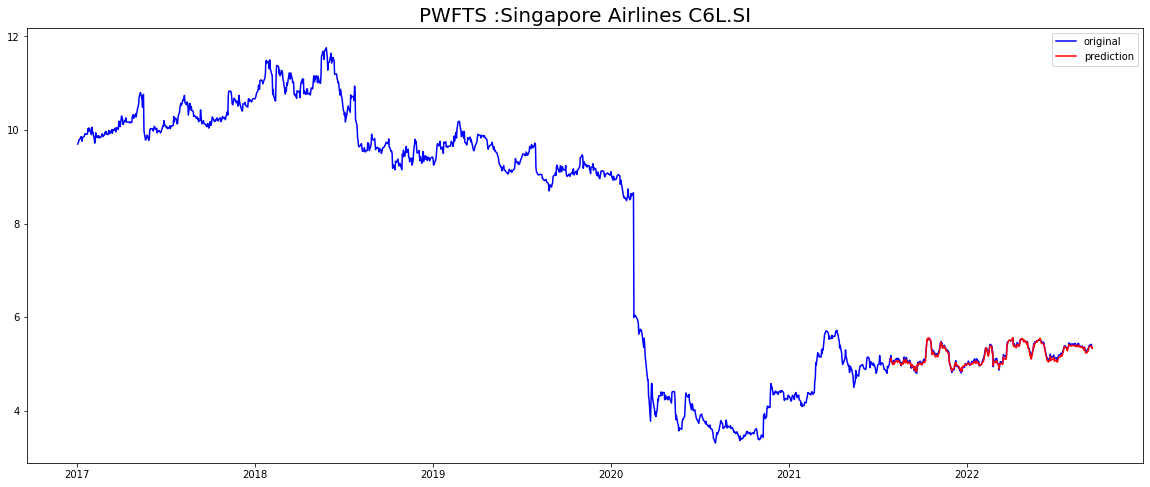

Mean Absolute Error : 0.028213730758991903
Mean Squared Error : 0.0010131159001640882
Root Mean Squared Error : 0.03182948161946858
Mean Absolute Percentage Error : 0.005443974656706321


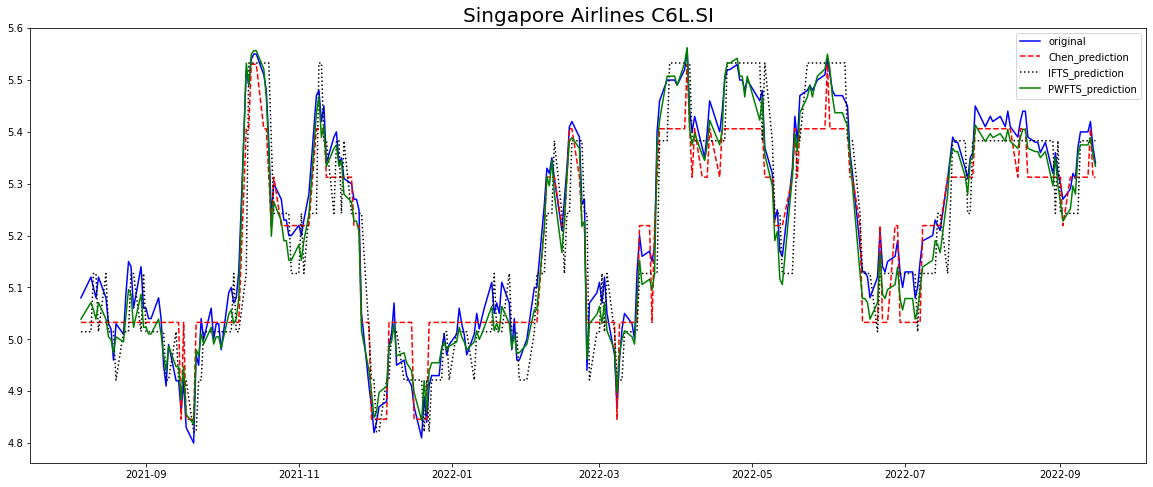

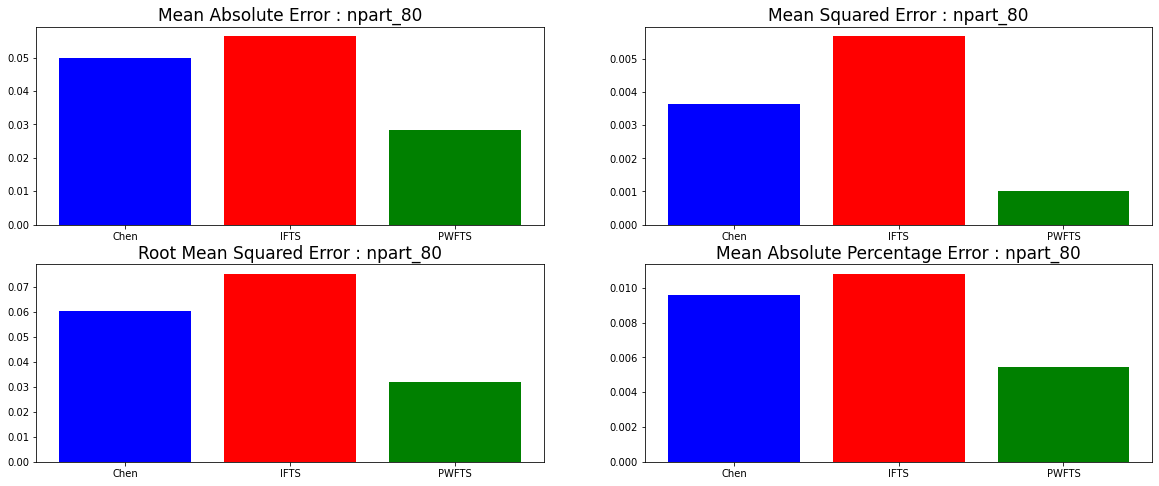

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[1]["Date"], d[1])
plt.title(data_names[1], fontsize=17);
fs_1 = Grid.GridPartitioner(data=train[1], npart=80)
print(fs_1)
model_chen_1 = chen.ConventionalFTS(partitioner=fs_1)
model_chen_1.fit(train[1])
print(model_chen_1)
forecasts_chen_1 = model_chen_1.predict(test[1])
forecasts_chen_1 = np.array(forecasts_chen_1).reshape(-1,1)
forecasts_chen_1 = forecast_extender(forecasts_chen_1,data_len - len(forecasts_chen_1))
y_metrics_180 = []
plot_fig(d[1], forecasts_chen_1, 'Chen :'+data_names[1], y_metrics_180)
model_ifts_1 = ifts.IntervalFTS(partitioner=fs_1)
model_ifts_1.fit(np.array(train[1]).reshape(-1))
forecasts_ifts_1 = model_ifts_1.predict(np.array(test[1]).reshape(-1))
forecasts_ifts_1 = np.array(forecasts_ifts_1).reshape(-1,1)
forecasts_ifts_1 = forecast_extender(forecasts_ifts_1, data_len-len(forecasts_ifts_1))
plot_fig(d[1], forecasts_ifts_1, 'IFTS :'+ data_names[1], y_metrics_180)
model_pwfts_1 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_1)
model_pwfts_1.fit(np.array(train[1]).reshape(-2))
forecasts_pwfts_1 = model_pwfts_1.predict(np.array(test[1]).reshape(-1))
forecasts_pwfts_1 = np.array(forecasts_pwfts_1).reshape(-1,1)
forecasts_pwfts_1 = forecast_extender(forecasts_pwfts_1, data_len-len(forecasts_pwfts_1))
plot_fig(d[1], forecasts_pwfts_1, 'PWFTS :'+ data_names[1], y_metrics_180)
plot_all(data, forecasts_chen_1, forecasts_ifts_1, forecasts_pwfts_1, 1, 280)
plot_metrics(y_metrics_180, y_metrics_names, 80)

# 3

## 20

Grid:
A0: trimf([13.428399945, 15.309000000000001, 17.189600055])
A1: trimf([15.309, 17.189600055, 19.07020011])
A2: trimf([17.189600055, 19.07020011, 20.950800164999997])
A3: trimf([19.07020011, 20.950800164999997, 22.831400219999995])
A4: trimf([20.950800164999997, 22.831400219999995, 24.712000274999994])
A5: trimf([22.831400219999995, 24.712000274999994, 26.592600329999993])
A6: trimf([24.712000274999994, 26.592600329999993, 28.47320038499999])
A7: trimf([26.592600329999993, 28.47320038499999, 30.35380043999999])
A8: trimf([28.47320038499999, 30.35380043999999, 32.23440049499999])
A9: trimf([30.35380043999999, 32.23440049499999, 34.11500054999999])
A10: trimf([32.23440049499999, 34.11500054999999, 35.99560060499999])
A11: trimf([34.11500054999998, 35.995600604999986, 37.87620065999999])
A12: trimf([35.99560060499998, 37.87620065999998, 39.75680071499998])
A13: trimf([37.87620065999998, 39.75680071499998, 41.637400769999985])
A14: trimf([39.75680071499998, 41.637400769999985, 43.5180

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


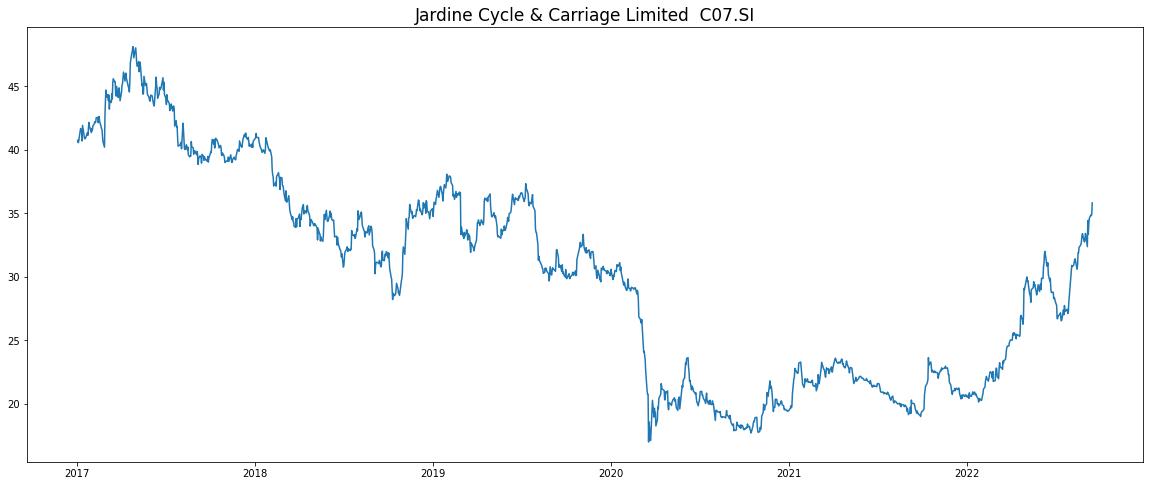

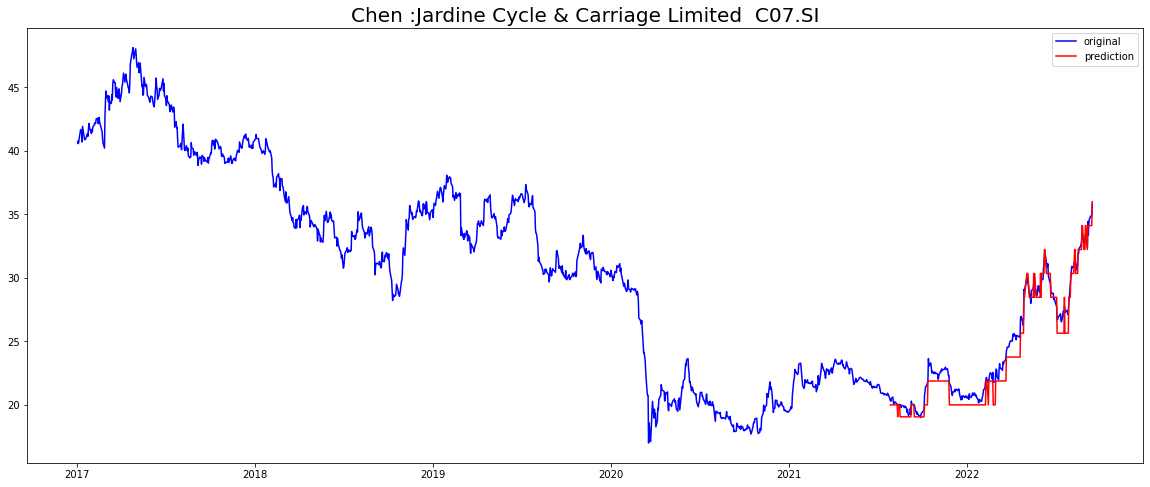

Mean Absolute Error : 0.7526382037804901
Mean Squared Error : 0.7845755909094201
Root Mean Squared Error : 0.8857627170463995
Mean Absolute Percentage Error : 0.03144928955259691


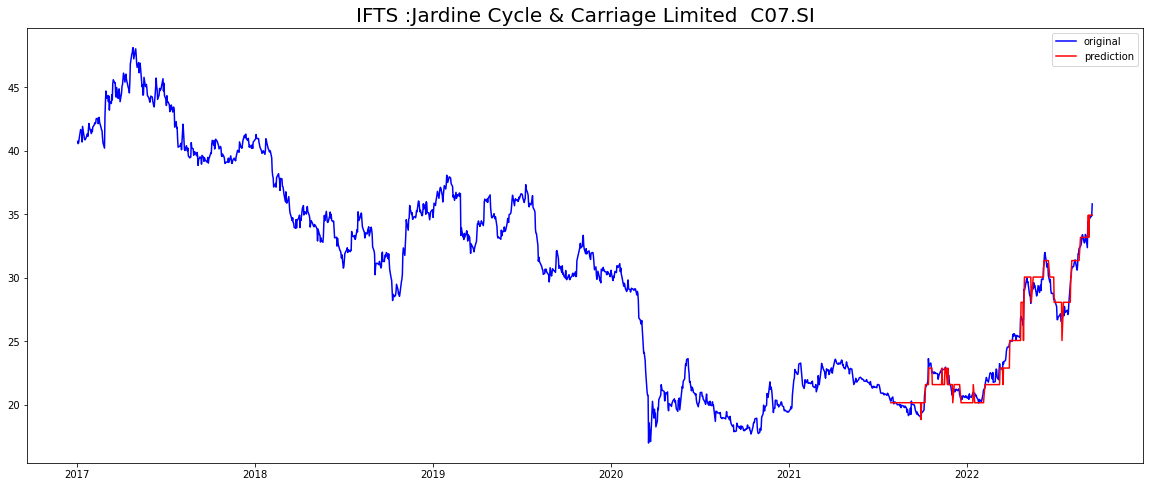

Mean Absolute Error : 0.6176778306390327
Mean Squared Error : 0.5904129540901396
Root Mean Squared Error : 0.7683833379831577
Mean Absolute Percentage Error : 0.025375291574354444


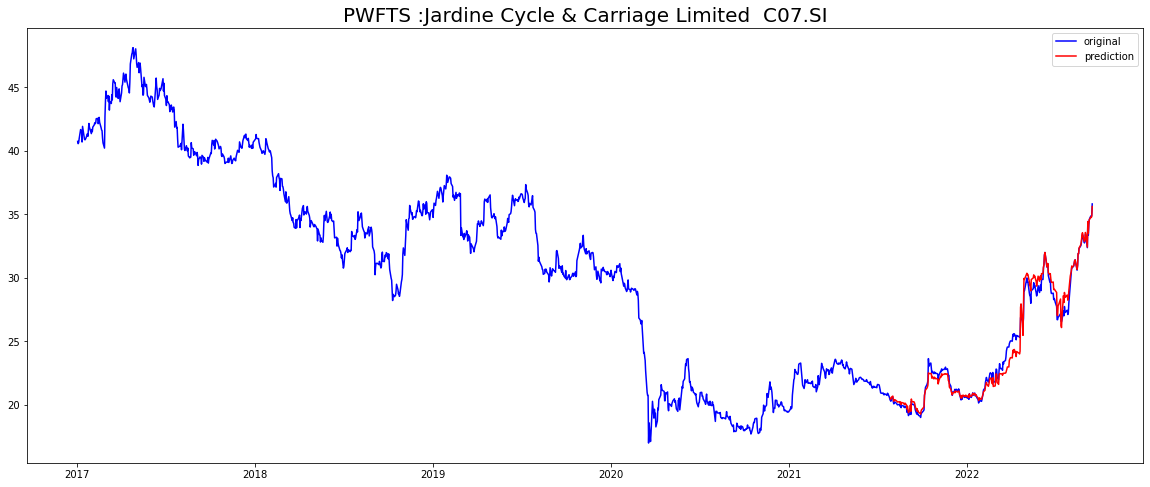

Mean Absolute Error : 0.4329134546860902
Mean Squared Error : 0.345194394250508
Root Mean Squared Error : 0.5875324622950702
Mean Absolute Percentage Error : 0.017409978260199202


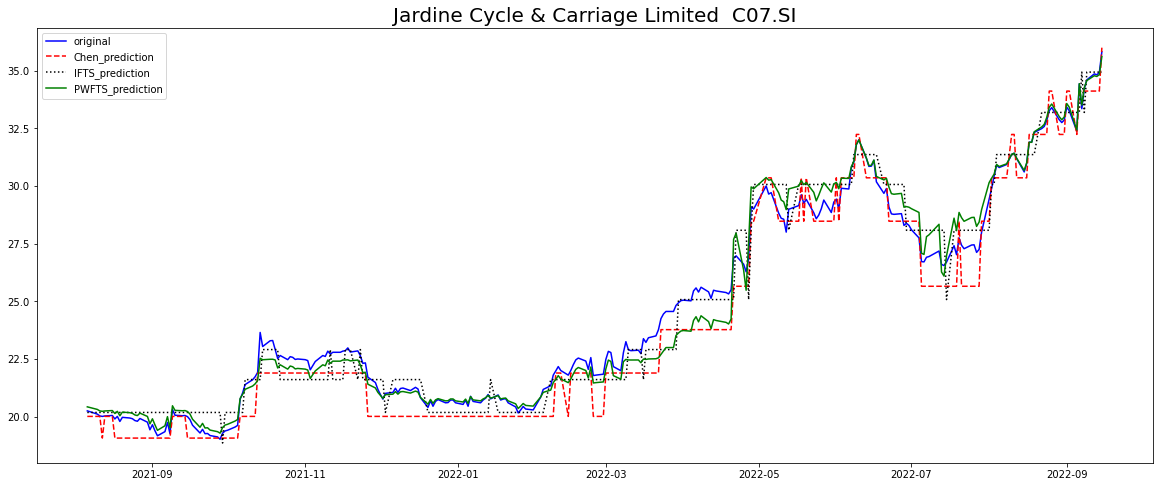

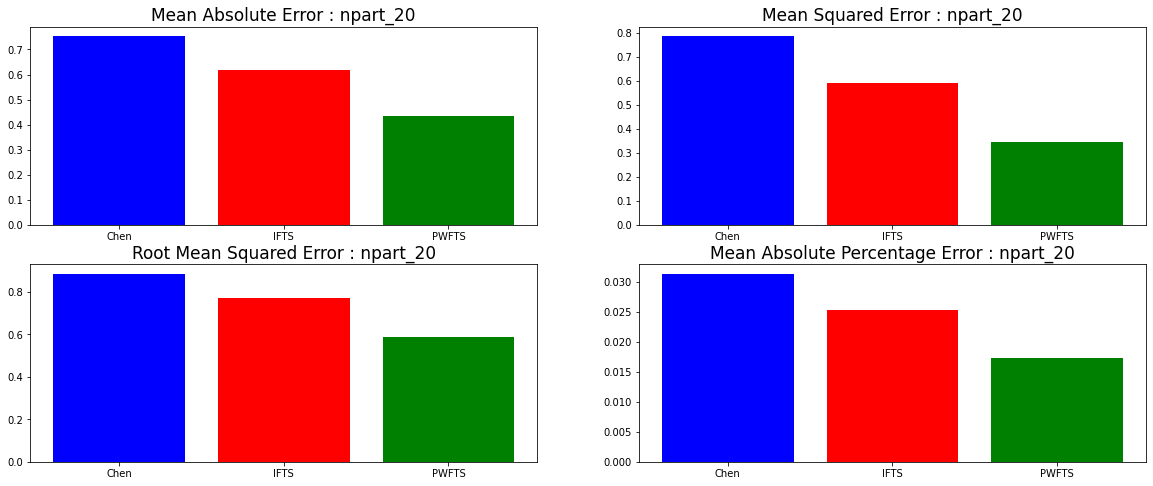

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[2]["Date"], d[2])
plt.title(data_names[2], fontsize=17);
fs_2 = Grid.GridPartitioner(data=train[2], npart=20)
print(fs_2)
model_chen_2 = chen.ConventionalFTS(partitioner=fs_2)
model_chen_2.fit(train[2])
print(model_chen_2)
forecasts_chen_2 = model_chen_2.predict(test[2])
forecasts_chen_2 = np.array(forecasts_chen_2).reshape(-1,1)
forecasts_chen_2 = forecast_extender(forecasts_chen_2,data_len - len(forecasts_chen_2))
y_metrics_2 = []
plot_fig(d[2], forecasts_chen_2, 'Chen :'+data_names[2], y_metrics_2)
model_ifts_2 = ifts.IntervalFTS(partitioner=fs_2)
model_ifts_2.fit(np.array(train[2]).reshape(-1))
forecasts_ifts_2 = model_ifts_2.predict(np.array(test[2]).reshape(-1))
forecasts_ifts_2 = np.array(forecasts_ifts_2).reshape(-1,1)
forecasts_ifts_2 = forecast_extender(forecasts_ifts_2, data_len-len(forecasts_ifts_2))
plot_fig(d[2], forecasts_ifts_2, 'IFTS :'+ data_names[2], y_metrics_2)
model_pwfts_2 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_2)
model_pwfts_2.fit(np.array(train[2]).reshape(-2))
forecasts_pwfts_2 = model_pwfts_2.predict(np.array(test[2]).reshape(-1))
forecasts_pwfts_2 = np.array(forecasts_pwfts_2).reshape(-1,1)
forecasts_pwfts_2 = forecast_extender(forecasts_pwfts_2, data_len-len(forecasts_pwfts_2))
plot_fig(d[2], forecasts_pwfts_2, 'PWFTS :'+ data_names[2], y_metrics_2)
plot_all(data, forecasts_chen_2, forecasts_ifts_2, forecasts_pwfts_2, 2, 280)
plot_metrics(y_metrics_2, y_metrics_names, 20)

## 40

Grid:
A0: trimf([14.368699972500002, 15.309000000000001, 16.249300027500002])
A1: trimf([15.309000000000003, 16.249300027500002, 17.189600055000003])
A2: trimf([16.249300027500002, 17.189600055000003, 18.129900082500004])
A3: trimf([17.189600055000003, 18.129900082500004, 19.070200110000005])
A4: trimf([18.129900082500004, 19.070200110000005, 20.010500137500006])
A5: trimf([19.070200110000005, 20.010500137500006, 20.950800165000008])
A6: trimf([20.010500137500006, 20.950800165000008, 21.89110019250001])
A7: trimf([20.950800165000008, 21.89110019250001, 22.83140022000001])
A8: trimf([21.89110019250001, 22.83140022000001, 23.77170024750001])
A9: trimf([22.83140022000001, 23.77170024750001, 24.712000275000012])
A10: trimf([23.77170024750001, 24.712000275000012, 25.652300302500013])
A11: trimf([24.712000275000012, 25.652300302500013, 26.592600330000014])
A12: trimf([25.652300302500013, 26.592600330000014, 27.532900357500015])
A13: trimf([26.592600330000014, 27.532900357500015, 28.473200385

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


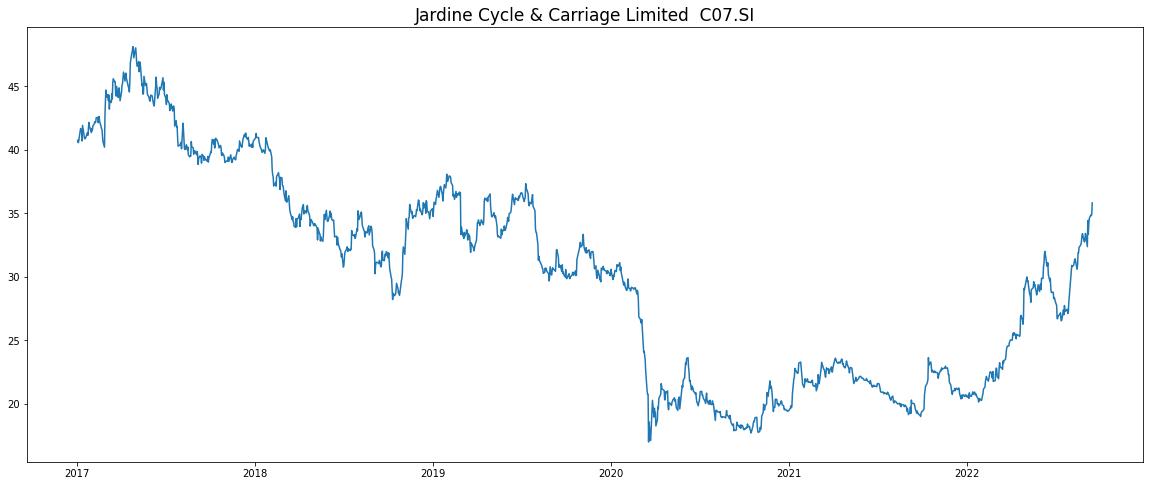

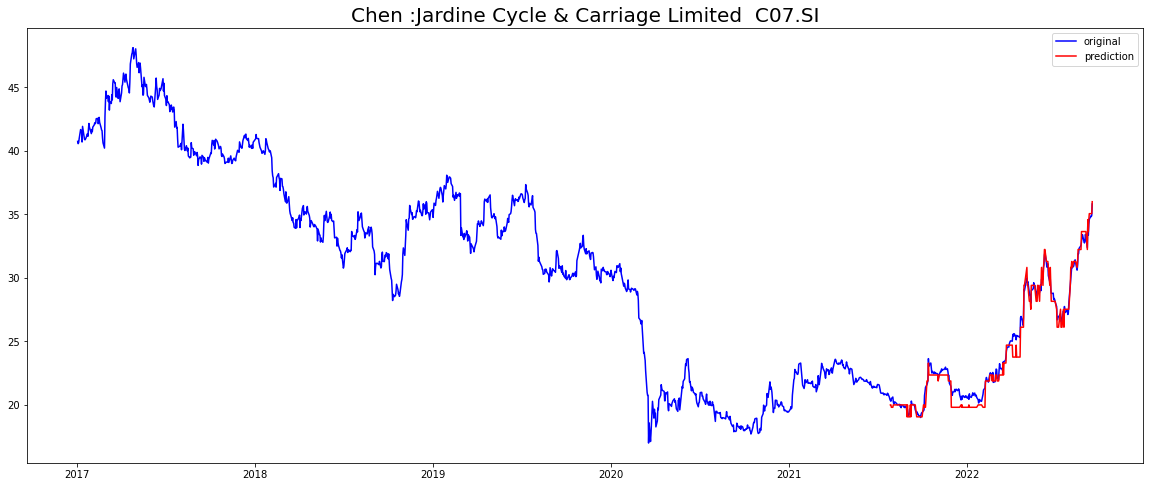

Mean Absolute Error : 0.47559945204529425
Mean Squared Error : 0.4011682647506723
Root Mean Squared Error : 0.6333784530205241
Mean Absolute Percentage Error : 0.020144241837541696


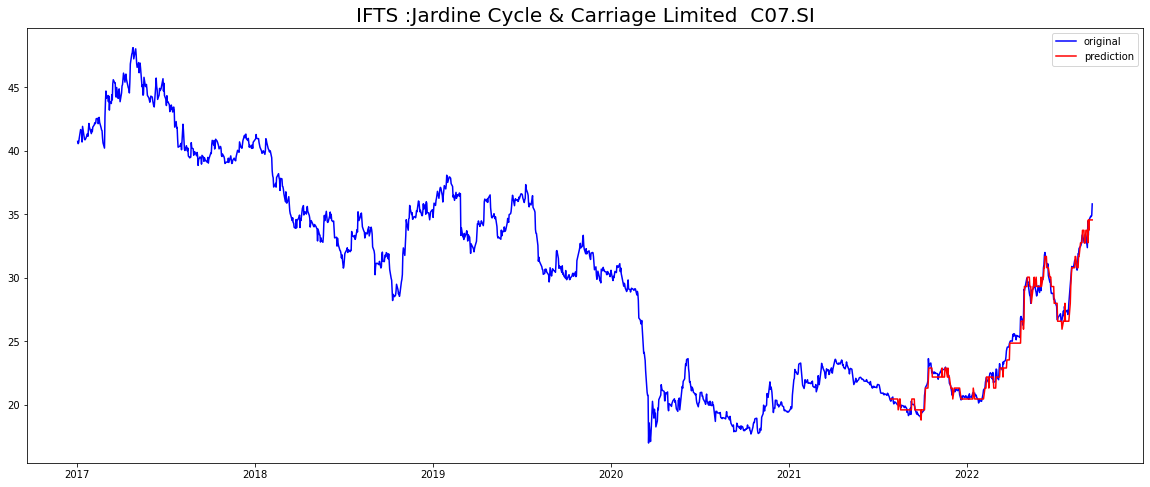

Mean Absolute Error : 0.42681933793662186
Mean Squared Error : 0.31365815914180367
Root Mean Squared Error : 0.5600519253978186
Mean Absolute Percentage Error : 0.01713142739415654


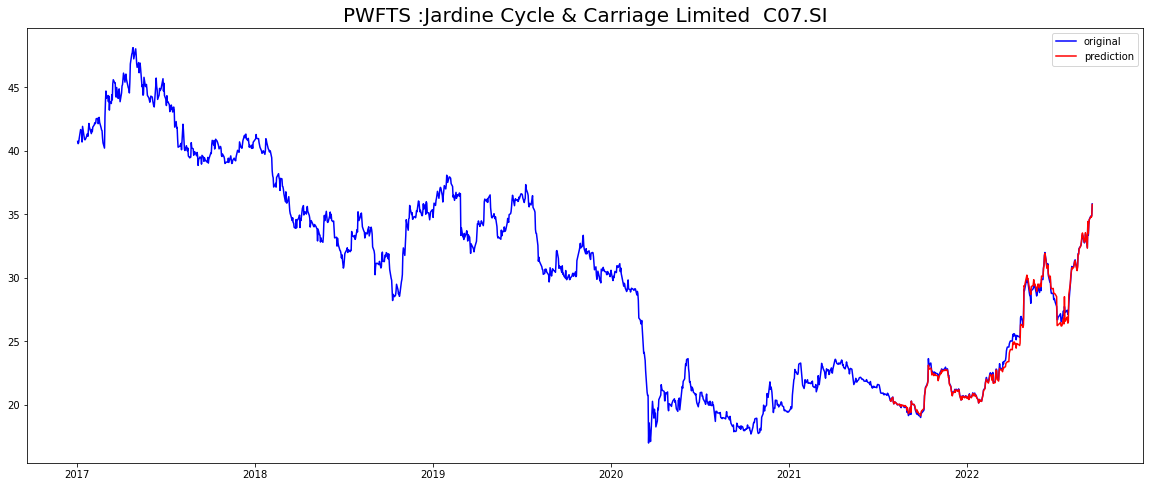

Mean Absolute Error : 0.20742077403574985
Mean Squared Error : 0.09518060829699923
Root Mean Squared Error : 0.3085135463751944
Mean Absolute Percentage Error : 0.008180935960023865


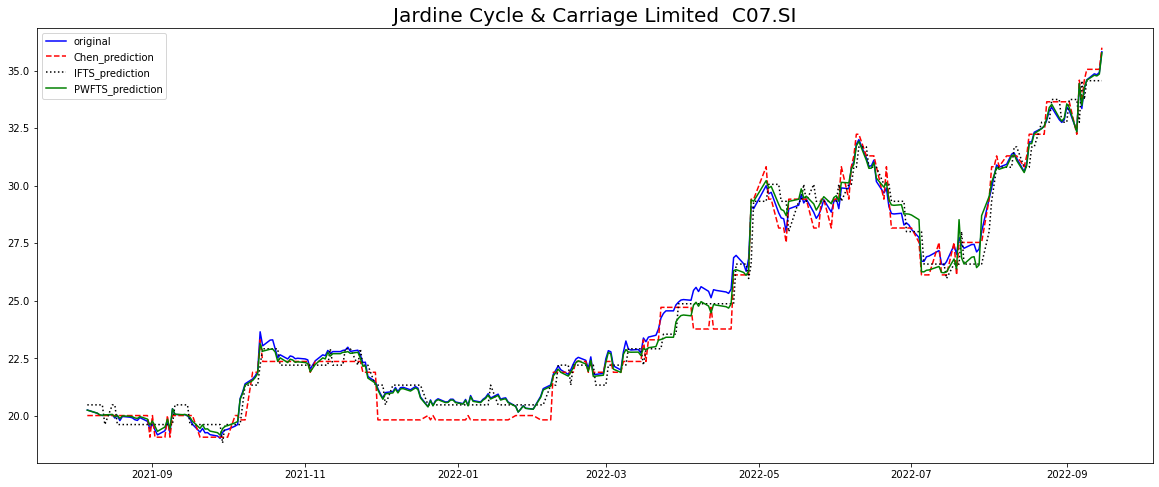

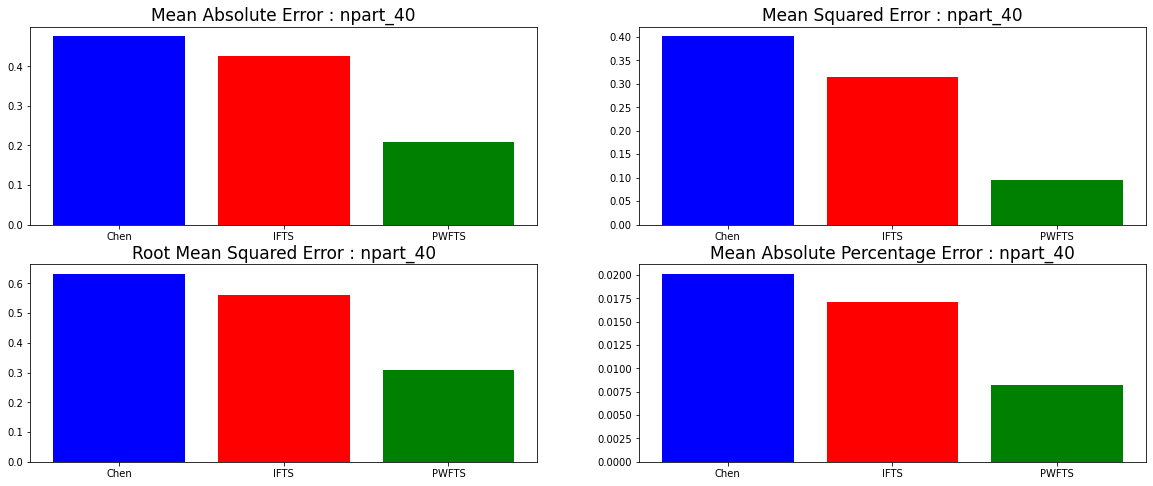

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[2]["Date"], d[2])
plt.title(data_names[2], fontsize=17);
fs_2 = Grid.GridPartitioner(data=train[2], npart=40)
print(fs_2)
model_chen_2 = chen.ConventionalFTS(partitioner=fs_2)
model_chen_2.fit(train[2])
print(model_chen_2)
forecasts_chen_2 = model_chen_2.predict(test[2])
forecasts_chen_2 = np.array(forecasts_chen_2).reshape(-1,1)
forecasts_chen_2 = forecast_extender(forecasts_chen_2,data_len - len(forecasts_chen_2))
y_metrics_240 = []
plot_fig(d[2], forecasts_chen_2, 'Chen :'+data_names[2], y_metrics_240)
model_ifts_2 = ifts.IntervalFTS(partitioner=fs_2)
model_ifts_2.fit(np.array(train[2]).reshape(-1))
forecasts_ifts_2 = model_ifts_2.predict(np.array(test[2]).reshape(-1))
forecasts_ifts_2 = np.array(forecasts_ifts_2).reshape(-1,1)
forecasts_ifts_2 = forecast_extender(forecasts_ifts_2, data_len-len(forecasts_ifts_2))
plot_fig(d[2], forecasts_ifts_2, 'IFTS :'+ data_names[2], y_metrics_240)
model_pwfts_2 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_2)
model_pwfts_2.fit(np.array(train[2]).reshape(-2))
forecasts_pwfts_2 = model_pwfts_2.predict(np.array(test[2]).reshape(-1))
forecasts_pwfts_2 = np.array(forecasts_pwfts_2).reshape(-1,1)
forecasts_pwfts_2 = forecast_extender(forecasts_pwfts_2, data_len-len(forecasts_pwfts_2))
plot_fig(d[2], forecasts_pwfts_2, 'PWFTS :'+ data_names[2], y_metrics_240)
plot_all(data, forecasts_chen_2, forecasts_ifts_2, forecasts_pwfts_2, 2, 280)
plot_metrics(y_metrics_240, y_metrics_names, 40)

## 60

Grid:
A0: trimf([14.682133315000002, 15.309000000000001, 15.935866685])
A1: trimf([15.309000000000001, 15.935866685, 16.56273337])
A2: trimf([15.935866685, 16.56273337, 17.189600055])
A3: trimf([16.56273337, 17.189600055, 17.81646674])
A4: trimf([17.189600055, 17.81646674, 18.443333425])
A5: trimf([17.81646674, 18.443333425, 19.07020011])
A6: trimf([18.443333425, 19.07020011, 19.697066794999998])
A7: trimf([19.07020011, 19.697066794999998, 20.323933479999997])
A8: trimf([19.697066794999998, 20.323933479999997, 20.950800164999997])
A9: trimf([20.323933479999997, 20.950800164999997, 21.577666849999996])
A10: trimf([20.950800164999997, 21.577666849999996, 22.204533534999996])
A11: trimf([21.577666849999996, 22.204533534999996, 22.831400219999995])
A12: trimf([22.204533534999996, 22.831400219999995, 23.458266904999995])
A13: trimf([22.831400219999995, 23.458266904999995, 24.085133589999995])
A14: trimf([23.458266904999995, 24.085133589999995, 24.712000274999994])
A15: trimf([24.08513358999

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


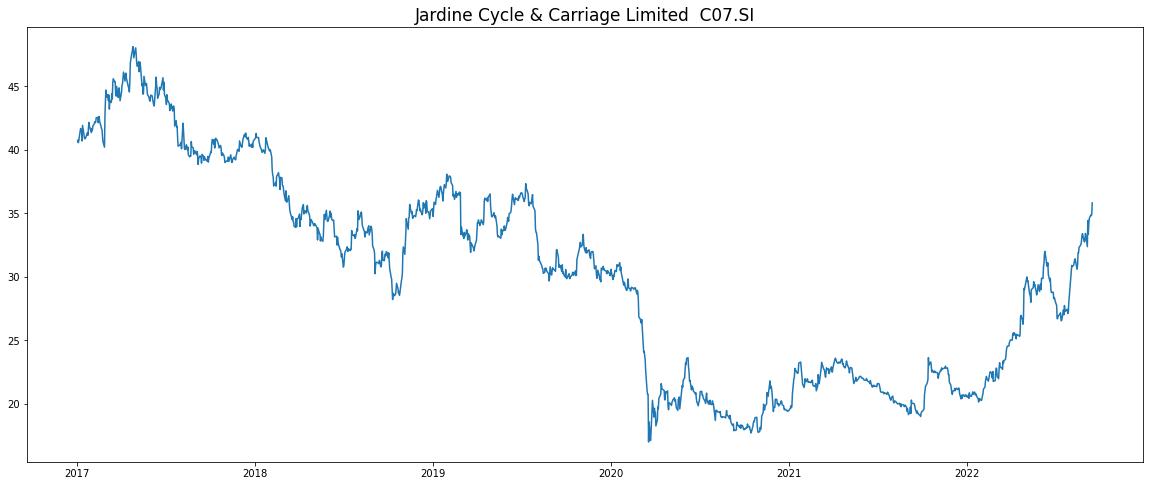

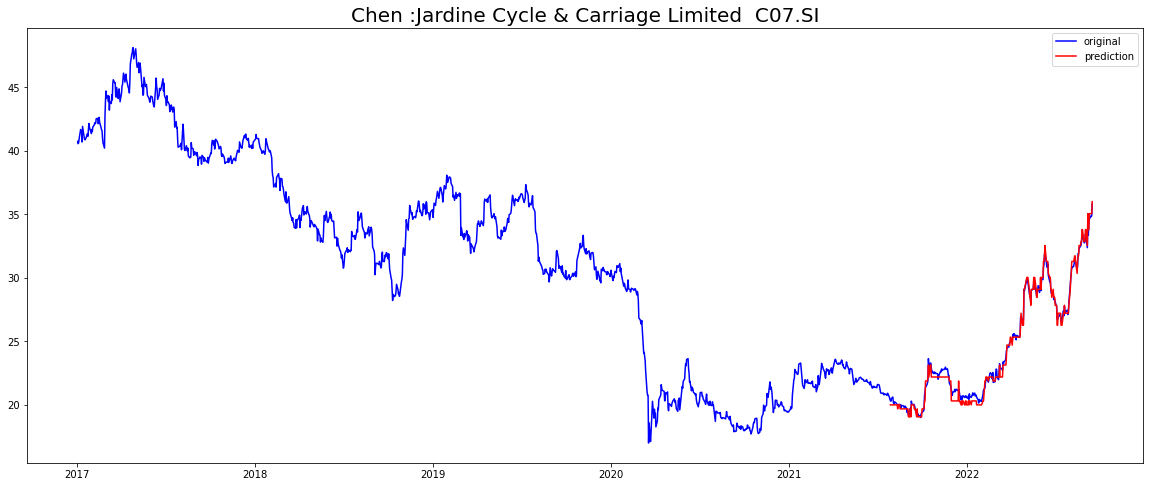

Mean Absolute Error : 0.3082204292351917
Mean Squared Error : 0.13932404103455892
Root Mean Squared Error : 0.3732613575426191
Mean Absolute Percentage Error : 0.013178410385984659


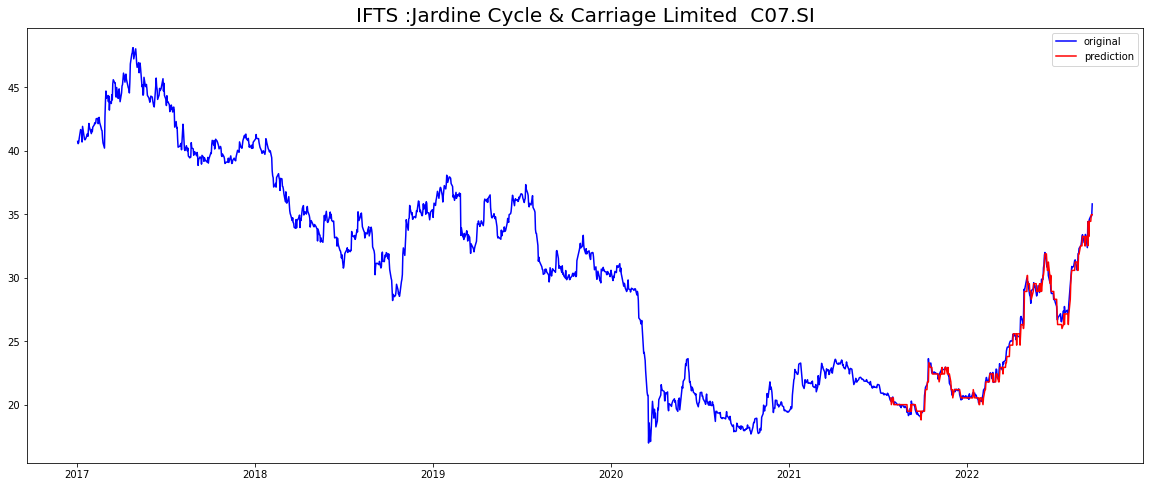

Mean Absolute Error : 0.35373925201972733
Mean Squared Error : 0.24795572362729848
Root Mean Squared Error : 0.4979515273872533
Mean Absolute Percentage Error : 0.014019137612035102


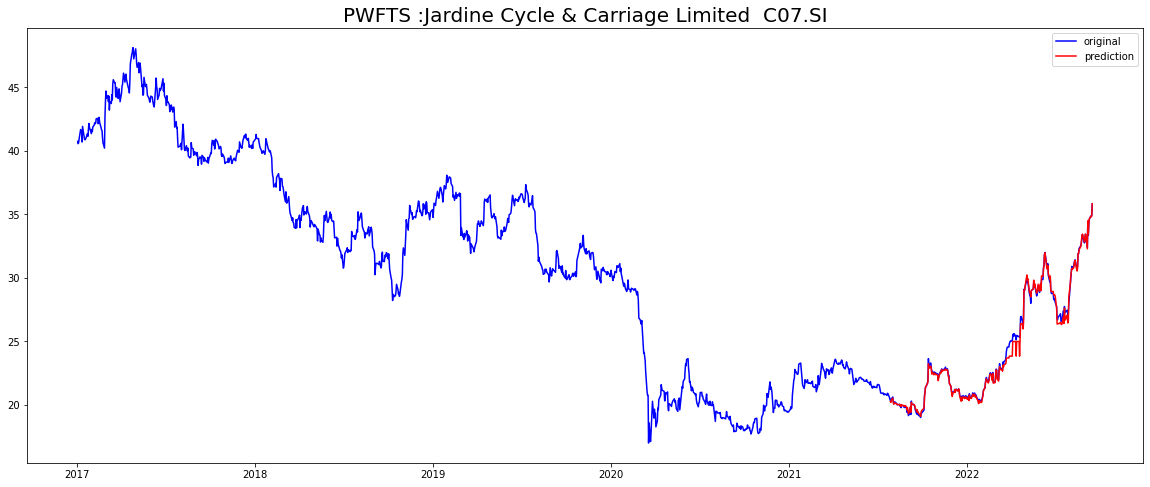

Mean Absolute Error : 0.1787737404249376
Mean Squared Error : 0.08297005777398465
Root Mean Squared Error : 0.28804523563840567
Mean Absolute Percentage Error : 0.007201340835162894


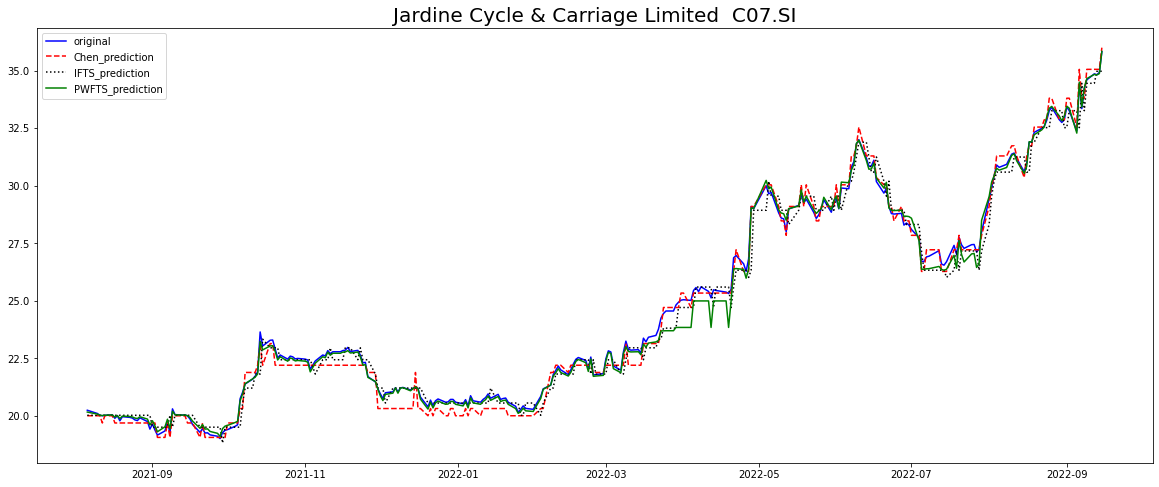

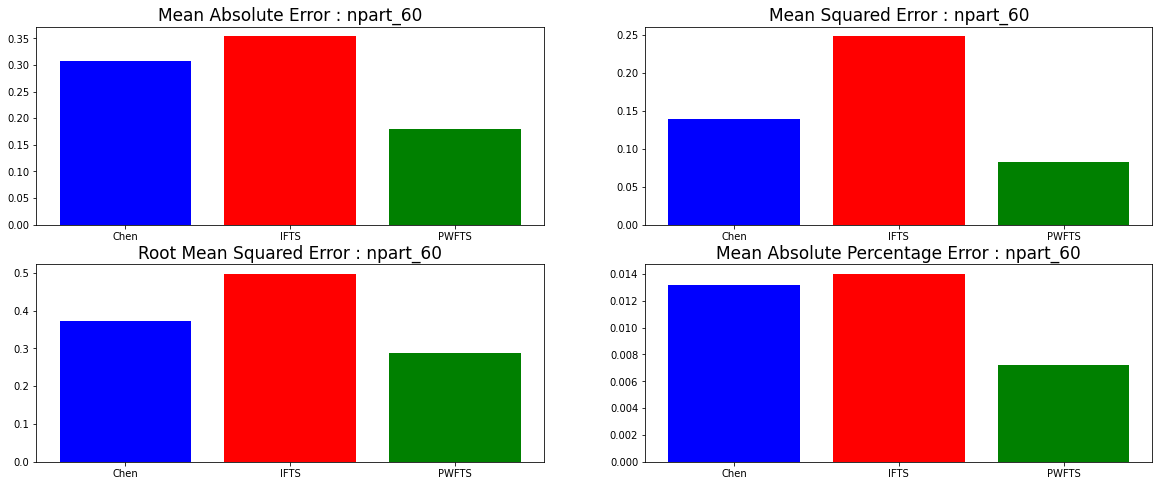

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[2]["Date"], d[2])
plt.title(data_names[2], fontsize=17);
fs_2 = Grid.GridPartitioner(data=train[2], npart=60)
print(fs_2)
model_chen_2 = chen.ConventionalFTS(partitioner=fs_2)
model_chen_2.fit(train[2])
print(model_chen_2)
forecasts_chen_2 = model_chen_2.predict(test[2])
forecasts_chen_2 = np.array(forecasts_chen_2).reshape(-1,1)
forecasts_chen_2 = forecast_extender(forecasts_chen_2,data_len - len(forecasts_chen_2))
y_metrics_260 = []
plot_fig(d[2], forecasts_chen_2, 'Chen :'+data_names[2], y_metrics_260)
model_ifts_2 = ifts.IntervalFTS(partitioner=fs_2)
model_ifts_2.fit(np.array(train[2]).reshape(-1))
forecasts_ifts_2 = model_ifts_2.predict(np.array(test[2]).reshape(-1))
forecasts_ifts_2 = np.array(forecasts_ifts_2).reshape(-1,1)
forecasts_ifts_2 = forecast_extender(forecasts_ifts_2, data_len-len(forecasts_ifts_2))
plot_fig(d[2], forecasts_ifts_2, 'IFTS :'+ data_names[2], y_metrics_260)
model_pwfts_2 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_2)
model_pwfts_2.fit(np.array(train[2]).reshape(-2))
forecasts_pwfts_2 = model_pwfts_2.predict(np.array(test[2]).reshape(-1))
forecasts_pwfts_2 = np.array(forecasts_pwfts_2).reshape(-1,1)
forecasts_pwfts_2 = forecast_extender(forecasts_pwfts_2, data_len-len(forecasts_pwfts_2))
plot_fig(d[2], forecasts_pwfts_2, 'PWFTS :'+ data_names[2], y_metrics_260)
plot_all(data, forecasts_chen_2, forecasts_ifts_2, forecasts_pwfts_2, 2, 280)
plot_metrics(y_metrics_260, y_metrics_names, 60)

## 80

Grid:
A0: trimf([14.83884998625, 15.309000000000001, 15.779150013750002])
A1: trimf([15.309000000000001, 15.779150013750002, 16.249300027500002])
A2: trimf([15.779150013750002, 16.249300027500002, 16.719450041250003])
A3: trimf([16.249300027500002, 16.719450041250003, 17.189600055000003])
A4: trimf([16.719450041250003, 17.189600055000003, 17.659750068750004])
A5: trimf([17.189600055000003, 17.659750068750004, 18.129900082500004])
A6: trimf([17.659750068750004, 18.129900082500004, 18.600050096250005])
A7: trimf([18.129900082500004, 18.600050096250005, 19.070200110000005])
A8: trimf([18.600050096250005, 19.070200110000005, 19.540350123750006])
A9: trimf([19.070200110000005, 19.540350123750006, 20.010500137500006])
A10: trimf([19.540350123750006, 20.010500137500006, 20.480650151250007])
A11: trimf([20.010500137500006, 20.480650151250007, 20.950800165000008])
A12: trimf([20.480650151250007, 20.950800165000008, 21.420950178750008])
A13: trimf([20.950800165000008, 21.420950178750008, 21.8911

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


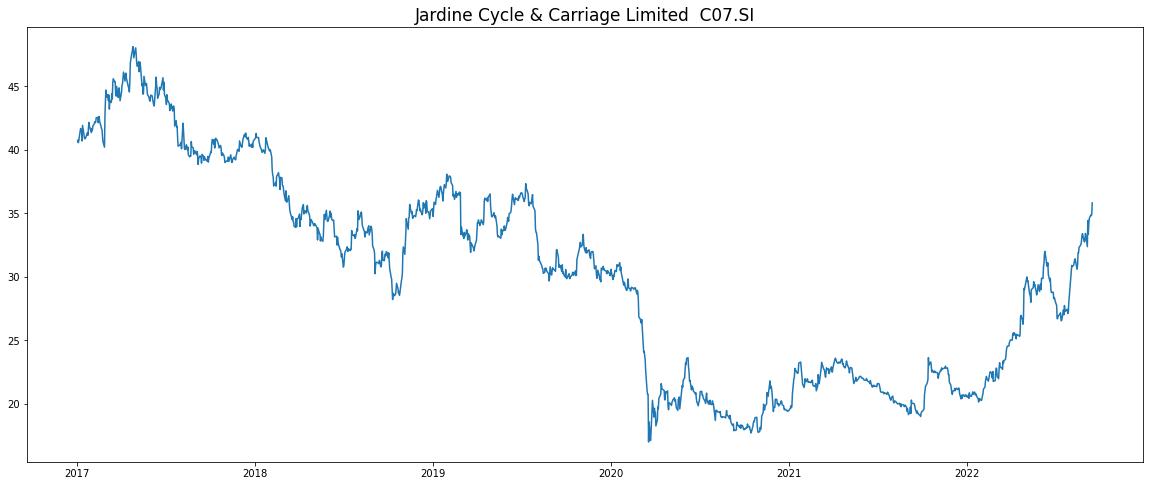

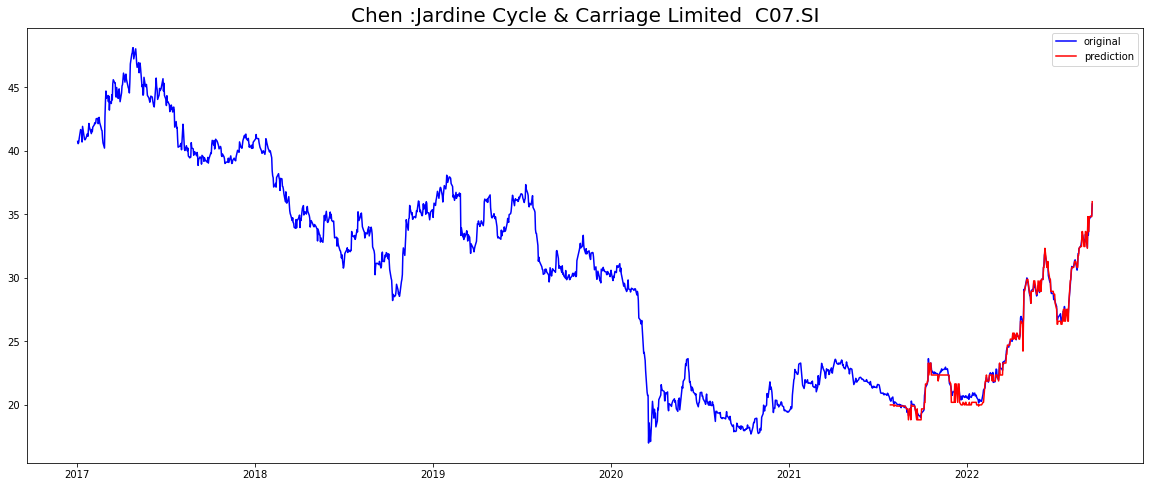

Mean Absolute Error : 0.2815607314619506
Mean Squared Error : 0.13393314055654174
Root Mean Squared Error : 0.3659687699197047
Mean Absolute Percentage Error : 0.012204114341147503


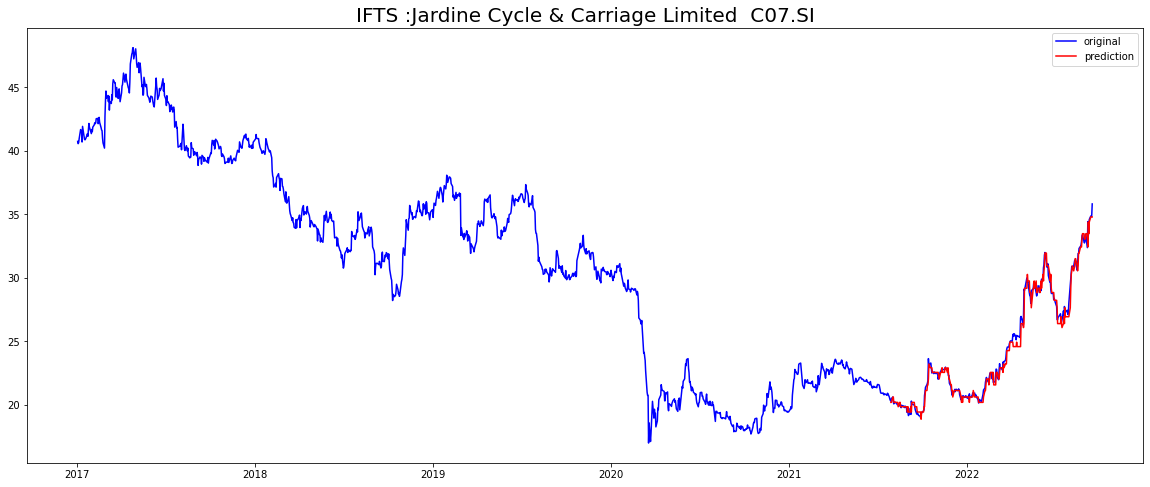

Mean Absolute Error : 0.3546305052084467
Mean Squared Error : 0.26182219355391934
Root Mean Squared Error : 0.5116856393860584
Mean Absolute Percentage Error : 0.014021034551958878


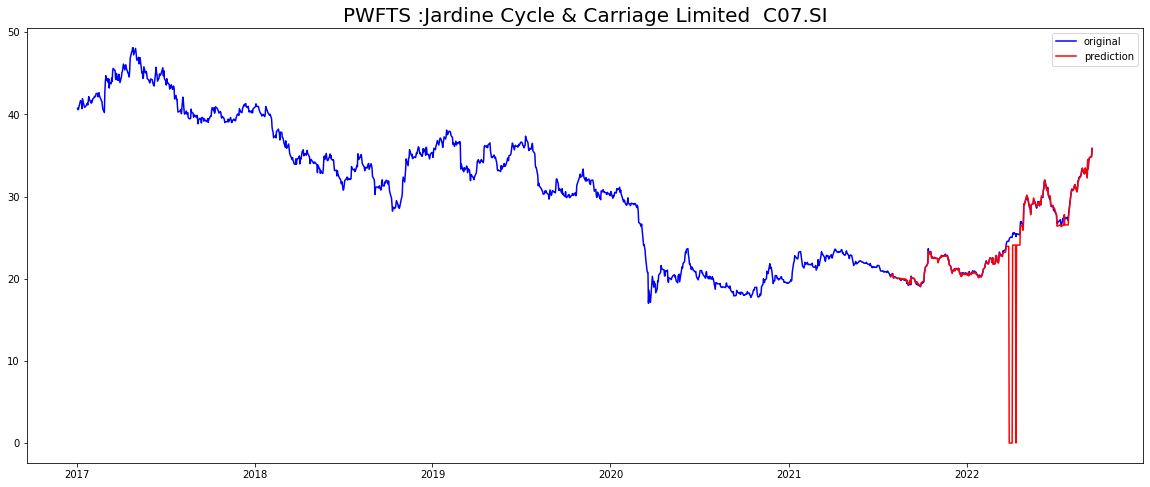

Mean Absolute Error : 0.6944473214301972
Mean Squared Error : 13.168681531820383
Root Mean Squared Error : 3.6288678030234696
Mean Absolute Percentage Error : 0.027807730081285075


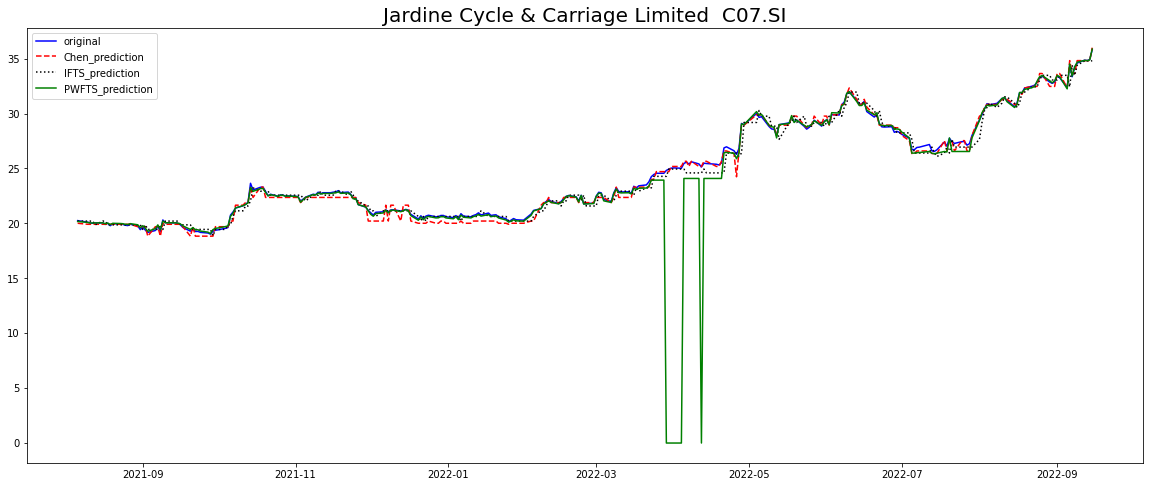

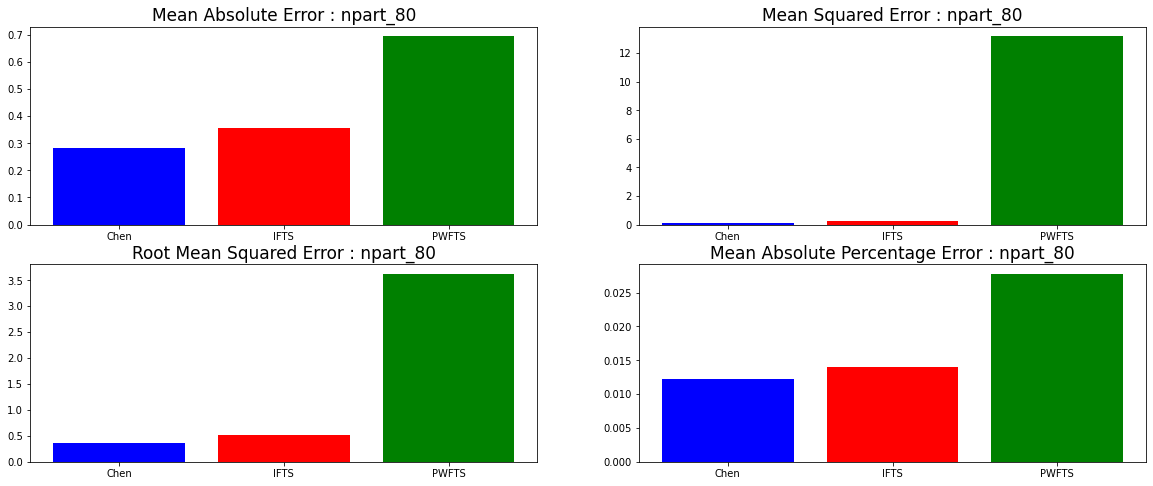

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[2]["Date"], d[2])
plt.title(data_names[2], fontsize=17);
fs_2 = Grid.GridPartitioner(data=train[2], npart=80)
print(fs_2)
model_chen_2 = chen.ConventionalFTS(partitioner=fs_2)
model_chen_2.fit(train[2])
print(model_chen_2)
forecasts_chen_2 = model_chen_2.predict(test[2])
forecasts_chen_2 = np.array(forecasts_chen_2).reshape(-1,1)
forecasts_chen_2 = forecast_extender(forecasts_chen_2,data_len - len(forecasts_chen_2))
y_metrics_280 = []
plot_fig(d[2], forecasts_chen_2, 'Chen :'+data_names[2], y_metrics_280)
model_ifts_2 = ifts.IntervalFTS(partitioner=fs_2)
model_ifts_2.fit(np.array(train[2]).reshape(-1))
forecasts_ifts_2 = model_ifts_2.predict(np.array(test[2]).reshape(-1))
forecasts_ifts_2 = np.array(forecasts_ifts_2).reshape(-1,1)
forecasts_ifts_2 = forecast_extender(forecasts_ifts_2, data_len-len(forecasts_ifts_2))
plot_fig(d[2], forecasts_ifts_2, 'IFTS :'+ data_names[2], y_metrics_280)
model_pwfts_2 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_2)
model_pwfts_2.fit(np.array(train[2]).reshape(-2))
forecasts_pwfts_2 = model_pwfts_2.predict(np.array(test[2]).reshape(-1))
forecasts_pwfts_2 = np.array(forecasts_pwfts_2).reshape(-1,1)
forecasts_pwfts_2 = forecast_extender(forecasts_pwfts_2, data_len-len(forecasts_pwfts_2))
plot_fig(d[2], forecasts_pwfts_2, 'PWFTS :'+ data_names[2], y_metrics_280)
plot_all(data, forecasts_chen_2, forecasts_ifts_2, forecasts_pwfts_2, 2, 280)
plot_metrics(y_metrics_280, y_metrics_names, 80)

# 4

## 20

Grid:
A0: trimf([0.3664, 0.405, 0.44360000000000005])
A1: trimf([0.405, 0.44360000000000005, 0.4822000000000001])
A2: trimf([0.44360000000000005, 0.4822000000000001, 0.5208])
A3: trimf([0.48220000000000013, 0.5208000000000002, 0.5594000000000001])
A4: trimf([0.5208000000000002, 0.5594000000000001, 0.5980000000000001])
A5: trimf([0.5594000000000001, 0.5980000000000001, 0.6366])
A6: trimf([0.5980000000000002, 0.6366000000000002, 0.6752000000000001])
A7: trimf([0.6366000000000003, 0.6752000000000002, 0.7138000000000002])
A8: trimf([0.6752000000000002, 0.7138000000000002, 0.7524000000000002])
A9: trimf([0.7138000000000002, 0.7524000000000002, 0.7910000000000001])
A10: trimf([0.7524000000000003, 0.7910000000000003, 0.8296000000000002])
A11: trimf([0.7910000000000004, 0.8296000000000003, 0.8682000000000003])
A12: trimf([0.8296000000000003, 0.8682000000000003, 0.9068000000000003])
A13: trimf([0.8682000000000003, 0.9068000000000003, 0.9454000000000002])
A14: trimf([0.9068000000000004, 0.945400

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


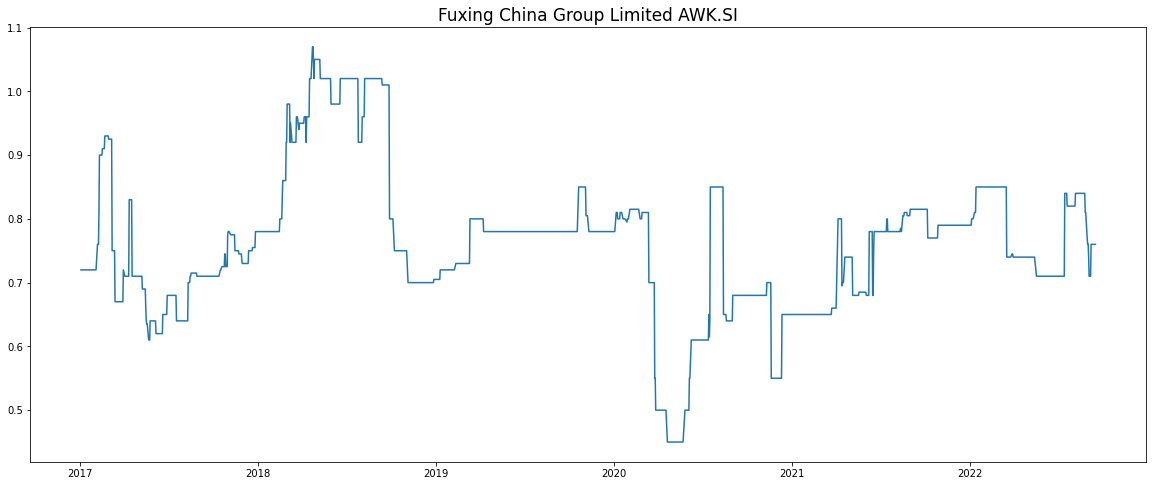

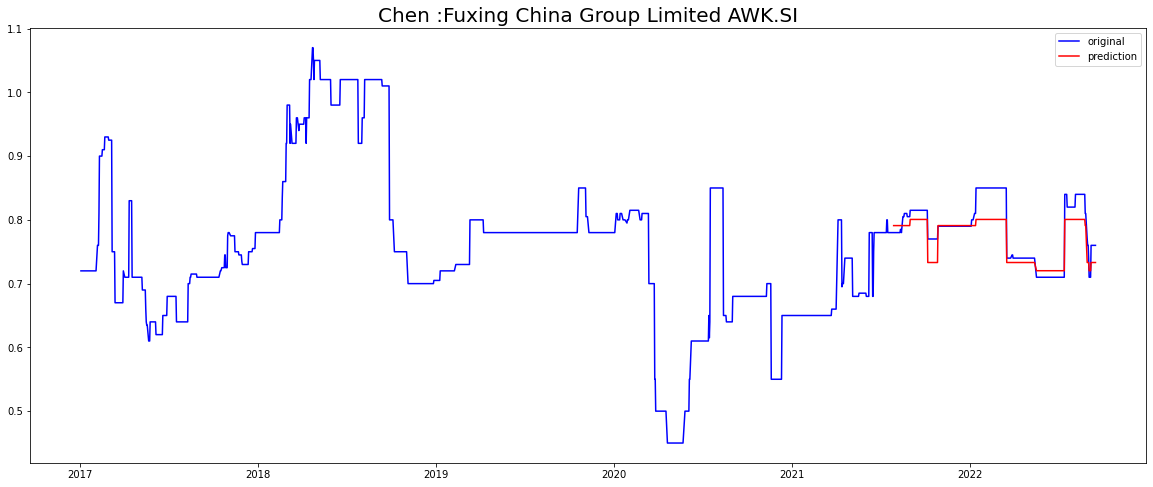

Mean Absolute Error : 0.018943321718931448
Mean Squared Error : 0.0006327932849399863
Root Mean Squared Error : 0.02515538282236997
Mean Absolute Percentage Error : 0.02345739174878063


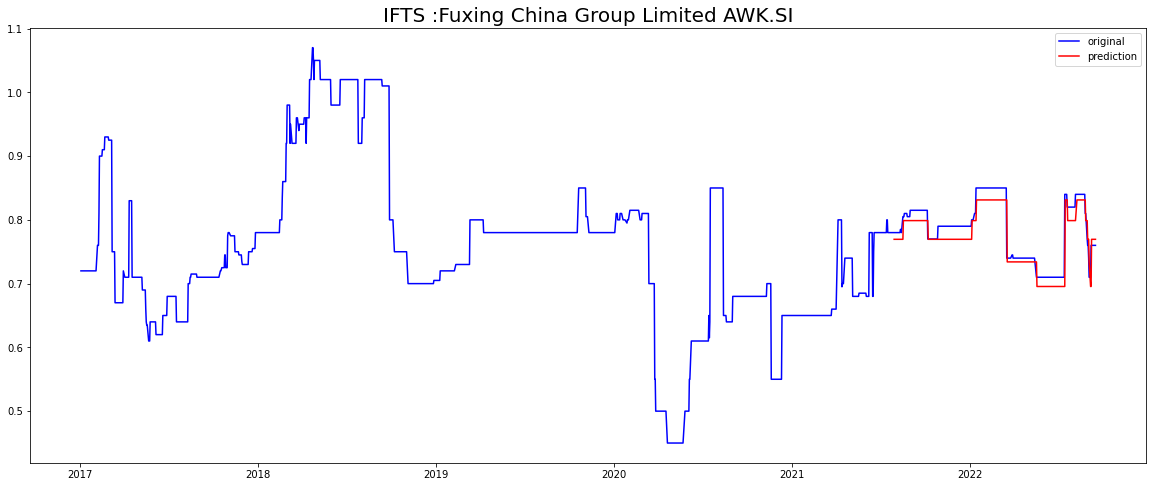

Mean Absolute Error : 0.015292661214918112
Mean Squared Error : 0.00037062983999001155
Root Mean Squared Error : 0.01925174901119406
Mean Absolute Percentage Error : 0.01936056913206791


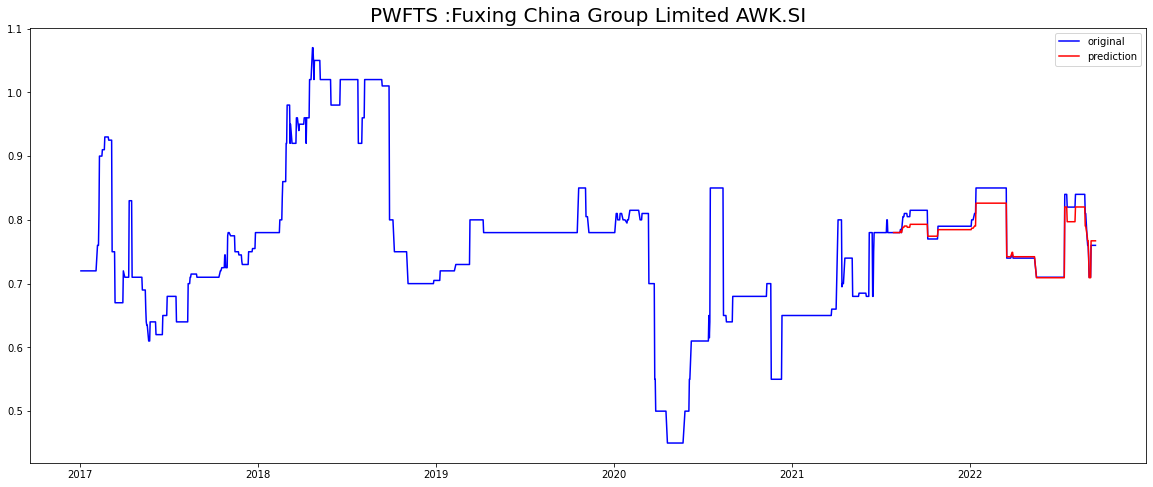

Mean Absolute Error : 0.010752518711392546
Mean Squared Error : 0.00020440882797194952
Root Mean Squared Error : 0.014297161535491914
Mean Absolute Percentage Error : 0.013115240217403408


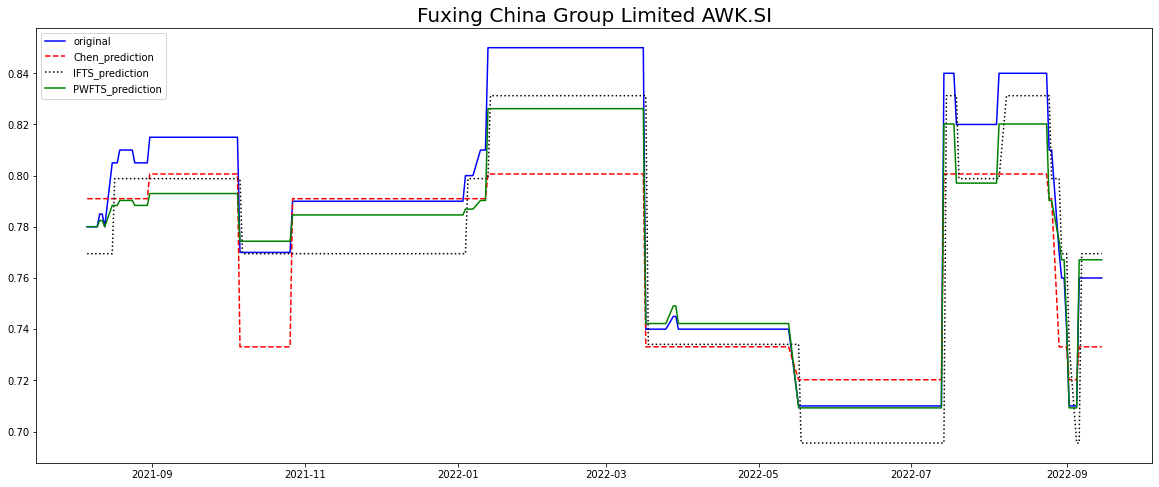

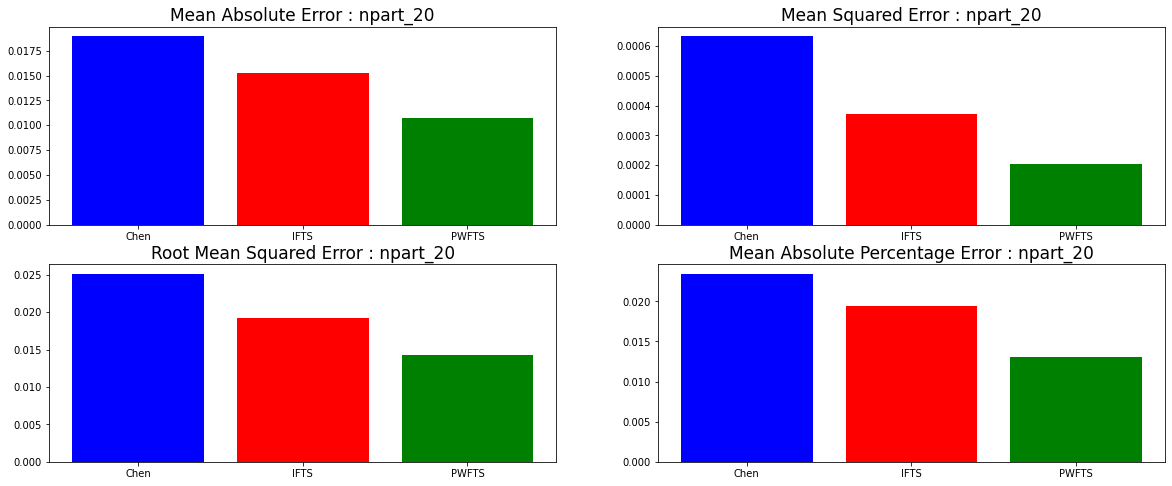

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[3]["Date"], d[3])
plt.title(data_names[3], fontsize=17);
fs_3 = Grid.GridPartitioner(data=train[3], npart=20)
print(fs_3)
model_chen_3 = chen.ConventionalFTS(partitioner=fs_3)
model_chen_3.fit(train[3])
print(model_chen_3)
forecasts_chen_3 = model_chen_3.predict(test[3])
forecasts_chen_3 = np.array(forecasts_chen_3).reshape(-1,1)
forecasts_chen_3 = forecast_extender(forecasts_chen_3,data_len - len(forecasts_chen_3))
y_metrics_3 = []
plot_fig(d[3], forecasts_chen_3, 'Chen :'+data_names[3], y_metrics_3)
model_ifts_3 = ifts.IntervalFTS(partitioner=fs_3)
model_ifts_3.fit(np.array(train[3]).reshape(-1))
forecasts_ifts_3 = model_ifts_3.predict(np.array(test[3]).reshape(-1))
forecasts_ifts_3 = np.array(forecasts_ifts_3).reshape(-1,1)
forecasts_ifts_3 = forecast_extender(forecasts_ifts_3, data_len-len(forecasts_ifts_3))
plot_fig(d[3], forecasts_ifts_3, 'IFTS :'+ data_names[3], y_metrics_3)
model_pwfts_3 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_3)
model_pwfts_3.fit(np.array(train[3]).reshape(-2))
forecasts_pwfts_3 = model_pwfts_3.predict(np.array(test[3]).reshape(-1))
forecasts_pwfts_3 = np.array(forecasts_pwfts_3).reshape(-1,1)
forecasts_pwfts_3 = forecast_extender(forecasts_pwfts_3, data_len-len(forecasts_pwfts_3))
plot_fig(d[3], forecasts_pwfts_3, 'PWFTS :'+ data_names[3], y_metrics_3)
plot_all(data, forecasts_chen_3, forecasts_ifts_3, forecasts_pwfts_3, 3, 280)
plot_metrics(y_metrics_3, y_metrics_names, 20)

## 40

Grid:
A0: trimf([0.38570000000000004, 0.405, 0.4243])
A1: trimf([0.405, 0.4243, 0.4436])
A2: trimf([0.4243, 0.4436, 0.4629])
A3: trimf([0.4436, 0.4629, 0.48219999999999996])
A4: trimf([0.4629, 0.48219999999999996, 0.5015])
A5: trimf([0.48219999999999996, 0.5015, 0.5207999999999999])
A6: trimf([0.5015, 0.5207999999999999, 0.5400999999999999])
A7: trimf([0.5207999999999999, 0.5400999999999999, 0.5593999999999999])
A8: trimf([0.5400999999999999, 0.5593999999999999, 0.5786999999999999])
A9: trimf([0.5593999999999999, 0.5786999999999999, 0.5979999999999999])
A10: trimf([0.5786999999999999, 0.5979999999999999, 0.6172999999999998])
A11: trimf([0.5979999999999999, 0.6172999999999998, 0.6365999999999998])
A12: trimf([0.6172999999999998, 0.6365999999999998, 0.6558999999999998])
A13: trimf([0.6365999999999998, 0.6558999999999998, 0.6751999999999998])
A14: trimf([0.6558999999999998, 0.6751999999999998, 0.6944999999999998])
A15: trimf([0.6751999999999998, 0.6944999999999998, 0.7137999999999998])
A1

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


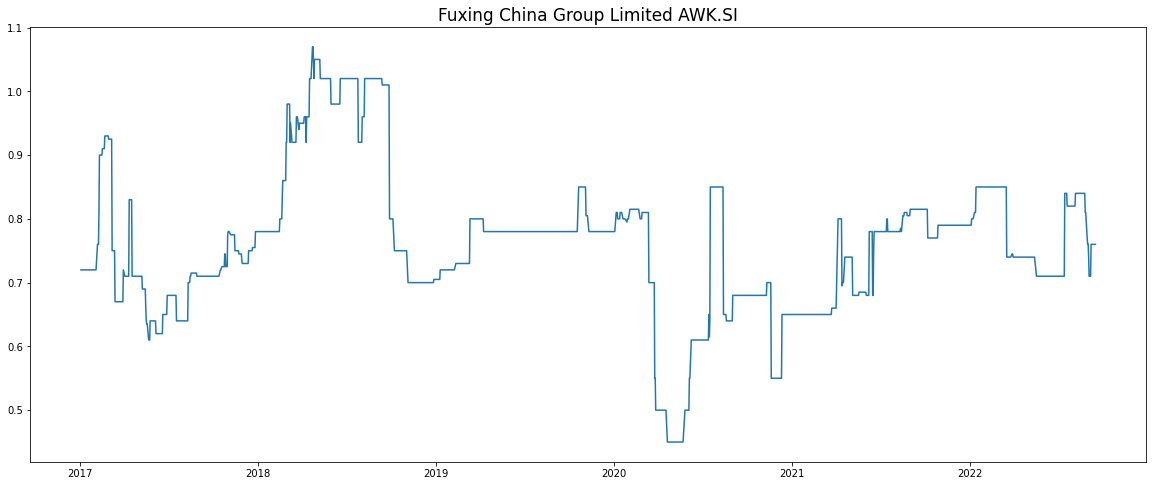

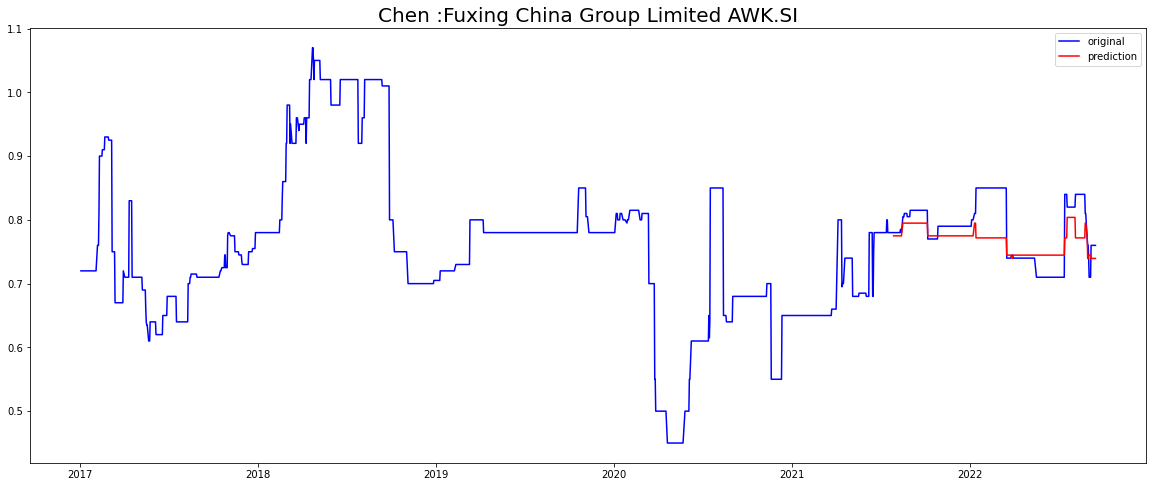

Mean Absolute Error : 0.028776980255516952
Mean Squared Error : 0.0014845355200929244
Root Mean Squared Error : 0.03852967064604789
Mean Absolute Percentage Error : 0.03580563346589454


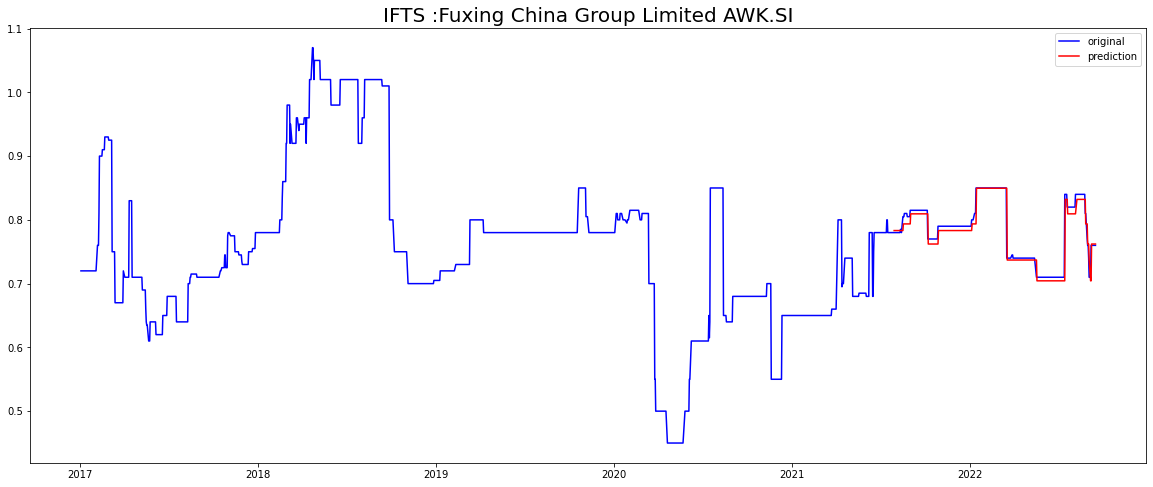

Mean Absolute Error : 0.007329121730846455
Mean Squared Error : 0.00019321959967953656
Root Mean Squared Error : 0.013900345307924424
Mean Absolute Percentage Error : 0.009363824698615282


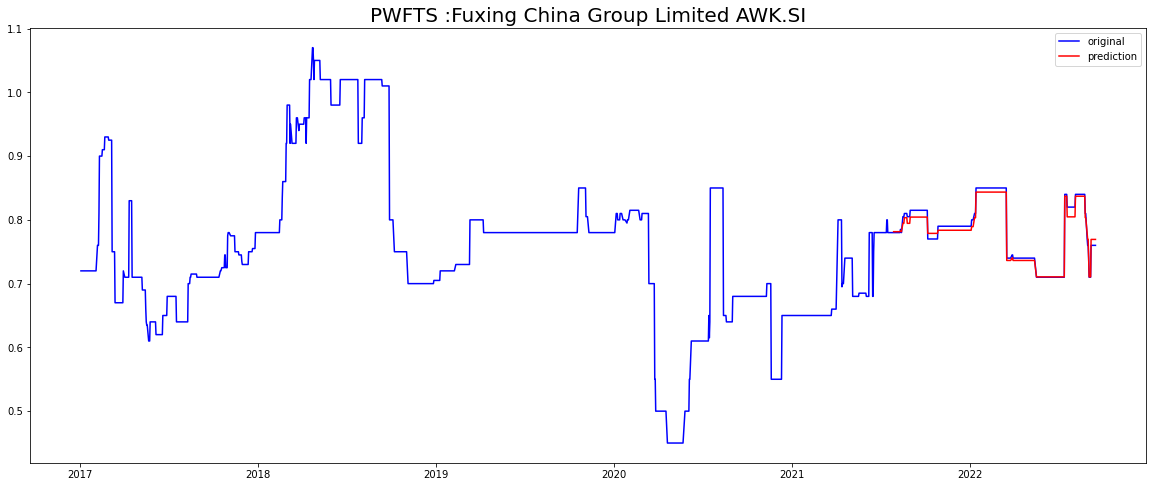

Mean Absolute Error : 0.005944412660948682
Mean Squared Error : 4.932946753296963e-05
Root Mean Squared Error : 0.007023493969027782
Mean Absolute Percentage Error : 0.007431105012955285


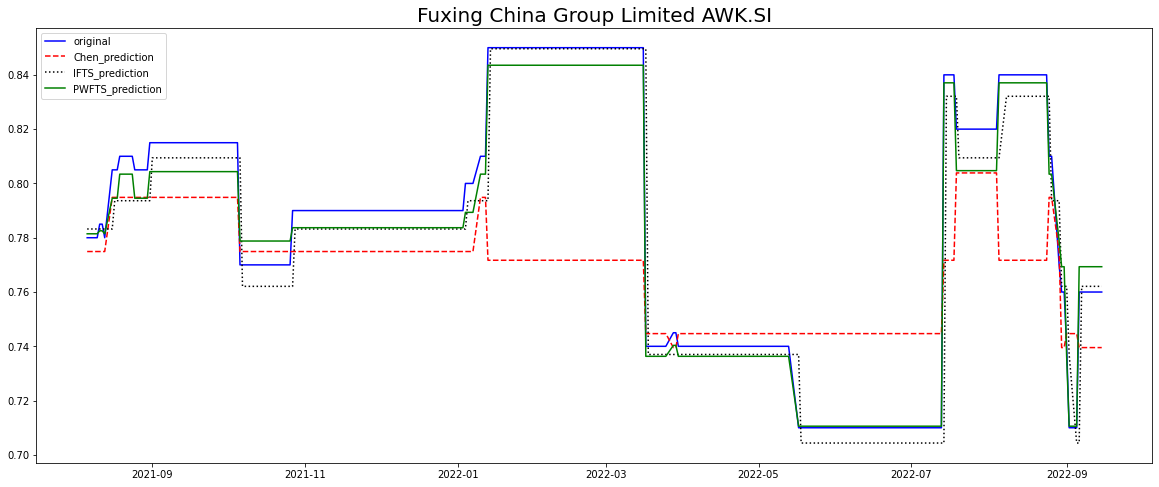

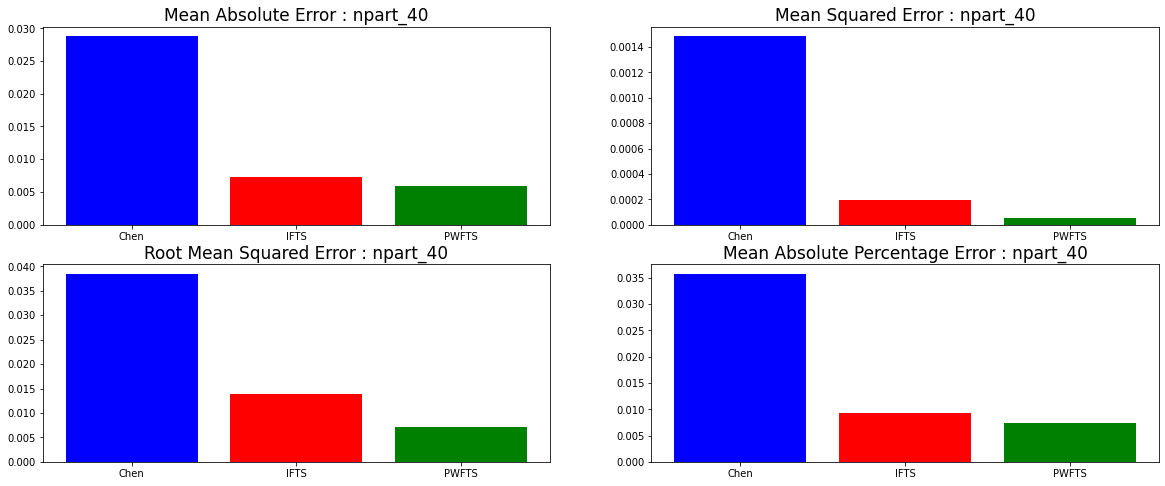

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[3]["Date"], d[3])
plt.title(data_names[3], fontsize=17);
fs_3 = Grid.GridPartitioner(data=train[3], npart=40)
print(fs_3)
model_chen_3 = chen.ConventionalFTS(partitioner=fs_3)
model_chen_3.fit(train[3])
print(model_chen_3)
forecasts_chen_3 = model_chen_3.predict(test[3])
forecasts_chen_3 = np.array(forecasts_chen_3).reshape(-1,1)
forecasts_chen_3 = forecast_extender(forecasts_chen_3,data_len - len(forecasts_chen_3))
y_metrics_340 = []
plot_fig(d[3], forecasts_chen_3, 'Chen :'+data_names[3], y_metrics_340)
model_ifts_3 = ifts.IntervalFTS(partitioner=fs_3)
model_ifts_3.fit(np.array(train[3]).reshape(-1))
forecasts_ifts_3 = model_ifts_3.predict(np.array(test[3]).reshape(-1))
forecasts_ifts_3 = np.array(forecasts_ifts_3).reshape(-1,1)
forecasts_ifts_3 = forecast_extender(forecasts_ifts_3, data_len-len(forecasts_ifts_3))
plot_fig(d[3], forecasts_ifts_3, 'IFTS :'+ data_names[3], y_metrics_340)
model_pwfts_3 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_3)
model_pwfts_3.fit(np.array(train[3]).reshape(-2))
forecasts_pwfts_3 = model_pwfts_3.predict(np.array(test[3]).reshape(-1))
forecasts_pwfts_3 = np.array(forecasts_pwfts_3).reshape(-1,1)
forecasts_pwfts_3 = forecast_extender(forecasts_pwfts_3, data_len-len(forecasts_pwfts_3))
plot_fig(d[3], forecasts_pwfts_3, 'PWFTS :'+ data_names[3], y_metrics_340)
plot_all(data, forecasts_chen_3, forecasts_ifts_3, forecasts_pwfts_3, 3, 280)
plot_metrics(y_metrics_340, y_metrics_names, 40)

## 60

Grid:
A0: trimf([0.39213333333333333, 0.405, 0.4178666666666667])
A1: trimf([0.405, 0.4178666666666667, 0.4307333333333334])
A2: trimf([0.4178666666666667, 0.4307333333333334, 0.4436000000000001])
A3: trimf([0.4307333333333334, 0.4436000000000001, 0.4564666666666668])
A4: trimf([0.4436000000000001, 0.4564666666666668, 0.4693333333333335])
A5: trimf([0.4564666666666668, 0.4693333333333335, 0.4822000000000002])
A6: trimf([0.4693333333333335, 0.4822000000000002, 0.4950666666666669])
A7: trimf([0.4822000000000002, 0.4950666666666669, 0.5079333333333336])
A8: trimf([0.4950666666666669, 0.5079333333333336, 0.5208000000000003])
A9: trimf([0.5079333333333336, 0.5208000000000003, 0.533666666666667])
A10: trimf([0.5208000000000003, 0.533666666666667, 0.5465333333333336])
A11: trimf([0.533666666666667, 0.5465333333333336, 0.5594000000000003])
A12: trimf([0.5465333333333336, 0.5594000000000003, 0.572266666666667])
A13: trimf([0.5594000000000003, 0.572266666666667, 0.5851333333333337])
A14: trimf([

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


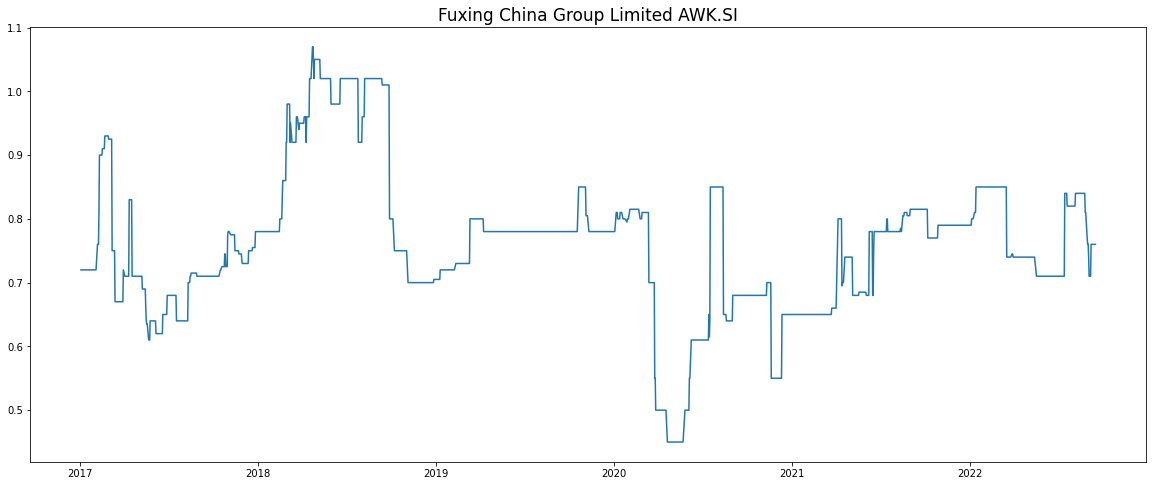

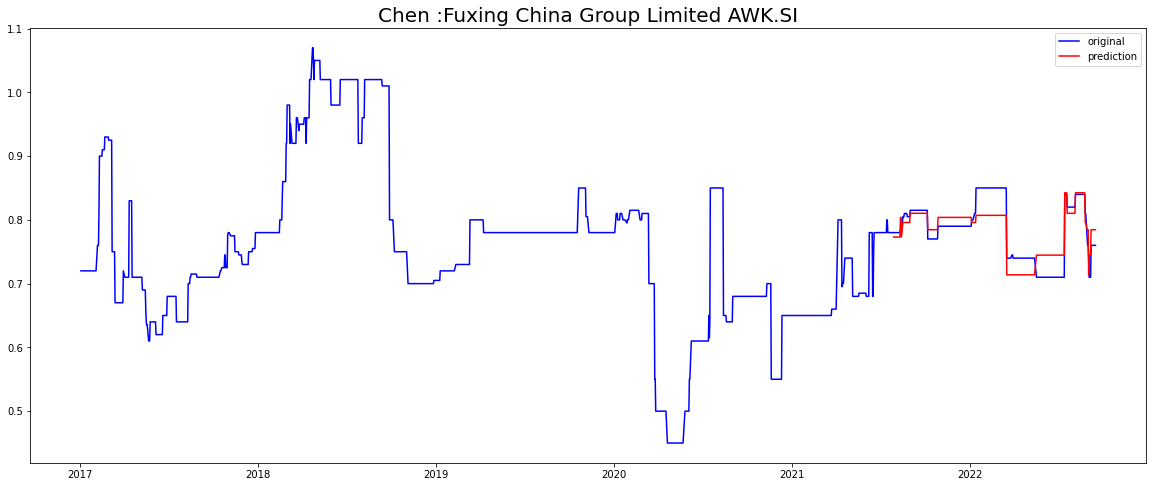

Mean Absolute Error : 0.021404610917537724
Mean Squared Error : 0.0006382327467286075
Root Mean Squared Error : 0.025263268726129
Mean Absolute Percentage Error : 0.02758148028137755


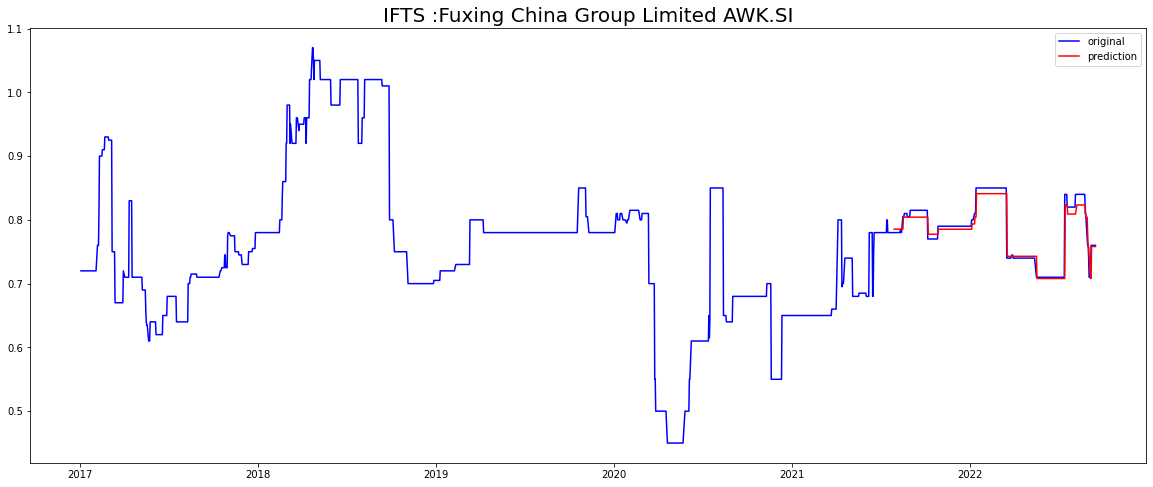

Mean Absolute Error : 0.007939377346245497
Mean Squared Error : 0.00018994182031301554
Root Mean Squared Error : 0.013781938191452446
Mean Absolute Percentage Error : 0.009920929235037162


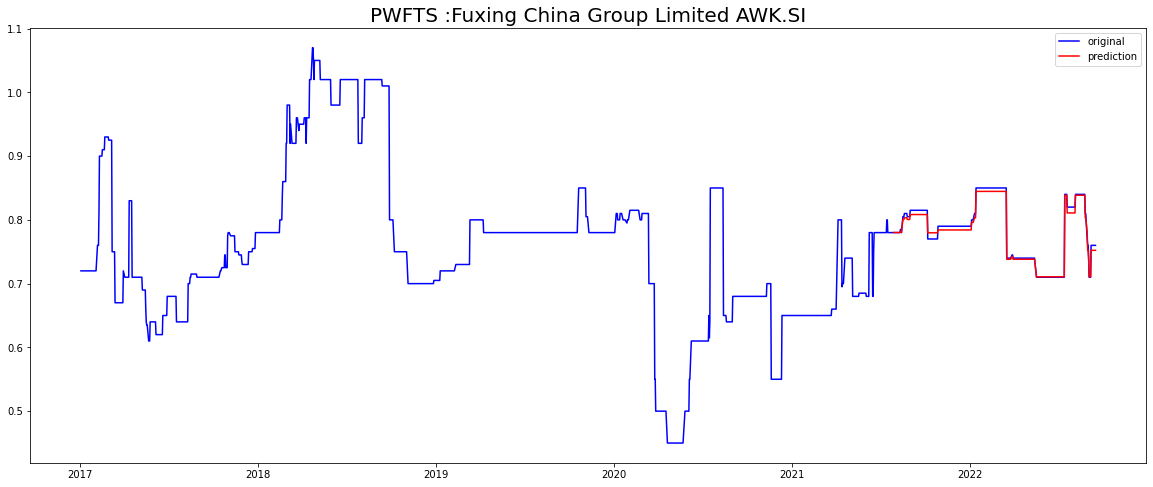

Mean Absolute Error : 0.004447326036827895
Mean Squared Error : 2.8064864505367606e-05
Root Mean Squared Error : 0.005297628196218342
Mean Absolute Percentage Error : 0.005566070877201662


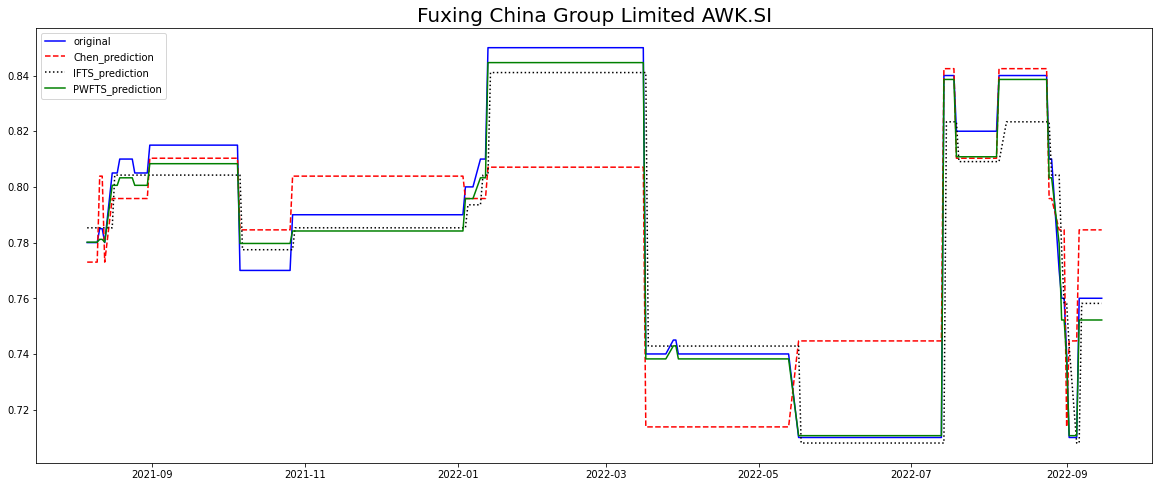

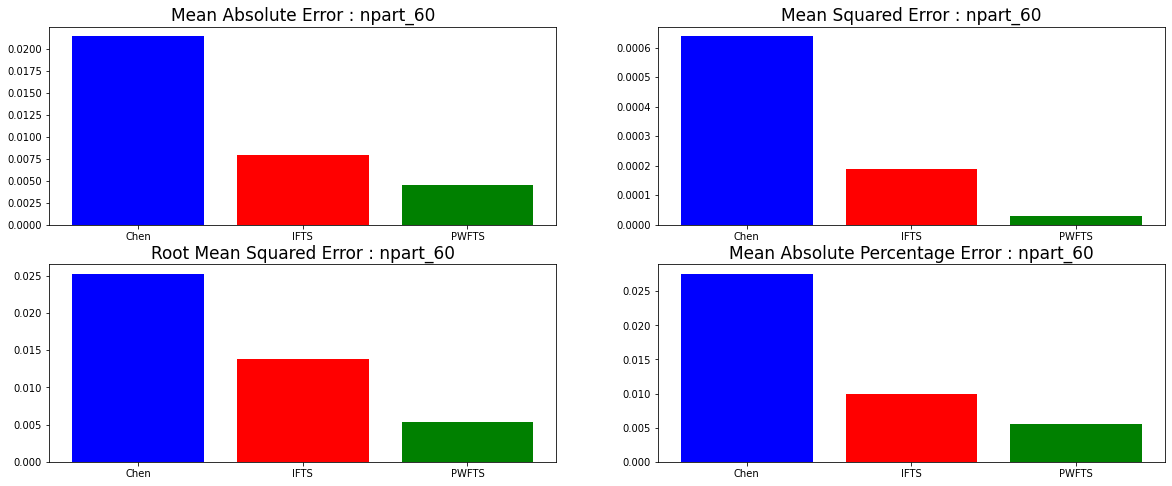

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[3]["Date"], d[3])
plt.title(data_names[3], fontsize=17);
fs_3 = Grid.GridPartitioner(data=train[3], npart=60)
print(fs_3)
model_chen_3 = chen.ConventionalFTS(partitioner=fs_3)
model_chen_3.fit(train[3])
print(model_chen_3)
forecasts_chen_3 = model_chen_3.predict(test[3])
forecasts_chen_3 = np.array(forecasts_chen_3).reshape(-1,1)
forecasts_chen_3 = forecast_extender(forecasts_chen_3,data_len - len(forecasts_chen_3))
y_metrics_360 = []
plot_fig(d[3], forecasts_chen_3, 'Chen :'+data_names[3], y_metrics_360)
model_ifts_3 = ifts.IntervalFTS(partitioner=fs_3)
model_ifts_3.fit(np.array(train[3]).reshape(-1))
forecasts_ifts_3 = model_ifts_3.predict(np.array(test[3]).reshape(-1))
forecasts_ifts_3 = np.array(forecasts_ifts_3).reshape(-1,1)
forecasts_ifts_3 = forecast_extender(forecasts_ifts_3, data_len-len(forecasts_ifts_3))
plot_fig(d[3], forecasts_ifts_3, 'IFTS :'+ data_names[3], y_metrics_360)
model_pwfts_3 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_3)
model_pwfts_3.fit(np.array(train[3]).reshape(-2))
forecasts_pwfts_3 = model_pwfts_3.predict(np.array(test[3]).reshape(-1))
forecasts_pwfts_3 = np.array(forecasts_pwfts_3).reshape(-1,1)
forecasts_pwfts_3 = forecast_extender(forecasts_pwfts_3, data_len-len(forecasts_pwfts_3))
plot_fig(d[3], forecasts_pwfts_3, 'PWFTS :'+ data_names[3], y_metrics_360)
plot_all(data, forecasts_chen_3, forecasts_ifts_3, forecasts_pwfts_3, 3, 280)
plot_metrics(y_metrics_360, y_metrics_names, 60)

## 80

Grid:
A0: trimf([0.39535000000000003, 0.405, 0.41465])
A1: trimf([0.405, 0.41465, 0.4243])
A2: trimf([0.41465, 0.4243, 0.43395])
A3: trimf([0.4243, 0.43395, 0.4436])
A4: trimf([0.43395, 0.4436, 0.45325])
A5: trimf([0.4436, 0.45325, 0.4629])
A6: trimf([0.45325, 0.4629, 0.47254999999999997])
A7: trimf([0.4629, 0.47254999999999997, 0.48219999999999996])
A8: trimf([0.47254999999999997, 0.48219999999999996, 0.49184999999999995])
A9: trimf([0.48219999999999996, 0.49184999999999995, 0.5015])
A10: trimf([0.49184999999999995, 0.5015, 0.51115])
A11: trimf([0.5015, 0.51115, 0.5208])
A12: trimf([0.5111499999999999, 0.5207999999999999, 0.53045])
A13: trimf([0.5207999999999998, 0.5304499999999999, 0.5400999999999999])
A14: trimf([0.5304499999999999, 0.5400999999999999, 0.54975])
A15: trimf([0.5400999999999999, 0.54975, 0.5594])
A16: trimf([0.5497499999999998, 0.5593999999999999, 0.56905])
A17: trimf([0.5593999999999998, 0.5690499999999998, 0.5786999999999999])
A18: trimf([0.5690499999999998, 0.57869

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


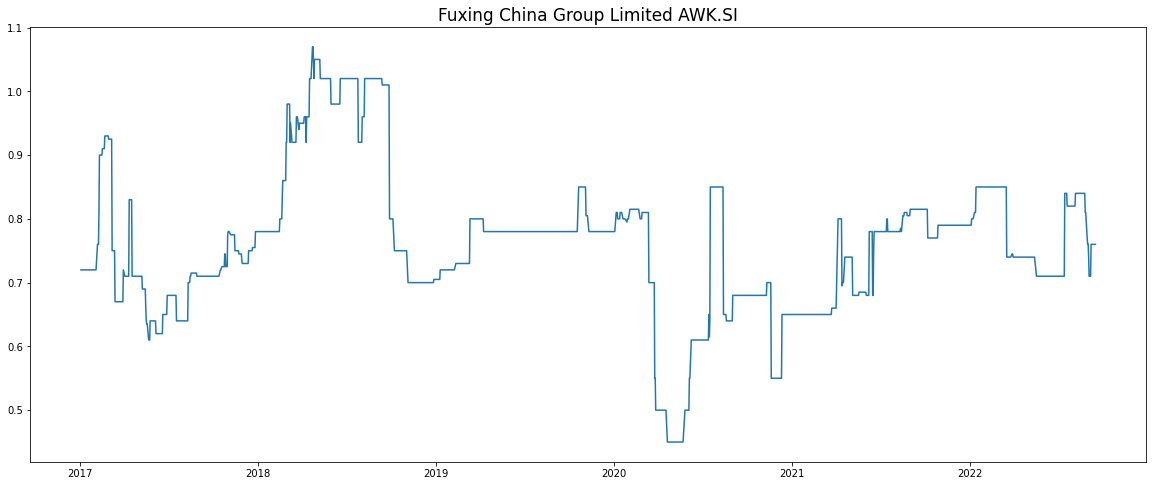

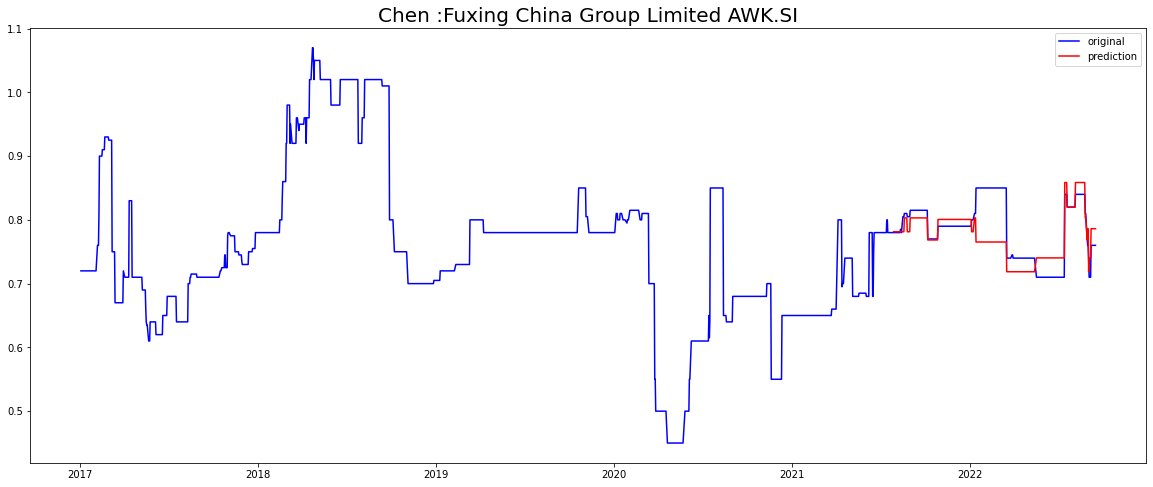

Mean Absolute Error : 0.02627691637630661
Mean Squared Error : 0.0013741645986982238
Root Mean Squared Error : 0.03706972617511794
Mean Absolute Percentage Error : 0.03293676066570513


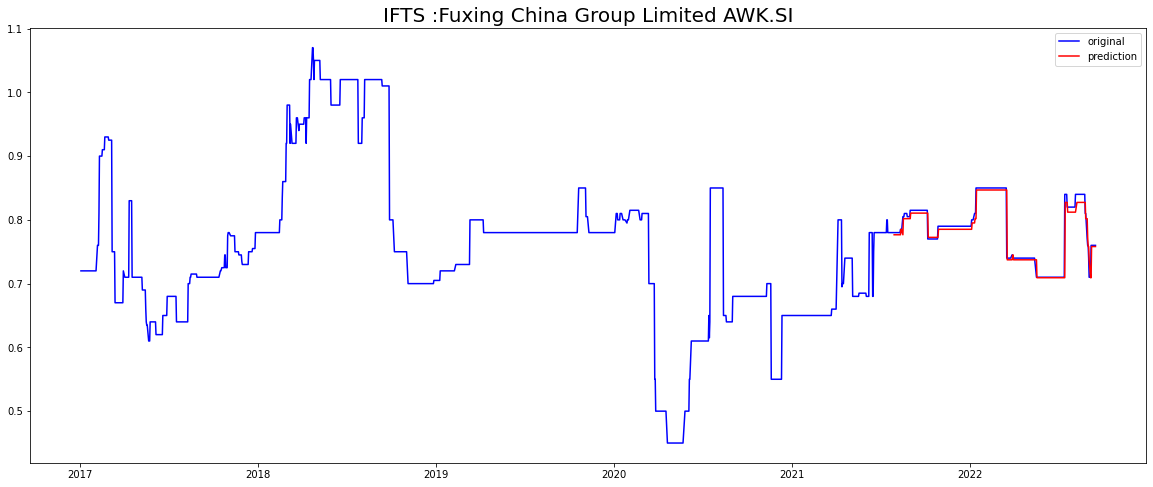

Mean Absolute Error : 0.005932032529168363
Mean Squared Error : 0.00016484453663707046
Root Mean Squared Error : 0.012839179749387048
Mean Absolute Percentage Error : 0.007454777655623623


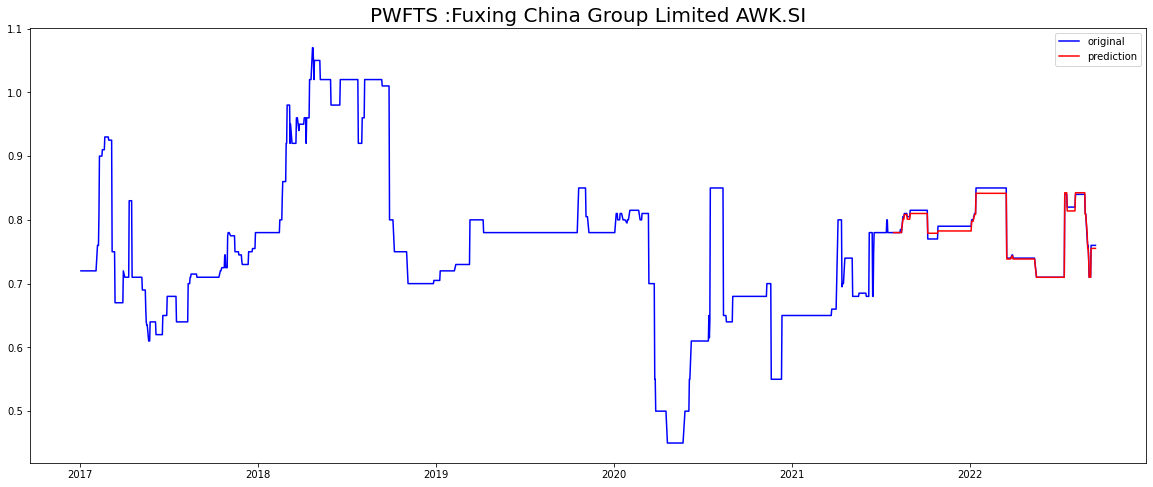

Mean Absolute Error : 0.004457913160536849
Mean Squared Error : 3.0302245687304843e-05
Root Mean Squared Error : 0.005504747558908114
Mean Absolute Percentage Error : 0.005528829371844336


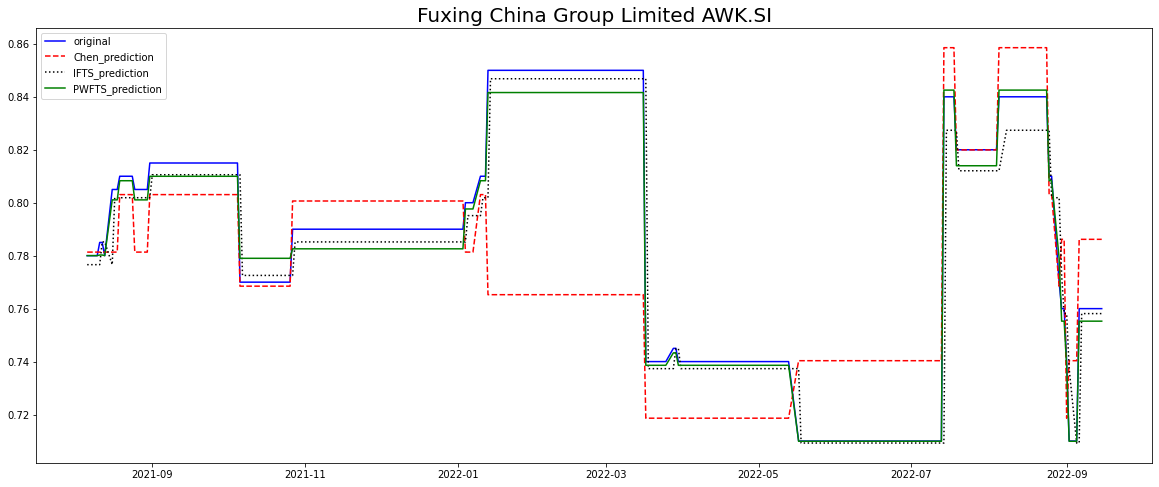

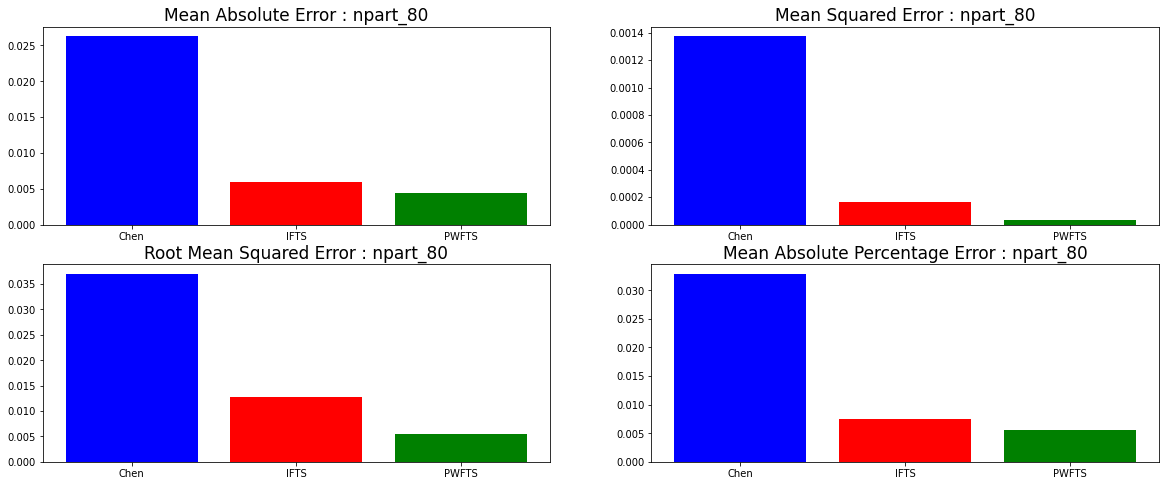

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[3]["Date"], d[3])
plt.title(data_names[3], fontsize=17);
fs_3 = Grid.GridPartitioner(data=train[3], npart=80)
print(fs_3)
model_chen_3 = chen.ConventionalFTS(partitioner=fs_3)
model_chen_3.fit(train[3])
print(model_chen_3)
forecasts_chen_3 = model_chen_3.predict(test[3])
forecasts_chen_3 = np.array(forecasts_chen_3).reshape(-1,1)
forecasts_chen_3 = forecast_extender(forecasts_chen_3,data_len - len(forecasts_chen_3))
y_metrics_380 = []
plot_fig(d[3], forecasts_chen_3, 'Chen :'+data_names[3], y_metrics_380)
model_ifts_3 = ifts.IntervalFTS(partitioner=fs_3)
model_ifts_3.fit(np.array(train[3]).reshape(-1))
forecasts_ifts_3 = model_ifts_3.predict(np.array(test[3]).reshape(-1))
forecasts_ifts_3 = np.array(forecasts_ifts_3).reshape(-1,1)
forecasts_ifts_3 = forecast_extender(forecasts_ifts_3, data_len-len(forecasts_ifts_3))
plot_fig(d[3], forecasts_ifts_3, 'IFTS :'+ data_names[3], y_metrics_380)
model_pwfts_3 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_3)
model_pwfts_3.fit(np.array(train[3]).reshape(-2))
forecasts_pwfts_3 = model_pwfts_3.predict(np.array(test[3]).reshape(-1))
forecasts_pwfts_3 = np.array(forecasts_pwfts_3).reshape(-1,1)
forecasts_pwfts_3 = forecast_extender(forecasts_pwfts_3, data_len-len(forecasts_pwfts_3))
plot_fig(d[3], forecasts_pwfts_3, 'PWFTS :'+ data_names[3], y_metrics_380)
plot_all(data, forecasts_chen_3, forecasts_ifts_3, forecasts_pwfts_3, 3, 280)
plot_metrics(y_metrics_380, y_metrics_names, 80)

# 5

## 20

Grid:
A0: trimf([-0.03902505500000002, 0.0171, 0.07322505500000001])
A1: trimf([0.017099999999999997, 0.07322505500000001, 0.12935011000000002])
A2: trimf([0.07322505500000001, 0.12935011000000002, 0.18547516500000003])
A3: trimf([0.12935011000000002, 0.18547516500000003, 0.24160022000000003])
A4: trimf([0.18547516500000003, 0.24160022000000003, 0.29772527500000007])
A5: trimf([0.24160022, 0.297725275, 0.35385033000000005])
A6: trimf([0.297725275, 0.35385033000000005, 0.4099753850000001])
A7: trimf([0.35385033000000005, 0.4099753850000001, 0.4661004400000001])
A8: trimf([0.409975385, 0.46610044000000006, 0.522225495])
A9: trimf([0.46610044, 0.522225495, 0.57835055])
A10: trimf([0.522225495, 0.57835055, 0.634475605])
A11: trimf([0.5783505500000001, 0.6344756050000001, 0.6906006600000001])
A12: trimf([0.6344756050000001, 0.6906006600000001, 0.7467257150000001])
A13: trimf([0.6906006600000001, 0.7467257150000001, 0.80285077])
A14: trimf([0.7467257150000002, 0.8028507700000002, 0.858975825

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


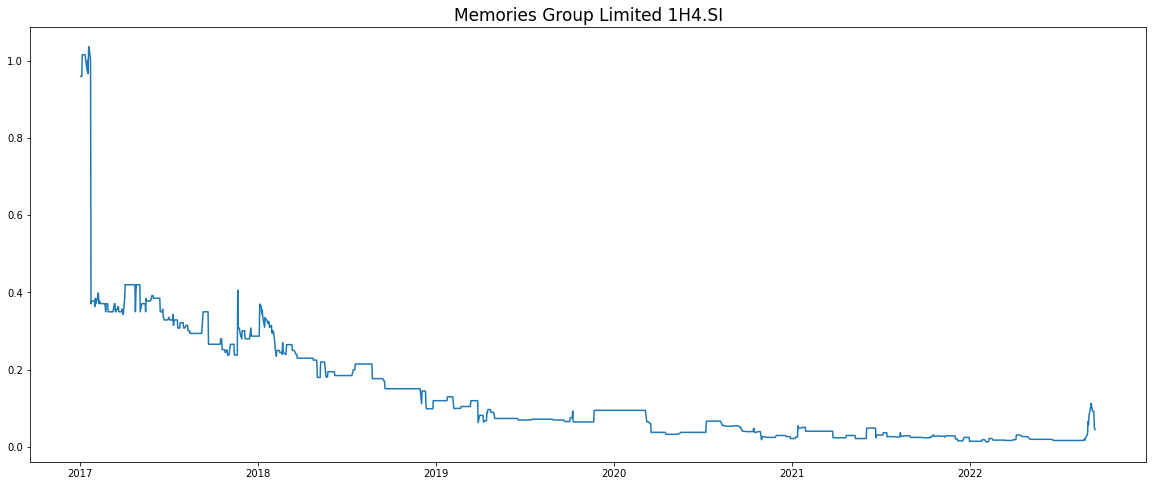

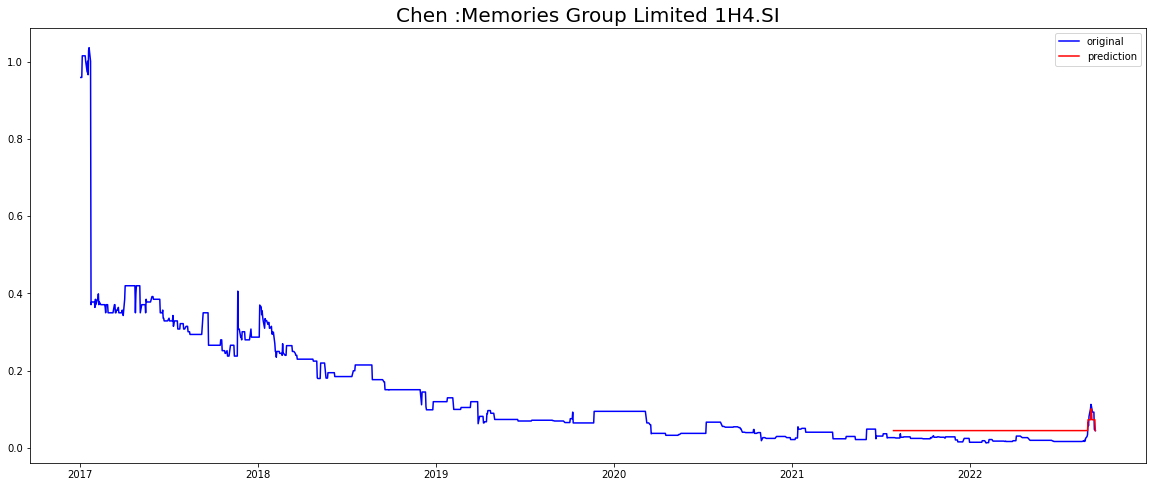

Mean Absolute Error : 0.02303155878048781
Mean Squared Error : 0.0005610370405997375
Root Mean Squared Error : 0.023686220479420886
Mean Absolute Percentage Error : 1.1437147692056124


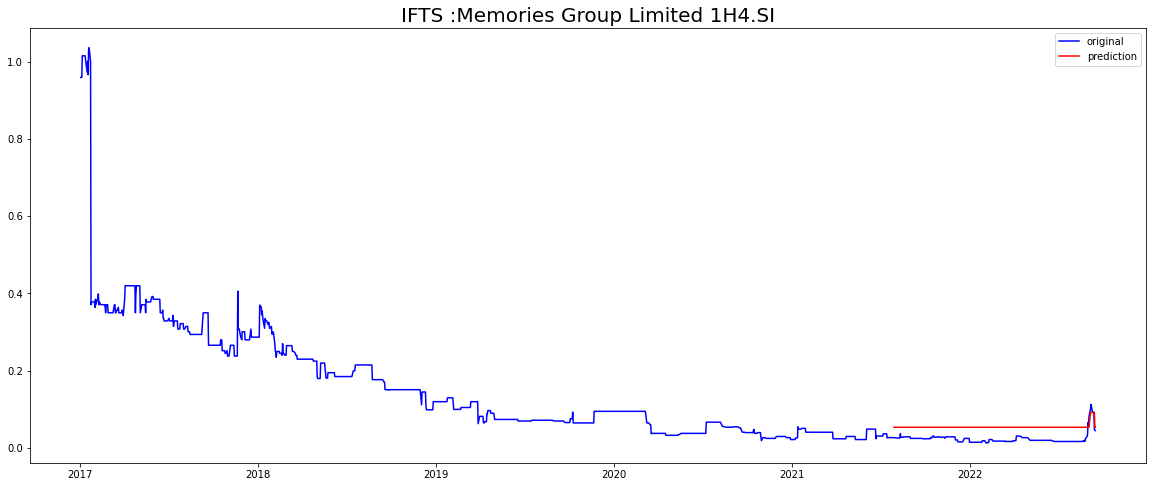

Mean Absolute Error : 0.031201895490975136
Mean Squared Error : 0.0010187681186219451
Root Mean Squared Error : 0.03191814716774683
Mean Absolute Percentage Error : 1.5447600805759492


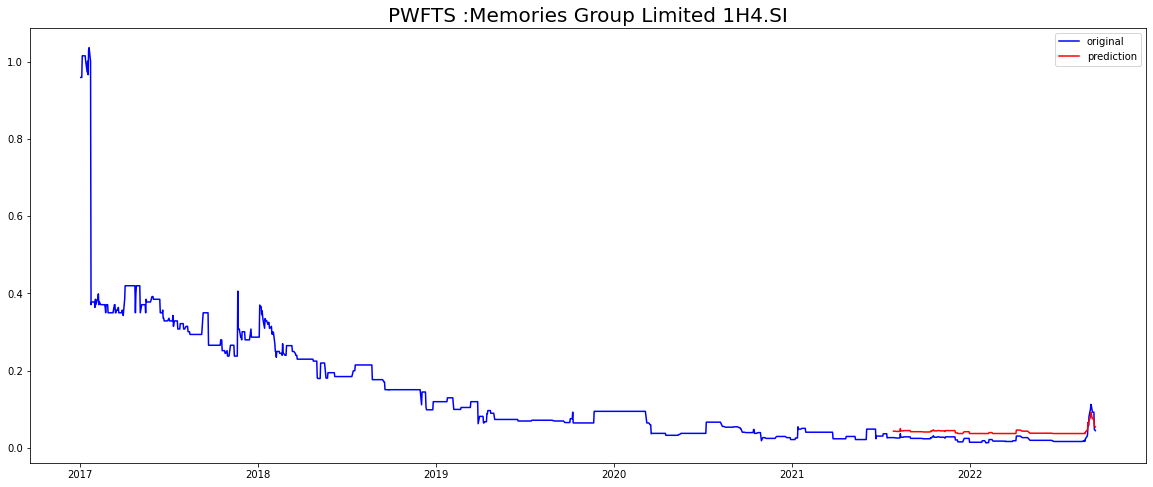

Mean Absolute Error : 0.01841599341310553
Mean Squared Error : 0.0003463949697403321
Root Mean Squared Error : 0.0186116890619936
Mean Absolute Percentage Error : 0.8923821166442255


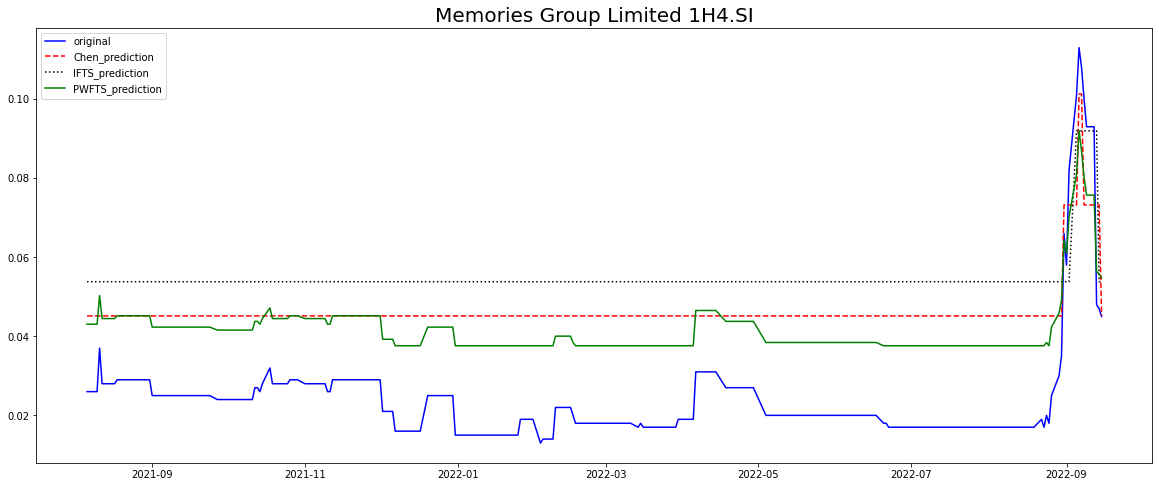

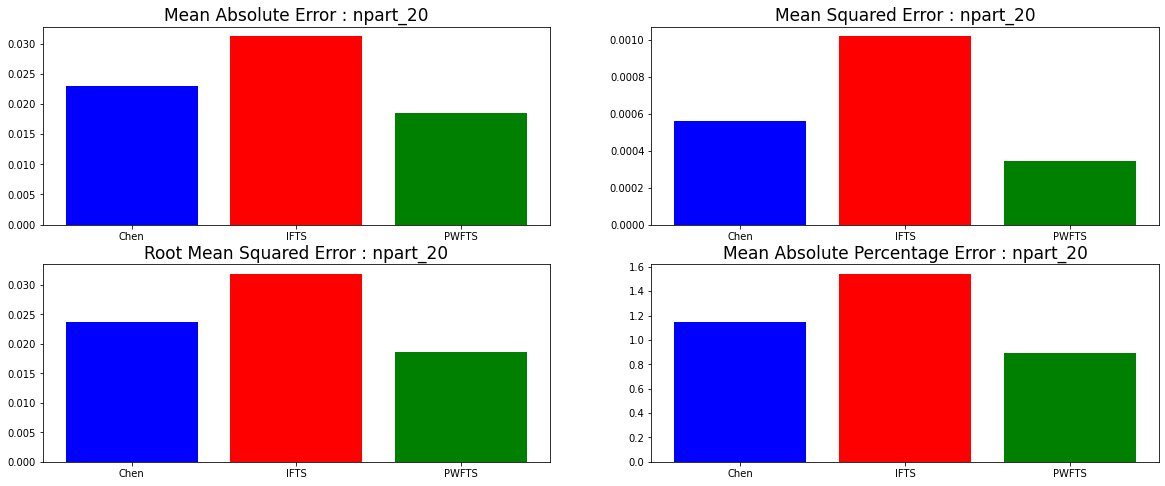

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[4]["Date"], d[4])
plt.title(data_names[4], fontsize=17);
fs_4 = Grid.GridPartitioner(data=train[4], npart=20)
print(fs_4)
model_chen_4 = chen.ConventionalFTS(partitioner=fs_4)
model_chen_4.fit(train[4])
print(model_chen_4)
forecasts_chen_4 = model_chen_4.predict(test[4])
forecasts_chen_4 = np.array(forecasts_chen_4).reshape(-1,1)
forecasts_chen_4 = forecast_extender(forecasts_chen_4,data_len - len(forecasts_chen_4))
y_metrics_4 = []
plot_fig(d[4], forecasts_chen_4, 'Chen :'+data_names[4], y_metrics_4)
model_ifts_4 = ifts.IntervalFTS(partitioner=fs_4)
model_ifts_4.fit(np.array(train[4]).reshape(-1))
forecasts_ifts_4 = model_ifts_4.predict(np.array(test[4]).reshape(-1))
forecasts_ifts_4 = np.array(forecasts_ifts_4).reshape(-1,1)
forecasts_ifts_4 = forecast_extender(forecasts_ifts_4, data_len-len(forecasts_ifts_4))
plot_fig(d[4], forecasts_ifts_4, 'IFTS :'+ data_names[4], y_metrics_4)
model_pwfts_4 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_4)
model_pwfts_4.fit(np.array(train[4]).reshape(-2))
forecasts_pwfts_4 = model_pwfts_4.predict(np.array(test[4]).reshape(-1))
forecasts_pwfts_4 = np.array(forecasts_pwfts_4).reshape(-1,1)
forecasts_pwfts_4 = forecast_extender(forecasts_pwfts_4, data_len-len(forecasts_pwfts_4))
plot_fig(d[4], forecasts_pwfts_4, 'PWFTS :'+ data_names[4], y_metrics_4)
plot_all(data, forecasts_chen_4, forecasts_ifts_4, forecasts_pwfts_4, 4, 280)
plot_metrics(y_metrics_4, y_metrics_names,20)

## 40

Grid:
A0: trimf([-0.010962527500000006, 0.0171, 0.04516252750000001])
A1: trimf([0.0171, 0.04516252750000001, 0.07322505500000001])
A2: trimf([0.04516252750000001, 0.07322505500000001, 0.10128758250000001])
A3: trimf([0.07322505500000002, 0.10128758250000003, 0.12935011000000005])
A4: trimf([0.10128758250000001, 0.12935011000000002, 0.15741263750000004])
A5: trimf([0.12935011000000002, 0.15741263750000004, 0.18547516500000005])
A6: trimf([0.15741263750000004, 0.18547516500000005, 0.21353769250000007])
A7: trimf([0.18547516500000003, 0.21353769250000004, 0.24160022000000006])
A8: trimf([0.21353769250000004, 0.24160022000000006, 0.2696627475000001])
A9: trimf([0.24160022000000006, 0.2696627475000001, 0.29772527500000007])
A10: trimf([0.2696627475000001, 0.29772527500000007, 0.32578780250000006])
A11: trimf([0.29772527500000007, 0.32578780250000006, 0.35385033000000005])
A12: trimf([0.3257878025000001, 0.3538503300000001, 0.3819128575000001])
A13: trimf([0.3538503300000001, 0.381912857500

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


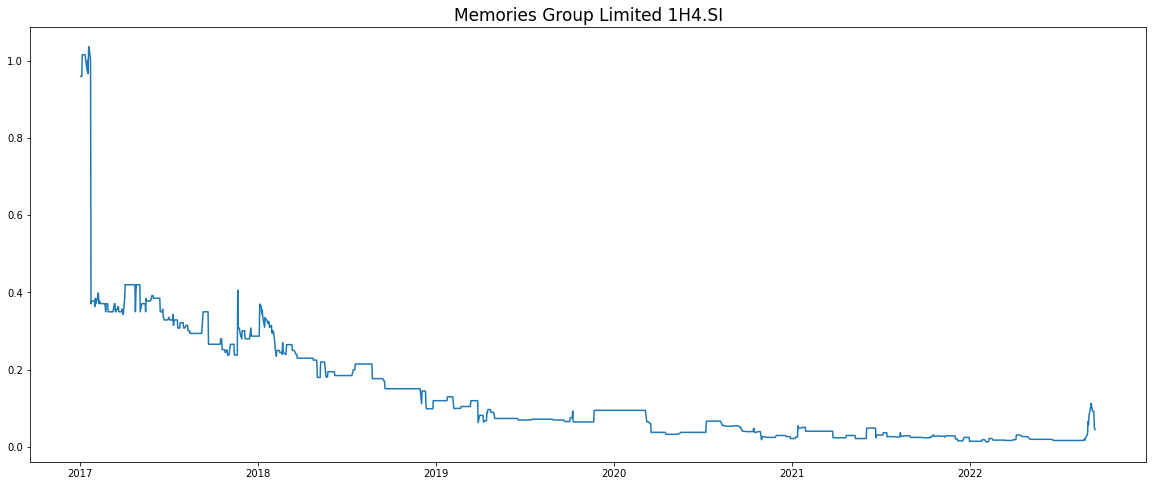

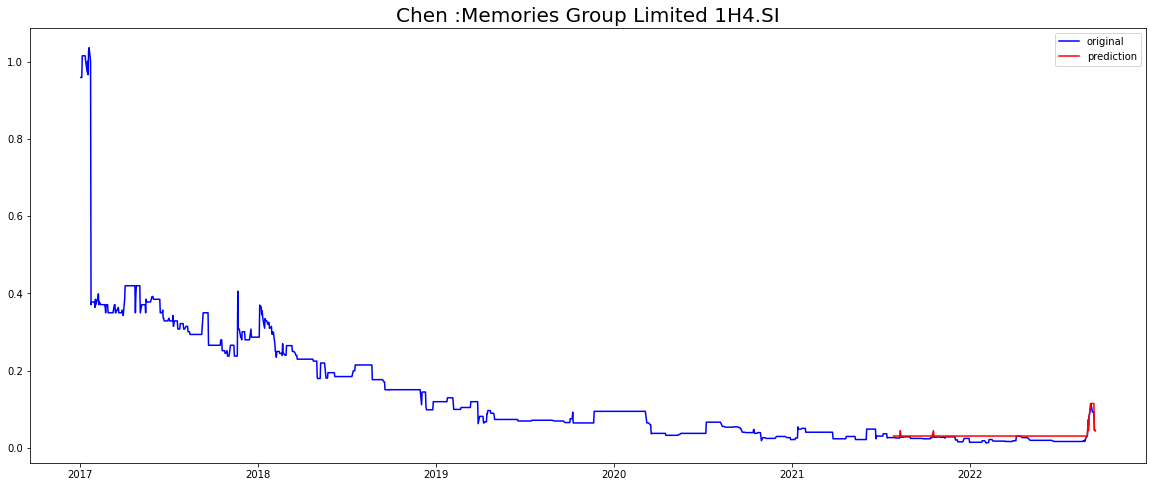

Mean Absolute Error : 0.009462645801393735
Mean Squared Error : 0.0001153367810895893
Root Mean Squared Error : 0.01073949631452003
Mean Absolute Percentage Error : 0.4933370067155747


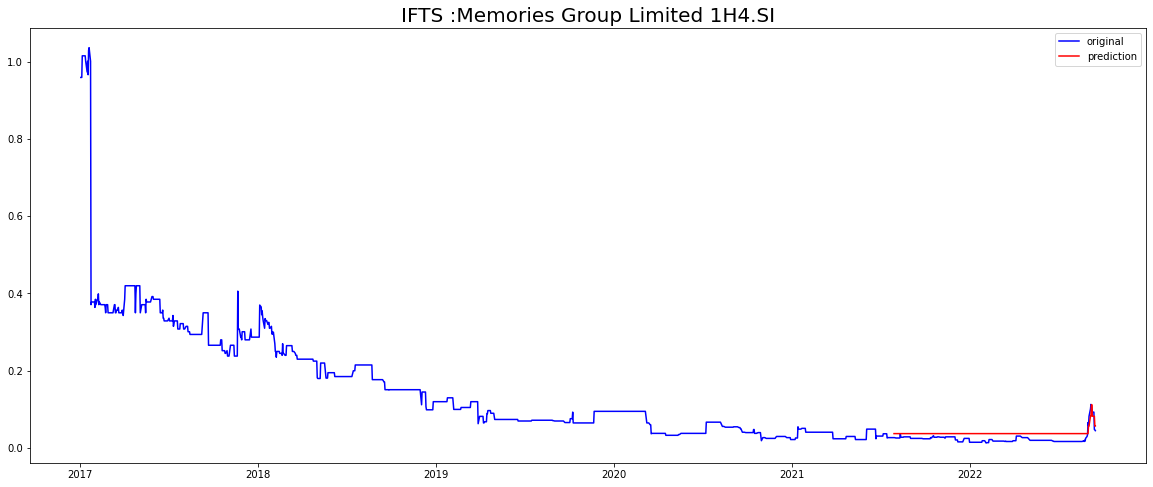

Mean Absolute Error : 0.01559951876643637
Mean Squared Error : 0.00027313848363161704
Root Mean Squared Error : 0.016526901815876353
Mean Absolute Percentage Error : 0.7848153607168074


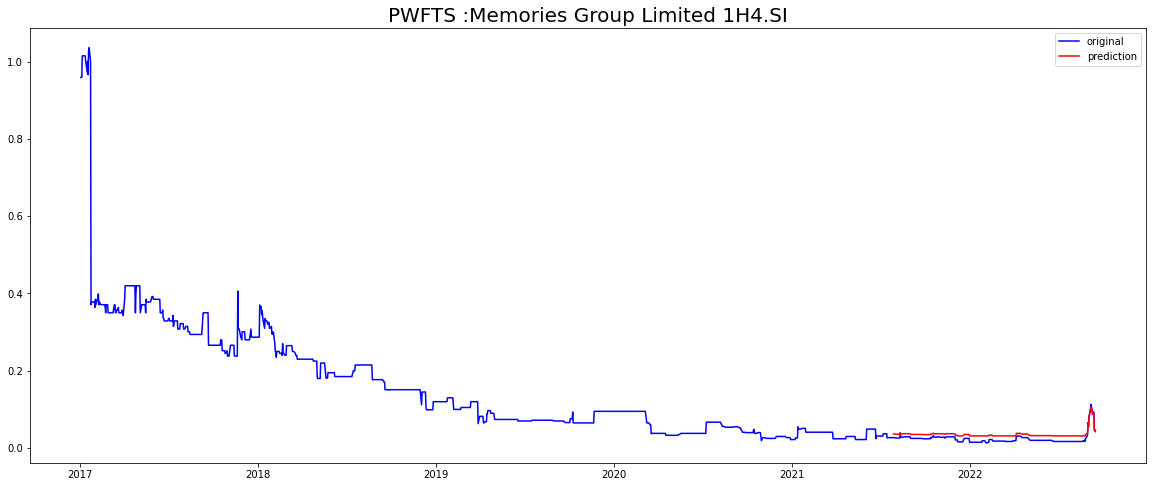

Mean Absolute Error : 0.011518213092550997
Mean Squared Error : 0.00014262764093816557
Root Mean Squared Error : 0.01194268148022736
Mean Absolute Percentage Error : 0.5802490520856534


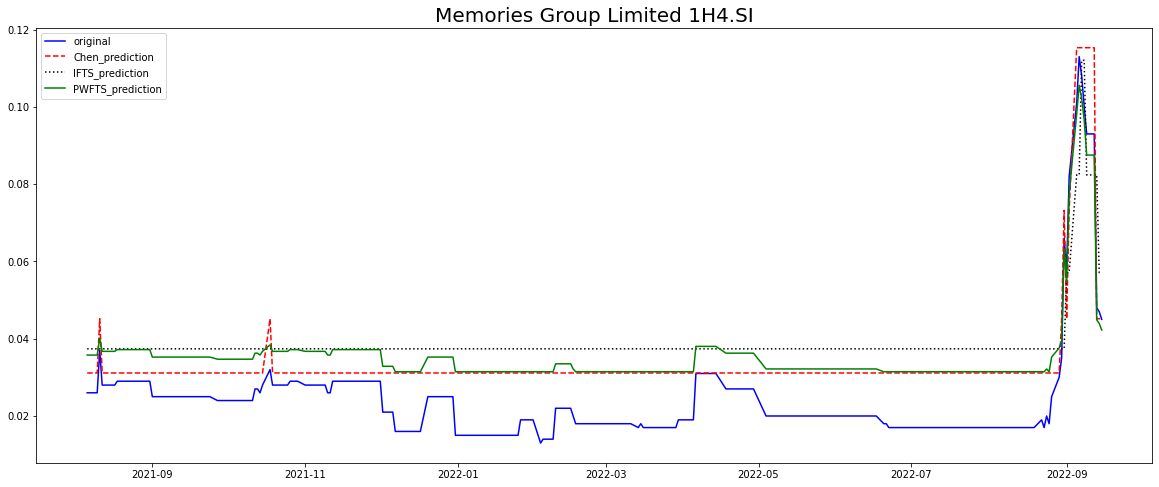

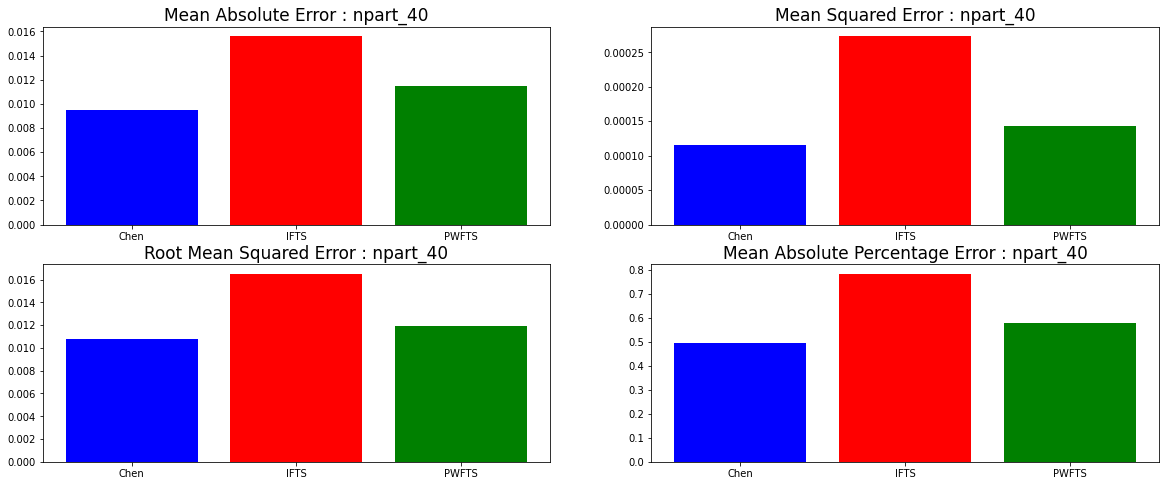

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[4]["Date"], d[4])
plt.title(data_names[4], fontsize=17);
fs_4 = Grid.GridPartitioner(data=train[4], npart=40)
print(fs_4)
model_chen_4 = chen.ConventionalFTS(partitioner=fs_4)
model_chen_4.fit(train[4])
print(model_chen_4)
forecasts_chen_4 = model_chen_4.predict(test[4])
forecasts_chen_4 = np.array(forecasts_chen_4).reshape(-1,1)
forecasts_chen_4 = forecast_extender(forecasts_chen_4,data_len - len(forecasts_chen_4))
y_metrics_440 = []
plot_fig(d[4], forecasts_chen_4, 'Chen :'+data_names[4], y_metrics_440)
model_ifts_4 = ifts.IntervalFTS(partitioner=fs_4)
model_ifts_4.fit(np.array(train[4]).reshape(-1))
forecasts_ifts_4 = model_ifts_4.predict(np.array(test[4]).reshape(-1))
forecasts_ifts_4 = np.array(forecasts_ifts_4).reshape(-1,1)
forecasts_ifts_4 = forecast_extender(forecasts_ifts_4, data_len-len(forecasts_ifts_4))
plot_fig(d[4], forecasts_ifts_4, 'IFTS :'+ data_names[4], y_metrics_440)
model_pwfts_4 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_4)
model_pwfts_4.fit(np.array(train[4]).reshape(-2))
forecasts_pwfts_4 = model_pwfts_4.predict(np.array(test[4]).reshape(-1))
forecasts_pwfts_4 = np.array(forecasts_pwfts_4).reshape(-1,1)
forecasts_pwfts_4 = forecast_extender(forecasts_pwfts_4, data_len-len(forecasts_pwfts_4))
plot_fig(d[4], forecasts_pwfts_4, 'PWFTS :'+ data_names[4], y_metrics_440)
plot_all(data, forecasts_chen_4, forecasts_ifts_4, forecasts_pwfts_4, 4, 280)
plot_metrics(y_metrics_440, y_metrics_names,40)

## 60

Grid:
A0: trimf([-0.0016083516666666707, 0.0171, 0.03580835166666667])
A1: trimf([0.017099999999999997, 0.03580835166666667, 0.05451670333333334])
A2: trimf([0.03580835166666666, 0.05451670333333333, 0.07322505500000001])
A3: trimf([0.05451670333333334, 0.07322505500000001, 0.09193340666666669])
A4: trimf([0.07322505500000001, 0.09193340666666668, 0.11064175833333334])
A5: trimf([0.09193340666666666, 0.11064175833333334, 0.12935011000000002])
A6: trimf([0.11064175833333334, 0.12935011000000002, 0.1480584616666667])
A7: trimf([0.12935011, 0.14805846166666667, 0.16676681333333335])
A8: trimf([0.14805846166666667, 0.16676681333333335, 0.18547516500000003])
A9: trimf([0.16676681333333335, 0.18547516500000003, 0.2041835166666667])
A10: trimf([0.185475165, 0.20418351666666668, 0.22289186833333335])
A11: trimf([0.20418351666666668, 0.22289186833333335, 0.24160022000000003])
A12: trimf([0.22289186833333335, 0.24160022000000003, 0.2603085716666667])
A13: trimf([0.24160021999999998, 0.2603085716

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


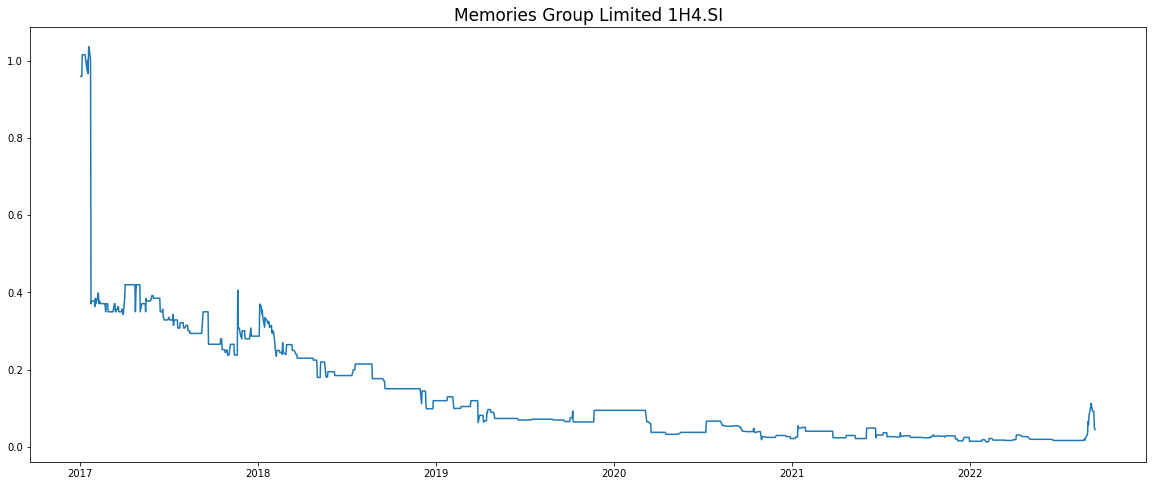

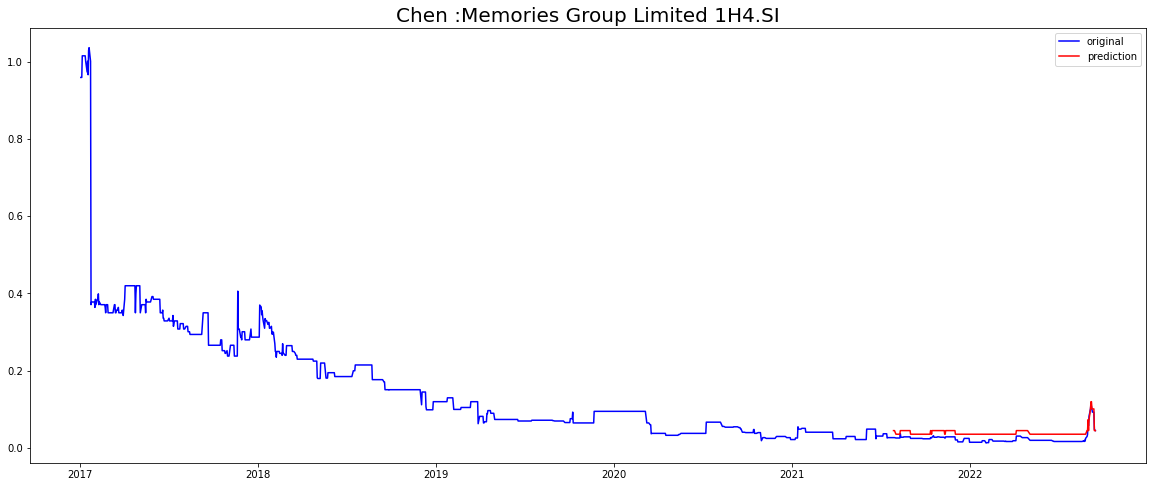

Mean Absolute Error : 0.015916049337979098
Mean Squared Error : 0.00026785589477385077
Root Mean Squared Error : 0.016366303638080615
Mean Absolute Percentage Error : 0.7835408360859237


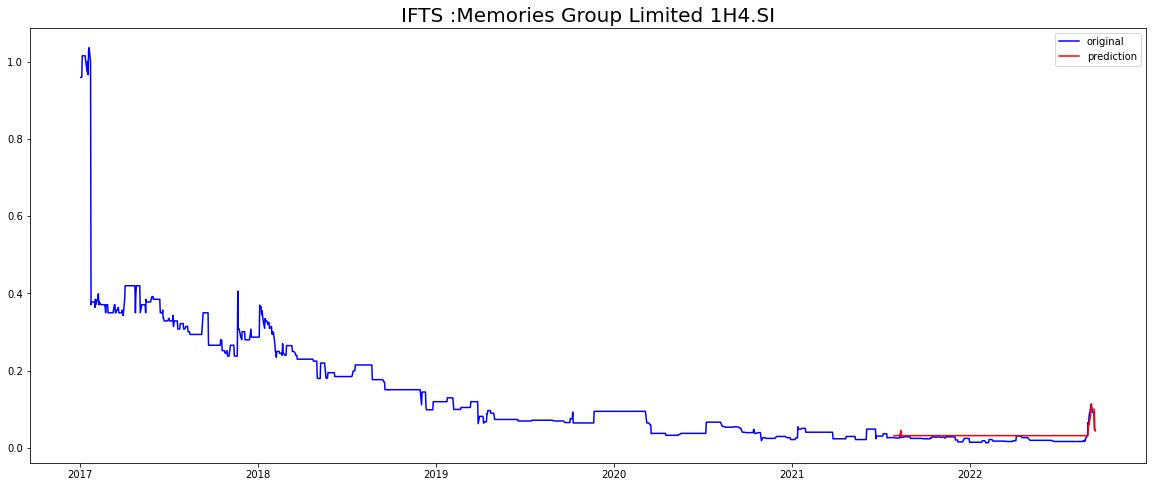

Mean Absolute Error : 0.01054290422453309
Mean Squared Error : 0.00014530296377254955
Root Mean Squared Error : 0.012054167900462874
Mean Absolute Percentage Error : 0.5427864323783759


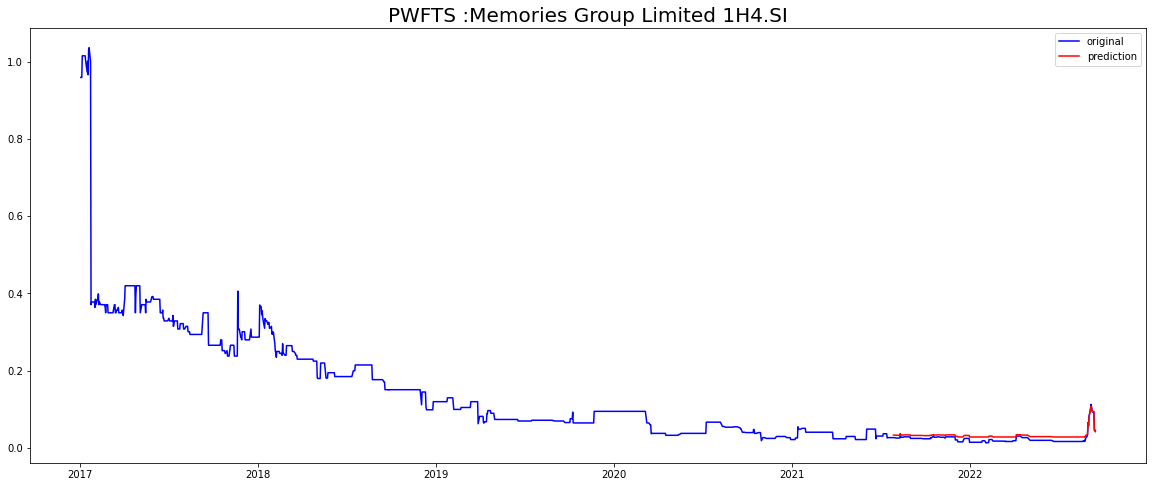

Mean Absolute Error : 0.00878148857879059
Mean Squared Error : 8.696850083821478e-05
Root Mean Squared Error : 0.00932569036791458
Mean Absolute Percentage Error : 0.45128902152981826


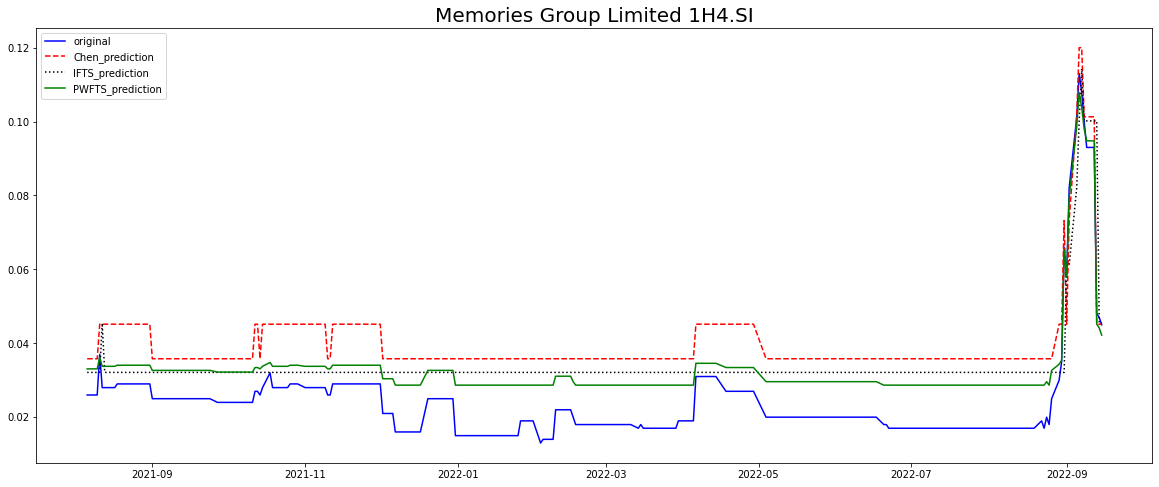

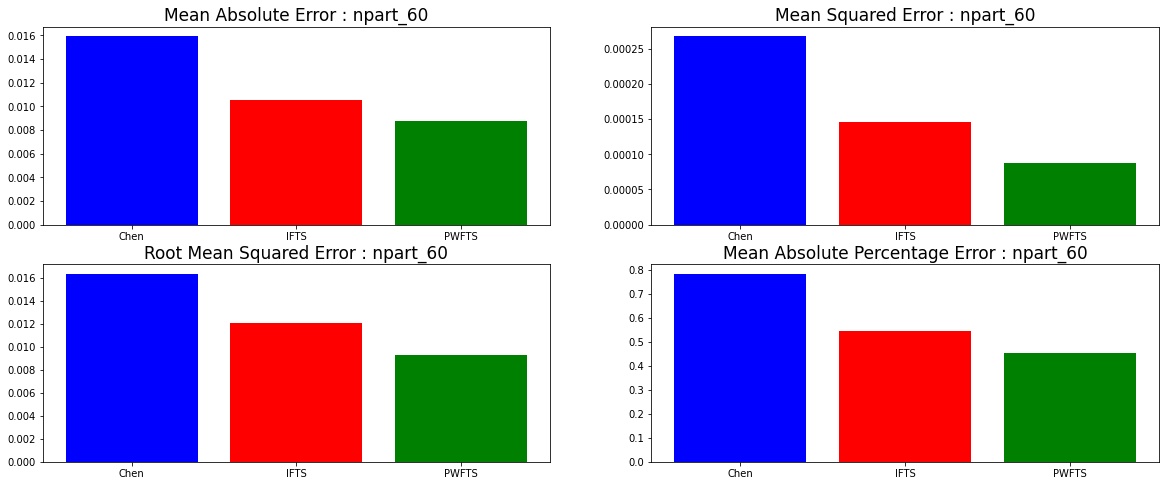

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[4]["Date"], d[4])
plt.title(data_names[4], fontsize=17);
fs_4 = Grid.GridPartitioner(data=train[4], npart=60)
print(fs_4)
model_chen_4 = chen.ConventionalFTS(partitioner=fs_4)
model_chen_4.fit(train[4])
print(model_chen_4)
forecasts_chen_4 = model_chen_4.predict(test[4])
forecasts_chen_4 = np.array(forecasts_chen_4).reshape(-1,1)
forecasts_chen_4 = forecast_extender(forecasts_chen_4,data_len - len(forecasts_chen_4))
y_metrics_460 = []
plot_fig(d[4], forecasts_chen_4, 'Chen :'+data_names[4], y_metrics_460)
model_ifts_4 = ifts.IntervalFTS(partitioner=fs_4)
model_ifts_4.fit(np.array(train[4]).reshape(-1))
forecasts_ifts_4 = model_ifts_4.predict(np.array(test[4]).reshape(-1))
forecasts_ifts_4 = np.array(forecasts_ifts_4).reshape(-1,1)
forecasts_ifts_4 = forecast_extender(forecasts_ifts_4, data_len-len(forecasts_ifts_4))
plot_fig(d[4], forecasts_ifts_4, 'IFTS :'+ data_names[4], y_metrics_460)
model_pwfts_4 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_4)
model_pwfts_4.fit(np.array(train[4]).reshape(-2))
forecasts_pwfts_4 = model_pwfts_4.predict(np.array(test[4]).reshape(-1))
forecasts_pwfts_4 = np.array(forecasts_pwfts_4).reshape(-1,1)
forecasts_pwfts_4 = forecast_extender(forecasts_pwfts_4, data_len-len(forecasts_pwfts_4))
plot_fig(d[4], forecasts_pwfts_4, 'PWFTS :'+ data_names[4], y_metrics_460)
plot_all(data, forecasts_chen_4, forecasts_ifts_4, forecasts_pwfts_4, 4, 280)
plot_metrics(y_metrics_460, y_metrics_names,60)

## 80

Grid:
A0: trimf([0.003068736249999997, 0.0171, 0.031131263750000006])
A1: trimf([0.017100000000000004, 0.031131263750000006, 0.04516252750000001])
A2: trimf([0.031131263750000006, 0.04516252750000001, 0.05919379125000001])
A3: trimf([0.045162527500000015, 0.059193791250000016, 0.07322505500000002])
A4: trimf([0.05919379125000002, 0.07322505500000002, 0.08725631875000003])
A5: trimf([0.07322505500000002, 0.08725631875000003, 0.10128758250000004])
A6: trimf([0.08725631875000002, 0.10128758250000003, 0.11531884625000004])
A7: trimf([0.10128758250000003, 0.11531884625000004, 0.12935011000000005])
A8: trimf([0.11531884625000004, 0.12935011000000005, 0.14338137375000004])
A9: trimf([0.12935011000000005, 0.14338137375000004, 0.15741263750000004])
A10: trimf([0.14338137375000007, 0.15741263750000006, 0.17144390125000006])
A11: trimf([0.15741263750000006, 0.17144390125000006, 0.18547516500000005])
A12: trimf([0.17144390125000006, 0.18547516500000005, 0.19950642875000005])
A13: trimf([0.18547516

/usr/local/lib/python3.7/dist-packages/pyFTS/common/FuzzySet.py:246: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mv = np.array([fuzzy_sets[key].membership(inst) for key in ordered_sets])


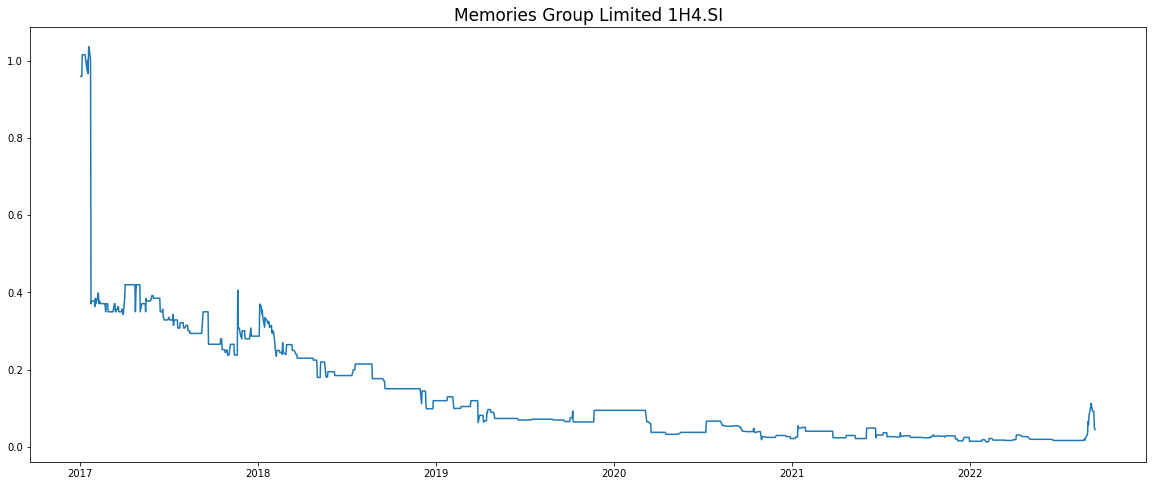

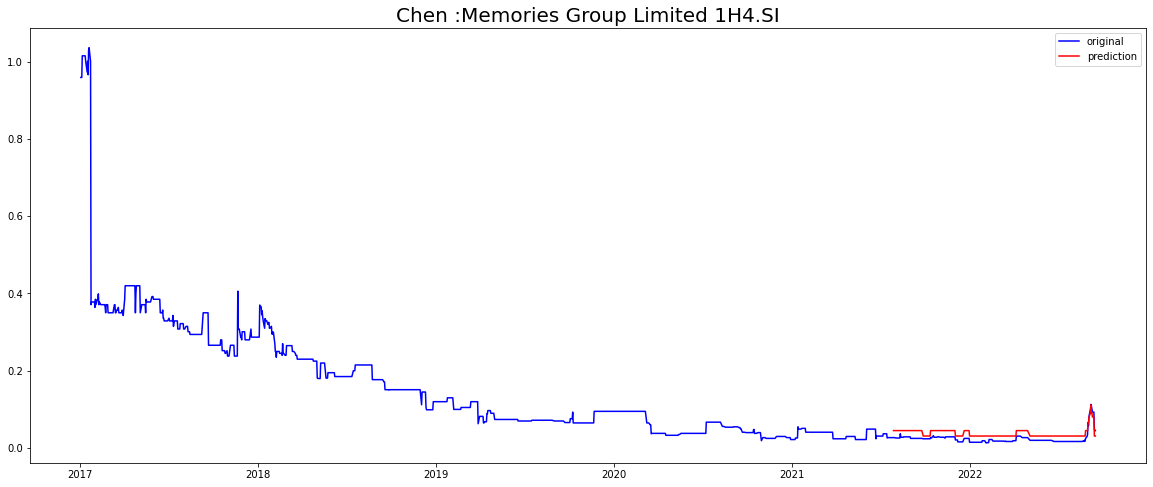

Mean Absolute Error : 0.014556244991289206
Mean Squared Error : 0.0002243225781704777
Root Mean Squared Error : 0.014977402250406367
Mean Absolute Percentage Error : 0.681376265417637


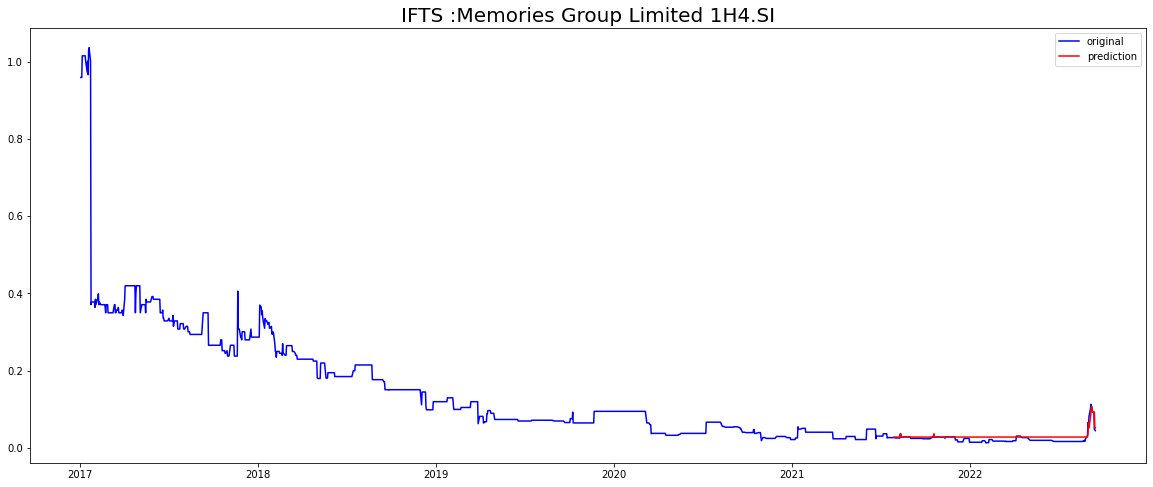

Mean Absolute Error : 0.00741585980247239
Mean Squared Error : 8.522618909318904e-05
Root Mean Squared Error : 0.009231803133363982
Mean Absolute Percentage Error : 0.3853318543169488


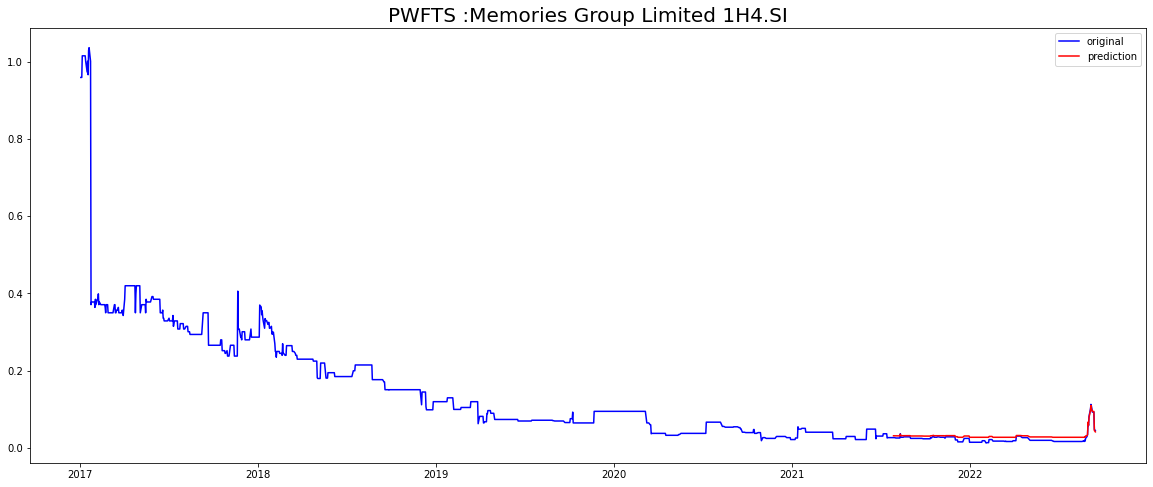

Mean Absolute Error : 0.007673820792684237
Mean Squared Error : 7.032231764108342e-05
Root Mean Squared Error : 0.008385840306199696
Mean Absolute Percentage Error : 0.4014622342466903


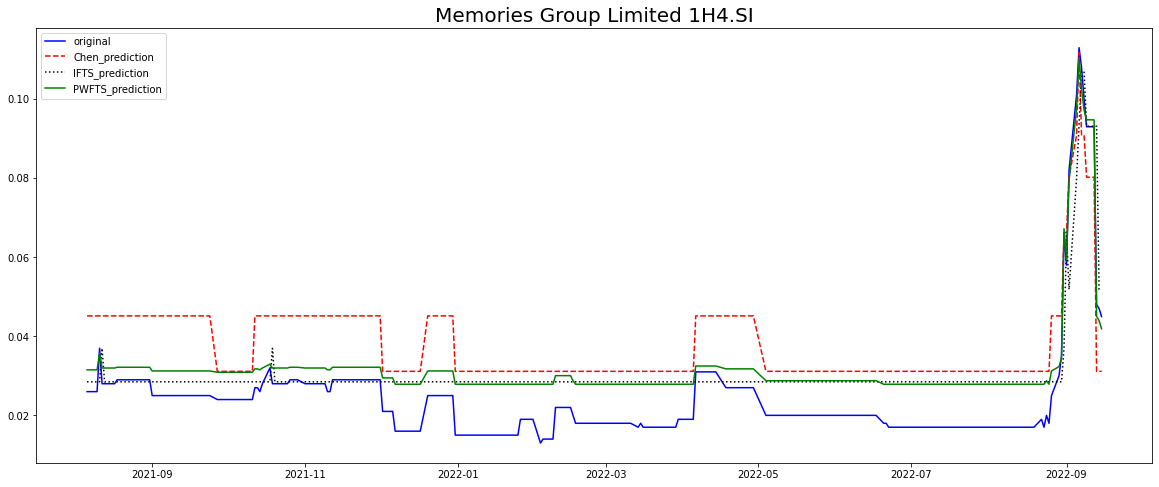

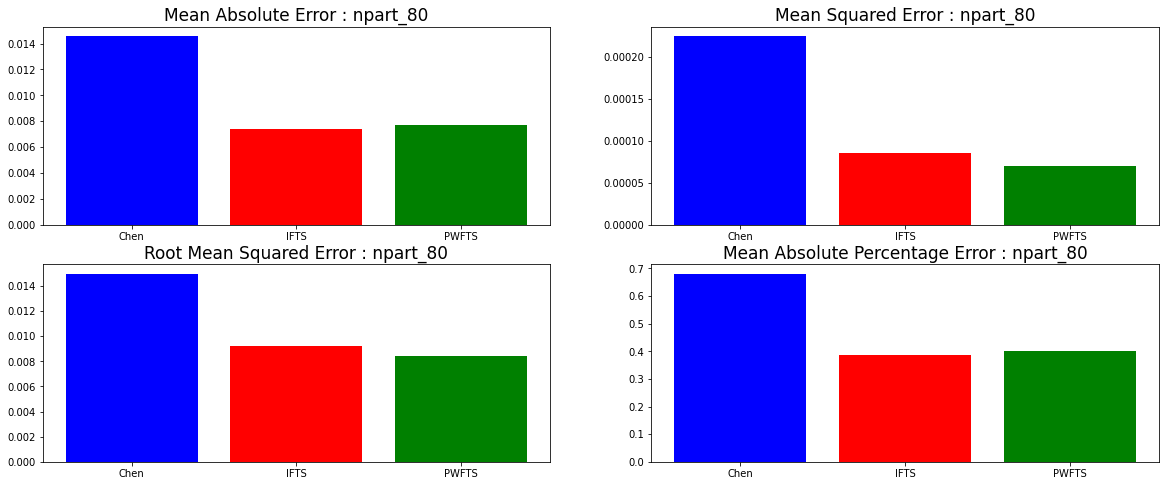

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(data[4]["Date"], d[4])
plt.title(data_names[4], fontsize=17);
fs_4 = Grid.GridPartitioner(data=train[4], npart=80)
print(fs_4)
model_chen_4 = chen.ConventionalFTS(partitioner=fs_4)
model_chen_4.fit(train[4])
print(model_chen_4)
forecasts_chen_4 = model_chen_4.predict(test[4])
forecasts_chen_4 = np.array(forecasts_chen_4).reshape(-1,1)
forecasts_chen_4 = forecast_extender(forecasts_chen_4,data_len - len(forecasts_chen_4))
y_metrics_480 = []
plot_fig(d[4], forecasts_chen_4, 'Chen :'+data_names[4], y_metrics_480)
model_ifts_4 = ifts.IntervalFTS(partitioner=fs_4)
model_ifts_4.fit(np.array(train[4]).reshape(-1))
forecasts_ifts_4 = model_ifts_4.predict(np.array(test[4]).reshape(-1))
forecasts_ifts_4 = np.array(forecasts_ifts_4).reshape(-1,1)
forecasts_ifts_4 = forecast_extender(forecasts_ifts_4, data_len-len(forecasts_ifts_4))
plot_fig(d[4], forecasts_ifts_4, 'IFTS :'+ data_names[4], y_metrics_480)
model_pwfts_4 = pwfts.ProbabilisticWeightedFTS(partitioner=fs_4)
model_pwfts_4.fit(np.array(train[4]).reshape(-2))
forecasts_pwfts_4 = model_pwfts_4.predict(np.array(test[4]).reshape(-1))
forecasts_pwfts_4 = np.array(forecasts_pwfts_4).reshape(-1,1)
forecasts_pwfts_4 = forecast_extender(forecasts_pwfts_4, data_len-len(forecasts_pwfts_4))
plot_fig(d[4], forecasts_pwfts_4, 'PWFTS :'+ data_names[4], y_metrics_480)
plot_all(data, forecasts_chen_4, forecasts_ifts_4, forecasts_pwfts_4, 4, 280)
plot_metrics(y_metrics_480, y_metrics_names,80)

# more metrics

## all models

In [ ]:
c = y_metrics_080[3]+y_metrics_180[3]+y_metrics_280[3]+y_metrics_380[3]+y_metrics_480[3]
i = y_metrics_080[7]+y_metrics_180[7]+y_metrics_280[7]+y_metrics_380[7]+y_metrics_480[7]
p = y_metrics_080[11]+y_metrics_180[11]+y_metrics_280[11]+y_metrics_380[3]+y_metrics_480[11]

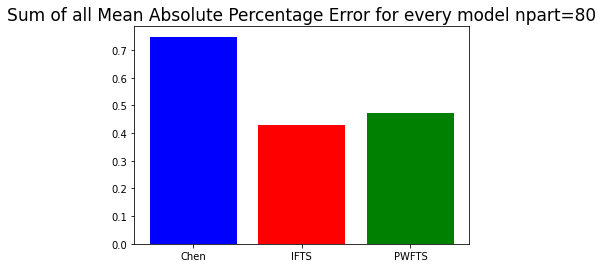

In [ ]:

plt.bar(["Chen", "IFTS", "PWFTS"], [c,i,p],color=['blue', 'red', 'green'])
plt.title("Sum of all Mean Absolute Percentage Error for every model npart=80", fontsize=17);

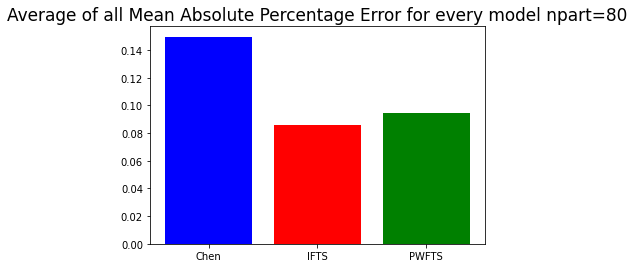

In [ ]:

plt.bar(["Chen", "IFTS", "PWFTS"], [c/5,i/5,p/5],color=['blue', 'red', 'green'])
plt.title("Average of all Mean Absolute Percentage Error for every model npart=80", fontsize=17);

## Chen

In [ ]:
a = y_metrics_0[3] + y_metrics_1[3] + y_metrics_2[3] + y_metrics_3[3] + y_metrics_4[3]
b = y_metrics_040[3] + y_metrics_140[3] + y_metrics_240[3] + y_metrics_340[3] + y_metrics_440[3]
c = y_metrics_060[3] + y_metrics_160[3] + y_metrics_260[3] + y_metrics_360[3] + y_metrics_460[3]
d = y_metrics_060[3] + y_metrics_180[3] + y_metrics_280[3] + y_metrics_380[3] + y_metrics_480[3]

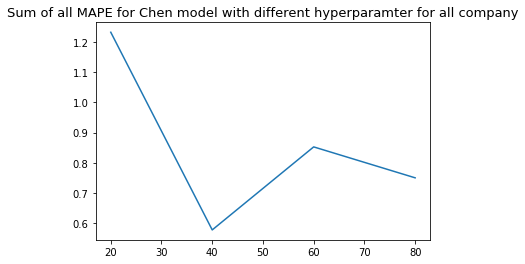

In [ ]:
plt.plot([20,40,60,80],
        [a, b, c, d]
        )
plt.title("Sum of all MAPE for Chen model with different hyperparamter for all company", fontsize=13);

In [ ]:
a = [y_metrics_0[3] , y_metrics_1[3] , y_metrics_2[3] , y_metrics_3[3] , y_metrics_4[3]]
b = [y_metrics_040[3] , y_metrics_140[3] , y_metrics_240[3] , y_metrics_340[3] , y_metrics_440[3]]
c = [y_metrics_060[3] , y_metrics_160[3] , y_metrics_260[3] , y_metrics_360[3] , y_metrics_460[3]]
d = [y_metrics_060[3] , y_metrics_180[3] , y_metrics_280[3] , y_metrics_380[3] , y_metrics_480[3]]

In [ ]:
df = pd.DataFrame.from_dict({'20':a, '40':b, '60':c, '80':d})

In [ ]:
df_m = pd.melt(df)

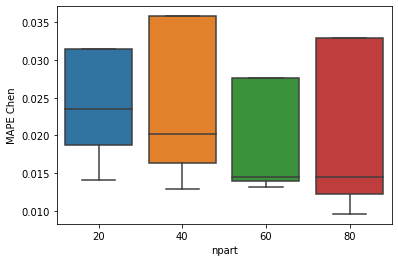

In [ ]:
df_m.columns = ['npart', 'MAPE Chen' ]
sns.boxplot(x='npart', y='MAPE Chen', data=df_m, showfliers = False, dodge=False)

## IFTS

In [ ]:
a = y_metrics_0[7] + y_metrics_1[7] + y_metrics_2[7] + y_metrics_3[7] + y_metrics_4[7]
b = y_metrics_040[7] + y_metrics_140[7] + y_metrics_240[7] + y_metrics_340[7] + y_metrics_440[7]
c = y_metrics_060[7] + y_metrics_160[7] + y_metrics_260[7] + y_metrics_360[7] + y_metrics_460[7]
d = y_metrics_060[7] + y_metrics_180[7] + y_metrics_280[7] + y_metrics_380[7] + y_metrics_480[7]

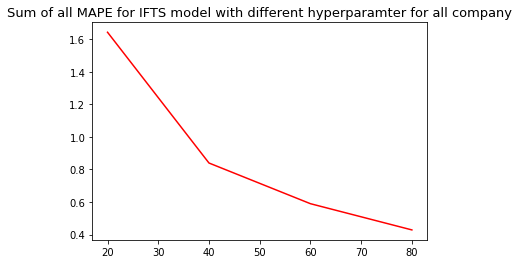

In [ ]:
plt.plot([20,40,60,80],
        [a, b, c, d],
         color='red'
        )
plt.title("Sum of all MAPE for IFTS model with different hyperparamter for all company", fontsize=13);

In [ ]:
a = [y_metrics_0[7] , y_metrics_1[7] , y_metrics_2[7] , y_metrics_3[7] , y_metrics_4[7]]
b = [y_metrics_040[7] , y_metrics_140[7] , y_metrics_240[7] , y_metrics_340[7] , y_metrics_440[7]]
c = [y_metrics_060[7] , y_metrics_160[7] , y_metrics_260[7] , y_metrics_360[7] , y_metrics_460[7]]
d = [y_metrics_060[7] , y_metrics_180[7] , y_metrics_280[7] , y_metrics_380[7] , y_metrics_480[7]]

In [ ]:
df = pd.DataFrame.from_dict({'20':a, '40':b, '60':c, '80':d})

In [ ]:
df_m = pd.melt(df)

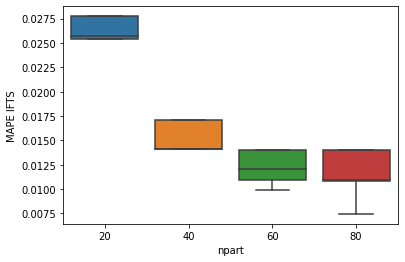

In [ ]:
df_m.columns = ['npart', 'MAPE IFTS']
sns.boxplot(x='npart', y='MAPE IFTS', data=df_m, showfliers = False, dodge=False)

## PWFTS

In [ ]:
a = [y_metrics_0[11] , y_metrics_1[11] , y_metrics_2[11] , y_metrics_3[11] , y_metrics_4[11]]
b = [y_metrics_040[11] , y_metrics_140[11] , y_metrics_240[11] , y_metrics_340[11] , y_metrics_440[11]]
c = [y_metrics_060[11] , y_metrics_160[11] , y_metrics_260[11] , y_metrics_360[11] , y_metrics_460[11]]
d = [y_metrics_060[11] , y_metrics_180[11] , y_metrics_280[11] , y_metrics_380[11] , y_metrics_480[11]]

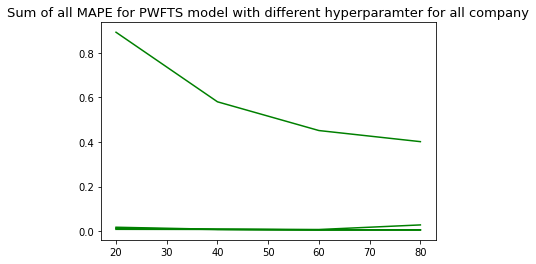

In [ ]:
plt.plot([20,40,60,80],
        [a, b, c, d], color='green'
        )
plt.title("Sum of all MAPE for PWFTS model with different hyperparamter for all company", fontsize=13);

In [ ]:
import seaborn as sns

In [ ]:
df = pd.DataFrame.from_dict({'20':a, '40':b, '60':c, '80':d})

In [ ]:
df

20        40        60        80
0  0.008036  0.007522  0.005394  0.005394
1  0.011551  0.008136  0.005986  0.005444
2  0.017410  0.008181  0.007201  0.027808
3  0.013115  0.007431  0.005566  0.005529
4  0.892382  0.580249  0.451289  0.401462

In [ ]:
df.describe()

20        40        60        80
count  5.000000  5.000000  5.000000  5.000000
mean   0.188499  0.122304  0.095087  0.089127
std    0.393497  0.255999  0.199124  0.174869
min    0.008036  0.007431  0.005394  0.005394
25%    0.011551  0.007522  0.005566  0.005444
50%    0.013115  0.008136  0.005986  0.005529
75%    0.017410  0.008181  0.007201  0.027808
max    0.892382  0.580249  0.451289  0.401462

In [ ]:
df_m = pd.melt(df)

In [ ]:
df_m

variable     value
0        20  0.008036
1        20  0.011551
2        20  0.017410
3        20  0.013115
4        20  0.892382
5        40  0.007522
6        40  0.008136
7        40  0.008181
8        40  0.007431
9        40  0.580249
10       60  0.005394
11       60  0.005986
12       60  0.007201
13       60  0.005566
14       60  0.451289
15       80  0.005394
16       80  0.005444
17       80  0.027808
18       80  0.005529
19       80  0.401462

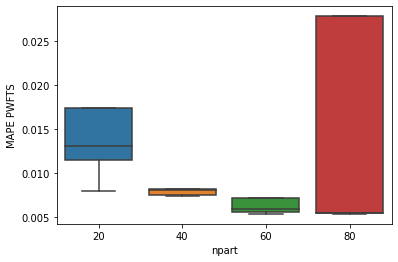

In [ ]:
df_m.columns = ['npart', 'MAPE PWFTS']
sns.boxplot(x='npart', y='MAPE PWFTS', data=df_m, showfliers = False, dodge=False)